In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import OLSInfluence
from statsmodels.graphics.regressionplots import plot_leverage_resid2
plt.rcParams['figure.figsize'] = (12,10)
import seaborn as sns
sns.set(rc={'figure.figsize':(12,10)})
from sklearn.linear_model import LinearRegression
from patsy import dmatrices
import statsmodels.api as sm

## Linear Regression

La regression linéaire est utilisée pour prédire des valeurs de sorties **quantitative**(numérique)

- Peux t'on determiner si une relation existe entre predicateurs et target(variable cible à prédire) ?
- Cette relation est-elle forte ?
- Quels predicateurs sont liés à la target ?
- Quel est la performance des prédictions une fois que le modèle est entrainé ?
- Est ce que le modèle linéaire est approprié ?
- Est-ce qu'il existe des effets d'interaction ?

### Simple Linear Regression

Un predicateur $X$ est linéairement lié à la valeur de sortie $Y$ ===> $ Y = \beta_0 +  \beta_1 X + \epsilon$

Il y a 2 constantes inconnues(coefficients ou paramètres) que nous devons estimés : $\beta_0$ et $\beta_1$

Une fois estimés, on obtient l'estimation de la target ===> $ \hat{Y} = \hat{\beta_0} +  \hat{\beta_1} X$

In [3]:
cd C:\Users\david\STATISTIQUES\Introduction to Statistical Learning\data

C:\Users\david\STATISTIQUES\Introduction to Statistical Learning\data


In [4]:
pwd

'C:\\Users\\david\\STATISTIQUES\\Introduction to Statistical Learning\\data'

In [5]:
plt.style.use('fivethirtyeight')

In [6]:
adv = pd.read_csv('Advertising.csv')

In [7]:
adv.head()

TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3    9.3
3  151.5   41.3       58.5   18.5
4  180.8   10.8       58.4   12.9

In [8]:
adv.shape

(200, 4)

In [9]:
# np.polyfit(x, y, deg) = Least squares polynomial fit

In [10]:
np.polyfit(adv['TV'], adv['Sales'], deg=1)

array([0.04753664, 7.03259355])

In [11]:
# Pour TV = 230.1 
# Y = 22.1
# Y_estimate = 17.97
# error = 4.13 

7.03259355 + (0.04753664 * 230.1)

17.970774413999997

In [12]:
# Pour TV = 44.5 
# Y = 10.4
# Y_estimate = 9.14
# error = 1.25

7.03259355 + (0.04753664 * 44.5)

9.14797403

In [13]:
fit = np.polyfit(adv['TV'], adv['Sales'], deg=1)
y_hat = fit[1] + fit[0] * adv['TV']

<AxesSubplot:xlabel='TV', ylabel='Sales'>

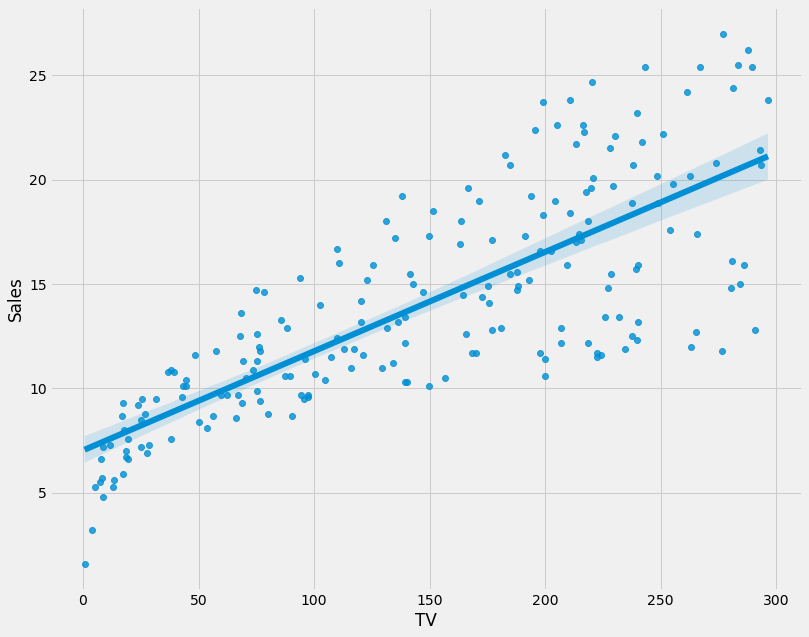

In [14]:
plt.figure(figsize=(12,10))
sns.regplot(x='TV', y='Sales', data=adv)

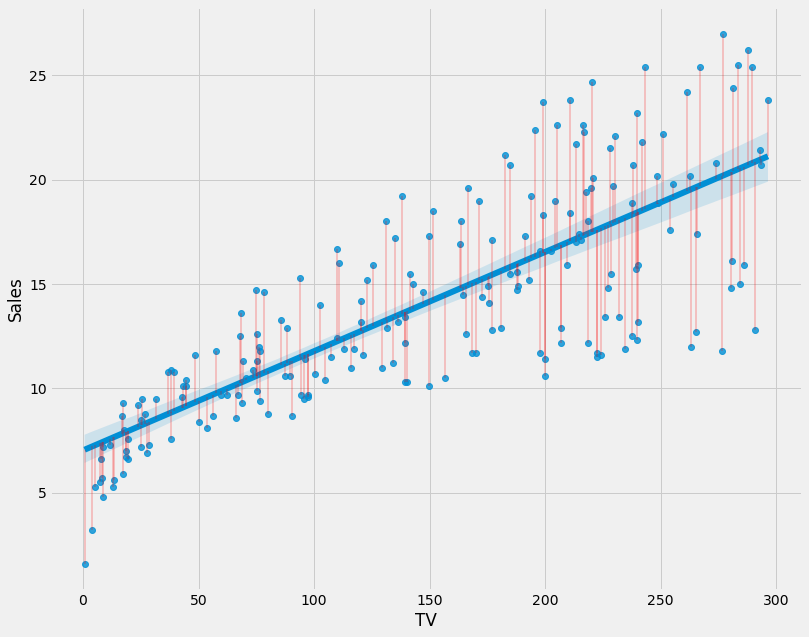

In [15]:
plt.figure(figsize=(12,10))
sns.regplot(x='TV', y='Sales', data=adv)

#plt.vlines(x, ymin, ymax)
plt.vlines(adv['TV'], y_hat, adv['Sales'], lw=0.4, color='r')

### Residual Sum Squares (RSS)

$$ RSS = e_{1}^2 + e_{2}^2 + ... + e_{n}^2$$

$$ RSS = (y_1  - \hat{\beta_0} -  \hat{\beta_1}x_1)^2 + (y_2  - \hat{\beta_0} -  \hat{\beta_1}x_2)^2 + ... + (y_n  - \hat{\beta_0} -  \hat{\beta_1}x_n)^2$$

$$\hat{\beta_1} = \frac{\sum_{i=1}^{N}(x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^{N}(x_i - \bar{x})^2} $$

$$ \hat{\beta_0} = \bar{y} - \hat{\beta_1}\bar{x}$$  

### Quantifier la meilleure ligne

De nombreuses lignes peuvent être arbitrairement tracées à travers les données publicitaires ci-dessus. Généralement, la ligne qui **minimise la somme de l'erreur quadratique** (également appelée **Somme Résiduelle des Carrés (RSS)**) entre les points et la ligne estimée est utilisée. Mais vous êtes libre de choisir la ligne de votre choix lors du modelage. La moindre erreur absolue, reliant une ligne passant par le premier et le dernier point, une ligne tracée à la main sont différentes façons de modéliser la relation.

La ligne ci-dessus a été ajustée à l'aide de la fonction polyfit de numpy, avec un modèle final de $\hat{Y} = 7 + 0.048X$ . Pour chaque augmentation d'une unité de $X$, une augmentation de **0,048 des ventes** se produirait. Comme les données sont en milliers, chaque tranche de **1 000 dollars dépensés en publicité** correspond à une **augmentation de 48 ventes**.

### Différentes valeurs de paramètres

Différentes valeurs du paramètre produisent chacune des valeurs différentes de **MSE** : **l'erreur quadratique moyenne**(la métrique utilisée pour déterminer le meilleur ajustement).</br> Le travail ci-dessous décrit un certain nombre de combinaisons de $\hat{\beta_0}$ et $\hat{\beta_1}$ à travers des lignes de contour qui montrent l'erreur à chaque combinaison et un tracé 3D correspondant. Le point central de chaque figure est le point où la MSE est minimisée.

$$MSE = \frac{1}{N} \sum_{i=1}^{N} (Y_i - \hat{Y_i})^2$$

$$MSE = \frac{1}{N} \sum_{i=1}^{N} (Y_i - (\hat{\beta_0} + \hat{\beta_1}X))^2$$

In [16]:
# b0 : 50 points entre 5 et 9
b0 = np.linspace(5, 9, 50)

# b1 : 50 points entre 0.03 et 0.07
b1 = np.linspace(0.03, 0.07, 50)

In [17]:
errors = np.array([np.mean((adv['Sales'].values - (b_0 + b_1 * adv['TV'].values)) ** 2) for b_1 in b1 for b_0 in b0])
errors

array([34.03153075, 33.28534158, 32.55248019, ..., 40.29704669,
       41.13754073, 41.99136256])

In [18]:
# Exemple Meshgrid

x = np.array([0. , 0.5, 1. ])
y = np.array([0., 1.])
xv, yv = np.meshgrid(x, y)
xv, yv

(array([[0. , 0.5, 1. ],
        [0. , 0.5, 1. ]]),
 array([[0., 0., 0.],
        [1., 1., 1.]]))

In [19]:
B0, B1 = np.meshgrid(b0, b1)

In [20]:
B0.shape, b0.shape, errors.shape

((50, 50), (50,), (2500,))

In [21]:
errors_mesh = errors.reshape(B0.shape)

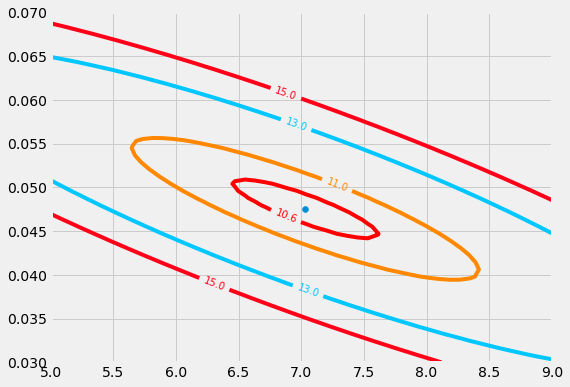

In [22]:
cmap = plt.cm.hsv
plt.figure(figsize=(8,6))
cs = plt.contour(B0, B1, errors_mesh, cmap=cmap, levels=[10.6, 11, 13, 15])
manual_locations = [(7, .05)]
plt.clabel(cs, inline=1, fontsize=10)
plt.scatter(fit[1], fit[0]);

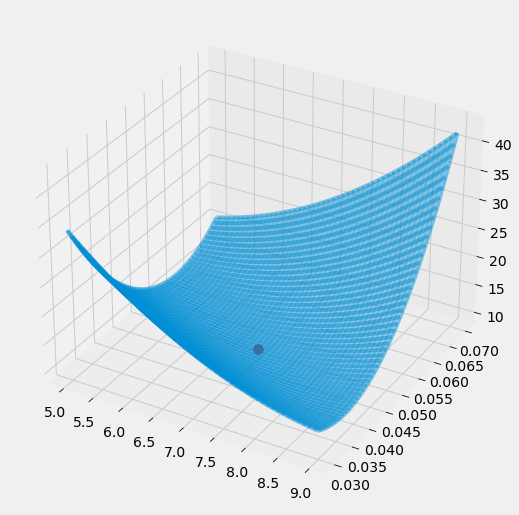

In [23]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(8,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(fit[1], fit[0], errors_mesh.min(), s=100, c='r')
ax.plot_wireframe(B0, B1, errors_mesh, alpha=.5);

## True Regression Line

La meilleure relation linéaire théorique peut être définie comme : $ Y = \beta_0 +  \beta_1 X + \epsilon$

Cette « droite de régression de la population » ne sera jamais connue en pratique et restera inobservée à moins qu'elle ne provienne de données simulées.

**Unbiased** - Un estimateur qui ne surestime pas ou ne sous-estime pas systématiquement la valeur du paramètre qu'il estime

### Quelle est la précision de nos estimateurs ?

C'est bien que notre modèle de régression linéaire utilisant les moindres carrés ait produit une ligne qui semble correcte, mais dans quelle mesure cette ligne s'attend-elle à varier d'un échantillon à l'autre ?

Dans le cas de l'estimation d'une moyenne d'échantillon $\hat{\mu}$ à partir d'un certain nombre de points $n$ , nous obtenons que $Var(\hat{\mu}) = \frac{\sigma^2}{n}$ où $\sigma$ est la distribution standard de l'ensemble original de $n$ points. La racine carrée de cette valeur s'appelle **standard error** et nous donne une idée approximative de la variation de l'estimateur d'un échantillon à l'autre. Les formules pour les erreurs standard de $\beta_0$ et $\beta_1$ sont données dans le texte.

$$\hat{\beta_1} = \frac{\sum_{i=1}^{N}(x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^{N}(x_i - \bar{x})^2} $$

$$ \hat{\beta_0} = \bar{y} - \hat{\beta_1}\bar{x}$$  

$$SE(\hat{\beta_0}) = \sigma^2 \left(\frac{1}{N} + \frac{\bar{x}}{\sum_{i=1}^{N}(x_i - \bar{x})^2}\right)$$

$$SE(\hat{\beta_1}) =   \frac{\sigma^2}{\sum_{i=1}^{N}(x_i - \bar{x})^2}$$

$$\sigma^2 = Var(\epsilon)$$

$$Residual Standard Error : RSE = \sigma = \sqrt \frac{RSS}{N-2}$$

### Intervalles de confiance des estimateurs 

Sachant comment dériver notre **standard error** et en supposant que les erreurs sont **gaussiennes**, nous pouvons générer un **intervalle de confiance** basé sur une **distribution t**.
Par exemple, environ 95 % de tous les échantillons seront contenus dans l'intervalle suivant : 

$$\beta_1 \pm 2 * SE(\beta_1)$$

$$\left(\beta_1 - 2 * SE(\beta_1),  \beta_1 + 2 * SE(\beta_1)\right)$$

$$\beta_0 \pm 2 * SE(\beta_0)$$

### Utilisation des standards errors pour les tests d'hypothèse 

Si l'erreur type est grande et la valeur estimée petite, l'estimateur peut ne pas être significativement différent de 0, ce qui signifie qu'il est statistiquement non significatif. Pour tester la signification, un test d'hypothèse peut être effectué sur n'importe lequel des prédicteurs. Le test d'hypothèse est généralement effectué pour tester si le prédicteur est différent de 0. L'hypothèse nulle
$$H_0: \beta_1 = 0 $$
 
est testé contre l'alternative
$$H_a: \beta_1 \ne 0 $$
 
Pour tester cela, nous découvrons combien d'erreurs standard notre paramètre est éloigné de 0 : 

$$T_{statistic} = \frac{\hat{\beta_1}}{SE(\hat{\beta_1})}$$

Si $SE(\hat{\beta_1})$ est petit, il faut que $\beta_1$ soit petit pour rejeter $H_0$ : il existe une relation entre $X$ et $Y$</br>
Si $SE(\hat{\beta_1})$ est grand, il faut que $\beta_1$ soit grand pour rejeter $H_0$ : il existe une relation entre $X$ et $Y$


Ce résultat est une `statistique t`. La distribution t est ensuite utilisée pour déterminer le pourcentage de temps pendant lequel une valeur aléatoire tomberait au-delà de cette `statistique t`. Ce pourcentage est appelé la **p-value** et est utilisé comme mesure de l'extrême extrême des résultats de vos données. Plus la **p-value** est petite, plus les résultats sont extrêmes et plus il est probable qu'ils ne proviennent pas du hasard.

### Quelle p-value est assez bonne 

La **p-value** la plus standard que vous rencontrerez dans le monde réel est de **0,05**, ce qui signifie que si vous pouvez démontrer qu'il y a au moins 95 % de chances que votre estimateur ne provienne pas du hasard, vous rejetterez l'hypothèse nulle et notez qu'il existe une différence statistiquement significative entre votre estimateur et 0.

### Attention à l'interprétation des p-values

95 % semble assez solide jusqu'à ce que vous réalisiez qu'il y a des millions d'études qui ont été faites et que par hasard, 5 % auront faussement conclu à une signification statistique alors qu'il n'y en avait pas. Vous trouverez ci-dessous des travaux qui montrent (en utilisant une distribution binomiale que lorsque vous lancez une pièce équitable 100 fois, il y a à peu près 95 % de chances que vous obteniez entre 41 et 59 pile/face. Cela signifie lancer 40 ou moins ou 60 ou plus les pièces généreraient une valeur p de 0,05 ou moins. Seriez-vous satisfait que quelqu'un vous dise qu'une pièce était biaisée après avoir obtenu 60 faces ? Cet effet est aggravé dans les expériences réelles où il y a beaucoup d'inconnues et de nombreuses hypothèses qui sont peut-être que l'application d'une valeur p de 0,01 serait un meilleur choix.

In [24]:
# Calcul de probabilité exacte en utilisant une distribution binomiale pour des probas entre 41 et 59

from scipy.special import comb

comb(100, 10)

17310309456440.0

$$C_{n}^k = {}^{n}C_{k} = \binom{n}{k} = \frac{n!}{k!(n - k)!}$$

In [25]:
import math

def combinaison(n, k):
    return math.factorial(n) / (math.factorial(k) * math.factorial(n-k))

In [26]:
combinaison(100, 10)

17310309456440.0

In [27]:
p = 0.5
probs = [comb(100, i) * p ** 100 for i in range(41, 60)]

In [28]:
# probabilité de générer 41 à 59 faces
sum(probs)

0.9431120663590192

Simulation de 1000 lancers et calcul de la probabilité d'obtenir 60 faces. Environ 2,5 % du temps, nous aurons conclu que la pièce est biaisée alors qu'elle ne l'est pas !

In [29]:
# np.random.rand() : uniform distribution [0,1)
# np.random.rand(1000,100) ==> shape = (1000, 100) ==> 1000 x 100 lancers de valeurs entre 0 et 1
np.random.rand(1000,100)

array([[0.22936862, 0.94231736, 0.18881026, ..., 0.84172214, 0.3196814 ,
        0.93542402],
       [0.1094577 , 0.51989713, 0.24891173, ..., 0.00188518, 0.87763318,
        0.27169488],
       [0.01182055, 0.46844303, 0.85520031, ..., 0.77320403, 0.45097346,
        0.25697122],
       ...,
       [0.02362787, 0.33133293, 0.0129207 , ..., 0.52869312, 0.4161095 ,
        0.4867796 ],
       [0.55195708, 0.95116684, 0.87435983, ..., 0.49766581, 0.09370509,
        0.74251195],
       [0.38912848, 0.38591182, 0.92736142, ..., 0.14020238, 0.29601551,
        0.26402829]])

In [30]:
# sur les 1000 x 100 lancers, on prend ceux > 0.5 et on fait la moyenne sur axis = 1, ce qui donne 1000 resultats
# sur ces 1000 resultats, on prend ceux supérieurs a 0.6 et on fait la moyenne

p = 0.5
((np.random.rand(1000,100) > p).mean(axis = 1) >= 0.6).mean()

0.028

## Performance du modèle

Ci-dessus, nous avons discuté de la précision et de la signification des paramètres du modèle. Parlons maintenant de la précision du modèle. Un moyen simple consiste à regarder la ligne de régression tracée à travers les points - le premier tracé de ce notebook. Nous pouvons voir que les données sont encore assez bruyantes et qu'il y aura un degré élevé de variance, peu importe où nous nous trouvons sur la ligne.

### Combien faire mieux que le hasard ?

Une façon directe de mesurer le modèle est de découvrir à quel point le modèle fait mieux que le hasard. Pour cela, nous devons disposer d'un modèle pour le caractère aléatoire - et ce modèle ne consiste pas seulement à choisir un point au hasard, mais également à choisir la moyenne de tous les points.

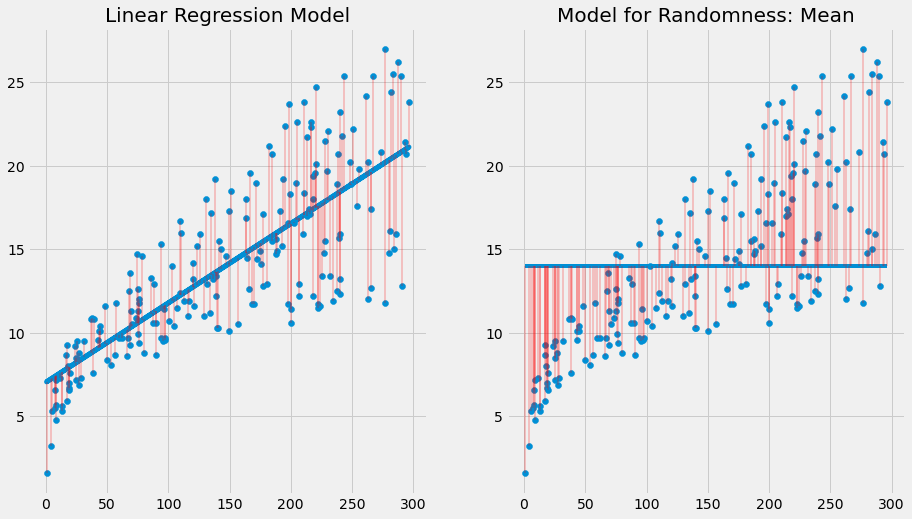

In [31]:
# Axes.hlines(y, xmin(1er valeur de x-axis), xmax(last valeur de x-axis))

fig, ax = plt.subplots(1, 2, figsize=(14,8))
ax[1].scatter(adv['TV'], adv['Sales'])
ax[1].hlines(adv['Sales'].mean(), adv['TV'].min(), adv['TV'].max(), lw=4)
ax[1].vlines(adv['TV'], adv['Sales'].mean(), adv['Sales'], lw=.4, color='r')
ax[1].set_title("Model for Randomness: Mean", fontsize=20)

ax[0].scatter(adv['TV'], adv['Sales'])
ax[0].plot(adv['TV'], adv['TV'] * fit[0] + fit[1], lw=5)
ax[0].vlines(adv['TV'], adv['TV'] * fit[0] + fit[1], adv['Sales'], lw=0.4, color='r')
ax[0].set_title("Linear Regression Model", fontsize=20);

### Errors utilisant Mean and Errors utilisant le Modele

Comme vous pouvez le voir ci-dessus, les erreurs en utilisant la moyenne sont supérieures aux erreurs en utilisant le modèle. Traçons un histogramme de la valeur absolue des erreurs de chacun pour voir plus facilement ce qui se passe. En regardant l'histogramme, il est évident que le modèle produit un meilleur ajustement.

In [32]:
errors_mean = abs(adv['Sales'] - adv['Sales'].mean())
errors_model = abs(adv['Sales'] - (adv['TV'] * fit[0] + fit[1] ))

errors_mean.mean(), errors_model.mean()

(4.2799749999999985, 2.5498060389274855)

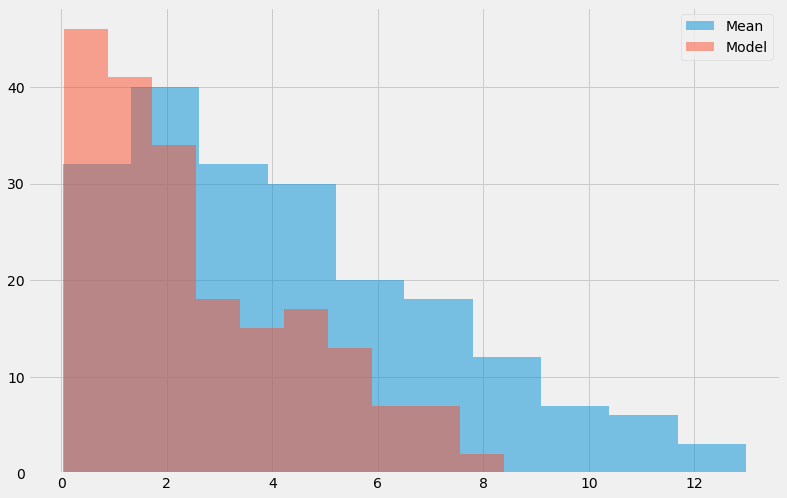

In [33]:
plt.figure(figsize=(12, 8))
plt.hist(errors_mean, alpha = .5, label="Mean")
plt.hist(errors_model, alpha=.5, label="Model")
plt.legend();

À quelle fréquence le modèle est-il meilleur ?</br>
De manière quelque peu surprenante, seulement 71,5 % du temps, le modèle est meilleur que la moyenne

In [34]:
(errors_model < errors_mean).mean()

0.715

### Residual Standard Error

$$ RSE = \sqrt {\frac{1}{n-2}RSS} = \sqrt {\frac{1}{n-2}\sum_{i=1}^{N}(y_i - \hat{y_i})^2}$$

$$RSS = \sum_{i=1}^{N}(y_i - \hat{y_i})^2$$

### Meilleur que SST

La **Somme des Carrés Totaux** ou **Sum of Squares Total(SST)** est définie comme **la somme de tous les écarts au carré par rapport à la moyenne**.</br>
Cela sert de référence quant à la quantité de variance dans le modèle. 

$$SST = \sum{(y - \bar{y})^2}$$

**L'Erreur de la Somme des Carrés** ou **Sum of Squares Error (SSE)** est **la quantité d'erreur qu'il y a dans le modèle**.</br>
La différence entre les valeurs prédites et observées.

$$SSE = \sum{(\hat{y} - y)^2}$$ .

La **Régression de la Somme des Carrés** ou **Sum of Squares Regression(SSR)** est définie comme **la somme des différences au carré entre la ligne de régression et la moyenne**

$$SSR = \sum{(\hat{y} - \bar{y})^2}$$

Mathématiquement on a l'égalité :

$$SST = SSR + SSE$$

In [35]:
# On peut calculer SST et SSE
# Remarquez à quel point notre SSE est inférieur.
# Si SSE est égal à 0, cela signifie que nous avons un ajustement parfait (et probablement un surajustement) 
SST = (errors_mean ** 2).sum()
SSE = (errors_model ** 2).sum()
SST, SSE

(5417.14875, 2102.530583131351)

## $R^2$ Statistic

$R^2$ est une statistique qui peut nous dire quel pourcentage de la variation totale (SST) a été « expliqué » par le modèle. Ou quel pourcentage de la variation (SST) a été supprimé en utilisant le modèle. Si nous calculons SSE / SST, cela nous donnerait le pourcentage de variation restant après l'utilisation de notre modèle. Le calcul de 1 - SSE / SST nous donnerait la quantité totale de variation capturée par le modèle. Un nombre proche de 1 indiquerait un meilleur ajustement. Pour le modèle actuel on peut dire : 61% de la variation a été expliquée par X (publicité TV)

$$R^2 = \frac{SST - SSR}{SST} = \frac {\sum_{i=1}^{N}(\hat y_i - \bar y)^2}{\sum_{i=1}^{N}((y_i - \bar y)^2}$$

$$R^2 = 1 - \frac{SSR}{SST} = 1 - \frac {\sum_{i=1}^{N}(y_i - \hat y_i)^2}{\sum_{i=1}^{N}((y_i - \bar y)^2}$$

$$R^2 = \frac {SSE}{SST}$$

$$R^2 = corr(\hat y, y)^2$$

cas univarié : $R^2$ est aussi le carré du coefficient de corrélation entre les valeurs $x_i$ de la variable prédictive et les mesures $y_i$ :

$$ \sum_{i=1}^{N}(\hat y_i - y_i)^2 = (1 - R^2) \sum_{i=1}^{N}(\hat y_i - \bar y)^2$$

In [36]:
# Calcul de R^2

R_2 = 1 - (SSE / SST)
R_2

0.6118750508500712

$$ Cor(X,Y) = \frac{\sum_{i=1}^{N}(x_i - \bar x)(y_i - \bar y)}{\sqrt {\sum_{i=1}^{N}(x_i - \bar x)^2}\sqrt {\sum_{i=1}^{N}(y_i - \bar y)^2}}$$

file:///C:/Users/david/OneDrive/Bureau/Nouveau%20dossier/livre/Statistiques/Introduction%20to%20Statistical%20Learning%20with%20R.pdf

### The Analysis of Variance (ANOVA) et le F-test

$$MSE= \frac{\sum(y_i-\hat{y}_i)^2}{n-2}= \frac{SSE}{n-2}$$

$$MSR=\dfrac{\sum(\hat{y}_i-\bar{y})^2}{1}=\dfrac{SSR}{1}$$

$$E(MSR)=\sigma^2+\beta_{1}^{2}\sum_{i=1}^{n}(X_i-\bar{X})^2$$

$$F^*=\dfrac{MSR}{MSE}$$

In [37]:
# Calcul de F - Statistic MSR / MSE
MSR = (SST - SSE) / 1
MSE = SSE / (errors_model.size - 2)
F_stat = MSR / MSE
F_stat

312.1449943727131

### En utilisant statsmodels.api

In [38]:
import statsmodels.formula.api as smf

In [39]:
results = smf.ols('Sales ~ TV', data=adv).fit()

In [40]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Thu, 02 Jun 2022   Prob (F-statistic):           1.47e-42
Time:                        16:06:50   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
# Regression linéaire simple avec 'Newspaper'
results = smf.ols('Sales ~ Newspaper', data=adv).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     10.89
Date:                Thu, 02 Jun 2022   Prob (F-statistic):            0.00115
Time:                        16:06:50   Log-Likelihood:                -608.34
No. Observations:                 200   AIC:                             1221.
Df Residuals:                     198   BIC:                             1227.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.3514      0.621     19.876      0.000      11.126      13.577
Newspaper      0.0547      0.017      3.300      0.001       0.022       0.087
==============================================================================
Omnibus:                        6.231   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.044   Jarque-Bera (JB):                5.483
Skew:                           0.330   Prob(JB):                       0.0645
Kurtosis:                       2.527   Cond. No.                         64.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Multiple Regression

$$Y = \beta_0 + \beta_1X_1 + \beta_2X_2 + ··· + \beta_pX_p + ϵ$$

$$sales = \beta_0 + \beta_1 × TV + \beta_2 × radio + \beta_3 × newspaper + \epsilon$$

In [42]:
results = smf.ols('Sales ~ TV + Newspaper + Radio', data=adv).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Thu, 02 Jun 2022   Prob (F-statistic):           1.58e-96
Time:                        16:06:50   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
np.corrcoef(adv.T)

array([[1.        , 0.05480866, 0.05664787, 0.78222442],
       [0.05480866, 1.        , 0.35410375, 0.57622257],
       [0.05664787, 0.35410375, 1.        , 0.22829903],
       [0.78222442, 0.57622257, 0.22829903, 1.        ]])

`Newspaper` est le moins fortement corrélé avec les ventes</br>
Sa corrélation relativement élevée avec  `Radio` pourrait être la raison pour laquelle elle était significative en soi et non 
quand `Radio` était aussi dans le modèle 

In [44]:
adv.corr()

TV     Radio  Newspaper     Sales
TV         1.000000  0.054809   0.056648  0.782224
Radio      0.054809  1.000000   0.354104  0.576223
Newspaper  0.056648  0.354104   1.000000  0.228299
Sales      0.782224  0.576223   0.228299  1.000000

### Estimation des coefficients de regression

$$\hat y = \hat \beta_0 + \hat \beta_1x_1 + \hat \beta_2x_2 + ··· + \hat \beta_px_p$$

$$RSS = \sum_{i=1}^{N}(y_i - \hat y_i)^2$$

$$RSS = \sum_{i=1}^{N}(y_i - \hat \beta_0 + \hat \beta_1x_{i1} + \hat \beta_2x_{i2} + ··· + \hat \beta_px_{ip})^2$$

### Hypothèse nulle dans la Régression linéaire multiple

L'hypothèse nulle se développe ici pour dire que tous les coefficients sont égaux à 0. L'alternative est seulement qu'au moins l'un d'entre eux est significatif. Un test F est effectué pour tester la signification.
$$ F = \frac{(SST - SSE)/p}{SSE / (n - p - 1)}$$

$$ F = \frac{(SST − SSR)/p}{ SSR/(n − p − 1)}$$

$$SST = \sum{(y - \bar{y})^2}\space\space\space\space\space\space\space\space SSR = \sum{(\hat{y} - \bar{y})^2}$$

$$E[RSS/(n − p − 1)]= σ^2$$

$$H_{0}  \space\space True : E[(TSS − RSS)/p] = σ^2$$

$$ H_a \space\space True : E[(TSS − RSS)/p] > σ^2 ===> F > 1 $$

$$ H_0 : β_{p−q+1} = β_{p−q+2} = ··· = β_p = 0$$


$$ F = \frac{(RSS_0 − RSS)/q} {RSS/(n − p − 1)}$$

### Sélection d'un sous-modèle d'un modèle

Dans le modèle ci-dessus, le journal ne semble pas avoir de relation avec les ventes et serait donc un bon candidat à supprimer de notre modèle. Mais si le nombre de prédicteurs était supérieur, il pourrait être difficile d'ajuster manuellement de nombreux modèles et de sélectionner manuellement les variables à inclure dans le modèle. Des processus de sélection avant, arrière et mixte peuvent être utilisés pour trouver un meilleur modèle. Tous ces modèles de sélection font leur sélection variable en fonction de certaines statistiques - AIC, BIC, Mallows CP, R-carré ajusté

- Forward - commence avec un modèle vide et ajoute une variable à la fois jusqu'à ce que la statistique soit maximisée
- Backward - commence avec un modèle complet et supprime une variable à la fois 
- Mixed - commence vide et supprime ou ajoute une variable à chaque étape


### Variables predictrices Categorielles

Les variables non numériques ou numériques mais qui représentent des catégories sont appelées variables catégorielles. Aussi appelées variables qualitatives ou factor variables

In [45]:
credit = pd.read_csv('Credit.csv')

In [46]:
credit['Female'] = (credit['Gender'] == 'Female').astype(int)

In [47]:
credit['Female']

0      0
1      1
2      0
3      1
4      0
      ..
395    0
396    0
397    1
398    0
399    1
Name: Female, Length: 400, dtype: int32

In [48]:
credit.head()

Income  Limit  Rating  Cards  Age  Education  Gender Student Married  \
0   14.891   3606     283      2   34         11    Male      No     Yes   
1  106.025   6645     483      3   82         15  Female     Yes     Yes   
2  104.593   7075     514      4   71         11    Male      No      No   
3  148.924   9504     681      3   36         11  Female      No      No   
4   55.882   4897     357      2   68         16    Male      No     Yes   

   Ethnicity  Balance  Female  
0  Caucasian      333       0  
1      Asian      903       1  
2      Asian      580       0  
3      Asian      964       1  
4  Caucasian      331       0

In [49]:
results = smf.ols('Balance ~ Female', data=credit).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.1836
Date:                Thu, 02 Jun 2022   Prob (F-statistic):              0.669
Time:                        16:06:50   Log-Likelihood:                -3019.3
No. Observations:                 400   AIC:                             6043.
Df Residuals:                     398   BIC:                             6051.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    509.8031     33.128     15.389      0.000     444.675     574.931
Female        19.7331     46.051      0.429      0.669     -70.801     110.267
==============================================================================
Omnibus:                       28.438   Durbin-Watson:                   1.940
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.346
Skew:                           0.583   Prob(JB):                     1.15e-06
Kurtosis:                       2.471   Cond. No.                         2.66
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
# Filtre colonne 'Balance' seulement pour les hommes
credit[credit['Female'] == 0]['Balance']

0       333
2       580
4       331
5      1151
7       872
       ... 
393       0
394     734
395     560
396     480
398       0
Name: Balance, Length: 193, dtype: int64

In [51]:
# Intercept
credit[credit['Female'] == 0]['Balance'].mean(), credit[credit['Female'] == 1]['Balance'].mean()

(509.8031088082902, 529.536231884058)

###  hypothèses brisées d'un modèle linéaire

Plusieurs hypothèses sont utilisées lors de l'ajustement d'un modèle linéaire.

- Les erreurs sont normalement distribuées et ont une variance constante
- Les erreurs ne sont pas corrélées entre elles
- Les variables prédictives sont indépendantes. Une augmentation de l'un n'entraînera pas une augmentation de l'autre
- Le changement de réponse pour une augmentation d'une unité de X est le même quelle que soit la valeur de X

### Défier la contrainte de linéarité par des effets d'interaction

Dans une régression linéaire sans effets d'interaction (deux prédicteurs ne sont pas multipliés ensemble) et l'hypothèse est qu'une augmentation d'une unité dans une variable n'aura aucun effet sur une autre variable. Dans de nombreux problèmes du monde réel, une augmentation d'une variable peut modifier l'impact d'une autre variable sur la réponse. Pour capturer cela dans une régression multiple, nous multiplions les prédicteurs ensemble

In [52]:
# interaction model
results = smf.ols('Sales ~ TV + Radio + TV * Radio', data=adv).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     1963.
Date:                Thu, 02 Jun 2022   Prob (F-statistic):          6.68e-146
Time:                        16:06:50   Log-Likelihood:                -270.14
No. Observations:                 200   AIC:                             548.3
Df Residuals:                     196   BIC:                             561.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.7502      0.248     27.233      0.000       6.261       7.239
TV             0.0191      0.002     12.699      0.000       0.016       0.022
Radio          0.0289      0.009      3.241      0.001       0.011       0.046
TV:Radio       0.0011   5.24e-05     20.727      0.000       0.001       0.001
==============================================================================
Omnibus:                      128.132   Durbin-Watson:                   2.224
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1183.719
Skew:                          -2.323   Prob(JB):                    9.09e-258
Kurtosis:                      13.975   Cond. No.                     1.80e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.8e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

$$Y = \beta_0 + \beta_1X_1 + \beta_2X_2 + ϵ$$

une augmentation d'une unité de $X_1$ est associée à une augmentation moyenne de $Y$ de $\beta_1$ unités

Notez que la présence de $X_2$ ne modifie pas cette affirmation, c'est-à-dire que quelle que soit la valeur de $X_2$, une augmentation d'une unité de $X_1$ est associée à une augmentation de $\beta_1$ unité de $Y$

$$Y = \beta_0 + \beta_1X_1 + \beta_2X_2 + \beta_3X_1X_2 + ϵ$$

$$Y = \beta_0 + (\beta_1 + \beta_3X_2)X1 + \beta_2X_2 + ϵ$$

$$Y= \beta_0 + β˜_1X_1 + \beta_2X_2 + ϵ$$

$$β˜_1 = \beta_1 + \beta_3X_2$$

$β˜_1$ est maintenant une fonction de $X_2$, l'association entre $X_1$ et $Y$ n'est plus constante : un changement de la valeur de $X_2$ modifiera l'association entre $X_1$ et $Y$. Un changement de la valeur de $X_1$ modifie l'association entre $X_2$ et $Y$

$$ units ≈ 1.2 + 3.4 × lines + 0.22 × workers + 1.4 × (lines × workers)$$

$$ units = 1.2 + (3.4 + 1.4 × workers) × lines + 0.22 × workers$$


l'ajout d'une ligne supplémentaire augmentera le nombre d'unités produites par $3,4 + 1,4 × workers$. Ainsi, plus nous aurons de travailleurs, plus l'effet des lignes sera fort.

$$ sales = \beta_0 + \beta_1 × TV + \beta_2 × radio + \beta_3 × (radio × TV) + ϵ$$

$$ sales = \beta_0 + (\beta_1 + \beta_3 × radio) × TV + \beta_2 × radio + ϵ$$

On peut interpréter $\beta_3$ comme l'augmentation de l'efficacité de la publicité $TV$ associée à une augmentation d'une unité de la publicité $radio$ (ou inversement)

Les résultats suggèrent fortement que le modèle qui inclut le terme d'interaction est supérieur au modèle qui ne contient que les effets principaux.</br>
**p-value** pour le terme d'interaction, $TV × radio$, est extrêmement faible, ce qui indique qu'il existe des preuves solides pour $Ha : \beta_3 ̸= 0$.</br>
En d'autres termes, il est clair que la véritable relation n'est pas additive.</br>
Le $R^2$ du modèle $\beta_0 + (\beta_1 + \beta_3 × radio) × TV + \beta_2 × radio + ϵ$ est de **96,8 %**, contre seulement **89,7 %** pour le modèle qui prédit les ventes $TV$ et $radio$ sans terme d'interaction.</br>
Cela signifie que **(96,8 − 89,7)/(100 − 89,7) = 69 %** de la variabilité des ventes qui subsiste après ajustement du modèle additif a été expliquée par le terme d'interaction.</br>
Les estimations des coefficients du tableau suggèrent qu'une augmentation de la publicité $TV$ de 1 000 dollars est associée à une augmentation des ventes de $(\hat\beta_1 + \hat\beta_3 × radio) × 1000 = 19 + 1,1 × unités\space radio$.</br>
Et une augmentation de la publicité $radio$ de 1 000 dollars sera associée à une augmentation des ventes de $(\hat\beta_2 + \hat\beta_3 × TV) × 1000 = 29 + 1,1 × unités\space TV$.</br>
Dans cet exemple, les **p-values** associées à la $TV$, à $radio$ et au terme d'interaction sont toutes statistiquement significatives, et il est donc évident que les trois variables doivent être incluses dans le modèle.</br>
Cependant, il arrive parfois qu'un terme d'interaction ait une très petite **p-value**, mais pas les effets principaux associés (dans ce cas, $TV$ et $radio$).</br>
Le principe hiérarchique stipule que si nous incluons une interaction dans un modèle, nous principe hiérarchique devrait également inclure les effets principaux, même si les **p-values** associées à leurs coefficients ne sont pas significatives </br>
En d'autres termes, si l'interaction entre $X_1$ et $X_2$ semble importante, alors nous devrions inclure à la fois $X_1$ et $X_2$ dans le modèle même si leurs estimations de coefficient ont de grandes **p-values**.</br> La justification de ce principe est que si $X_1 × X_2$ est lié à la réponse, alors que les coefficients de $X_1$ ou $X_2$ soient ou non exactement nuls n'a que peu d'intérêt. De plus, $X_1 × X_2$ est généralement corrélé avec $X_1$ et $X_2$, et donc les laisser de côté tend à modifier la signification de l'interaction

**leverage statistic** :  $$h_i = \frac{1}{n} + \frac {(x_i - \bar x)^2}{\sum_{i'=1}^{n} (x_{i'} - \bar x)^2} $$

Il ressort de cette équation que $h_i$ augmente avec la distance de $x_i$ à $\bar x$.</br>
Il existe une simple extension de $h_i$ au cas de plusieurs prédicteurs, bien que nous ne fournissions pas la formule ici.</br>
**Leverage statistic** $h_i$ est toujours comprise entre $1/n$ et $1$, et le levier moyen pour toutes les observations est toujours égal à $(p + 1)/n$.</br>
Donc, si une observation donnée a une **leverage statistic** qui dépasse largement $(p+1)/n$, alors nous pouvons soupçonner que le point correspondant a un effet de levier élevé.</br>
Le panneau de droite de la figure suivante fournit un graphique des résidus studentisés en fonction de $h_i$ pour les données du panneau de gauche. L'observation 41 se distingue par une statistique d'effet de levier très élevée ainsi qu'un résidu étudiant élevé. En d'autres termes, il s'agit d'une valeur aberrante ainsi que d'une observation à fort effet de levier. C'est une combinaison particulièrement dangereuse !

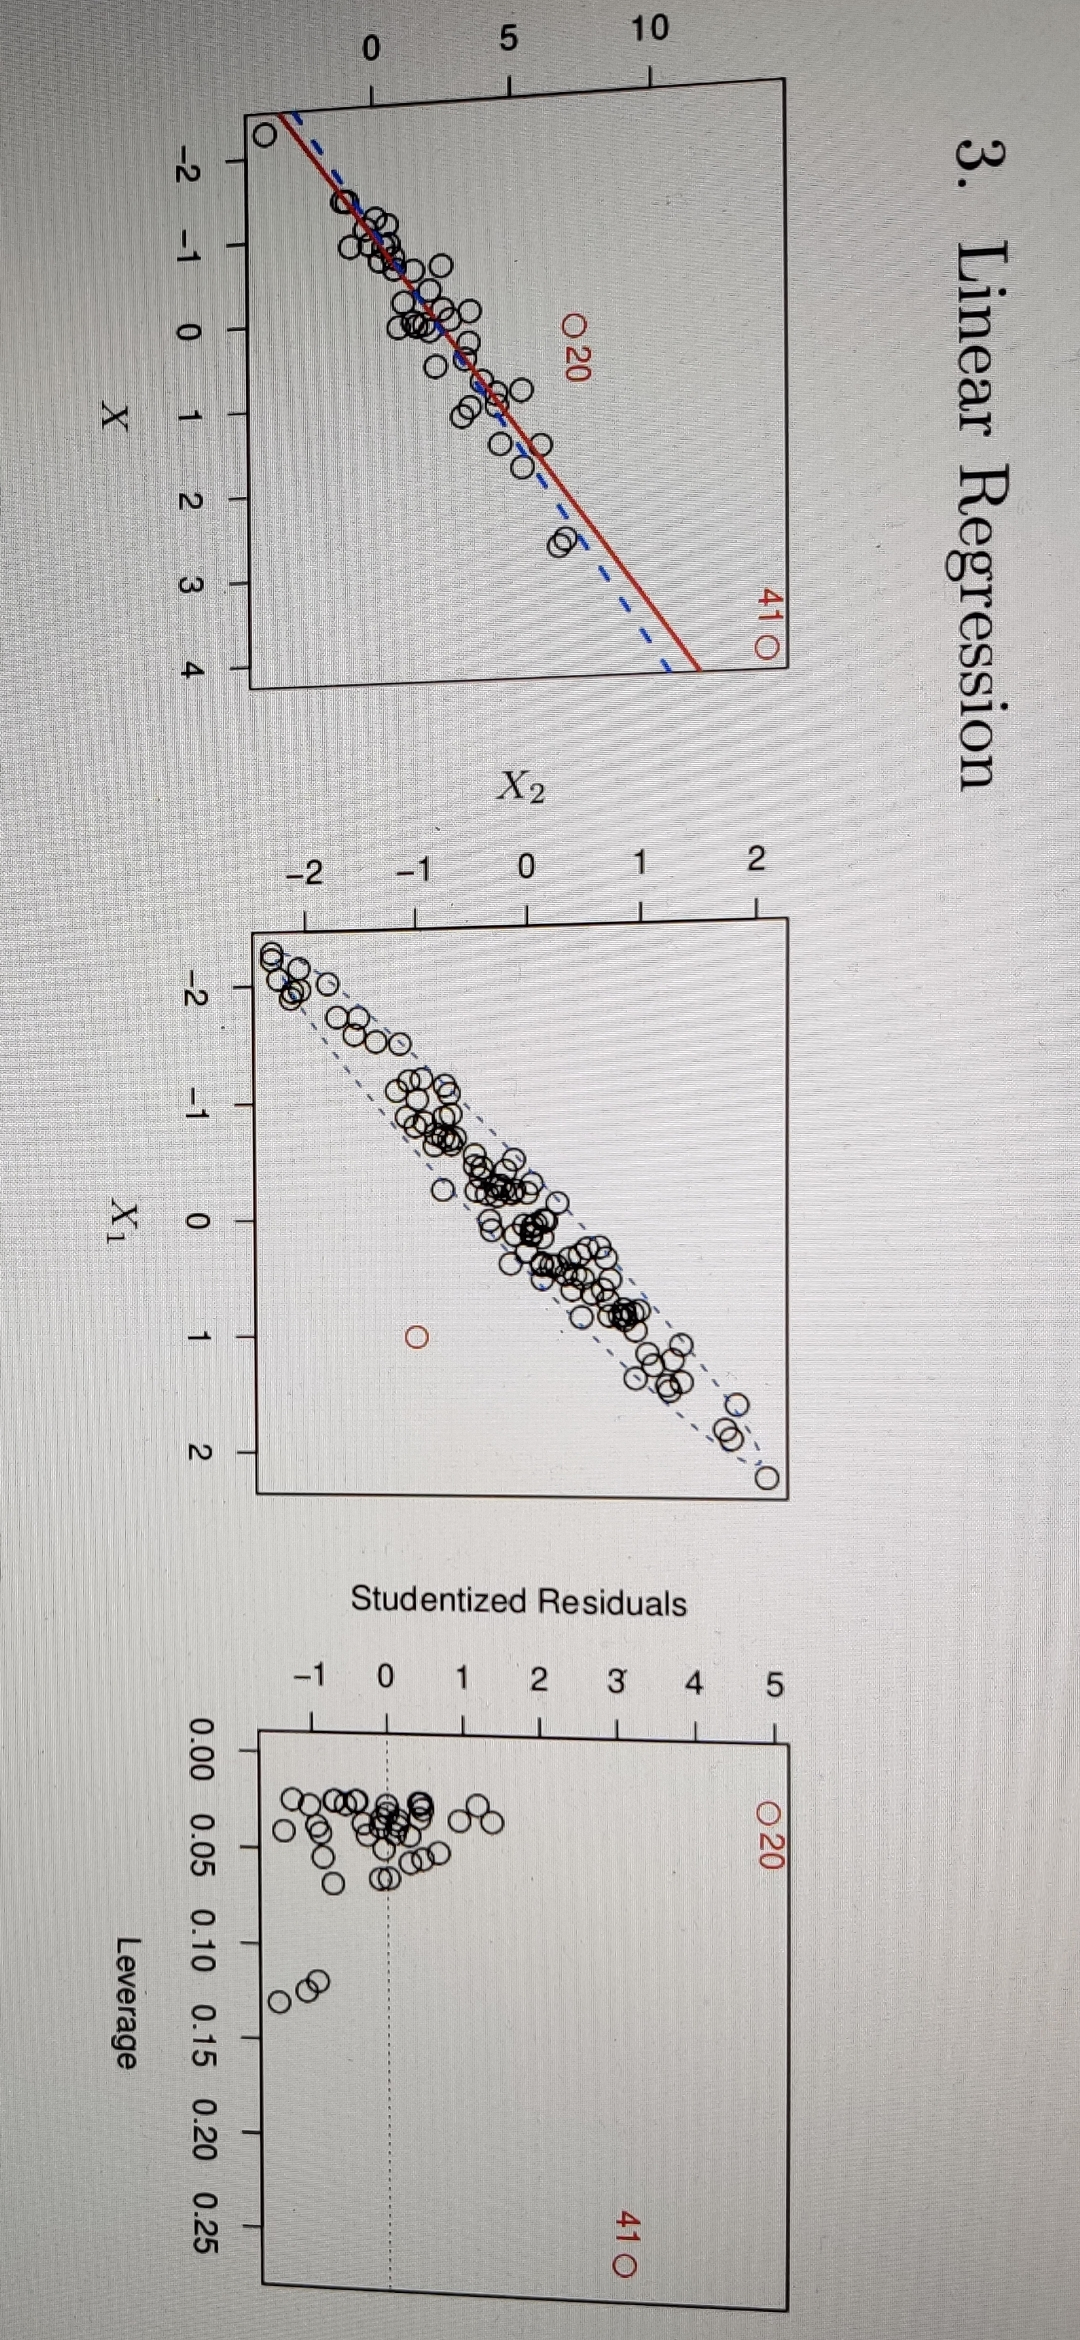

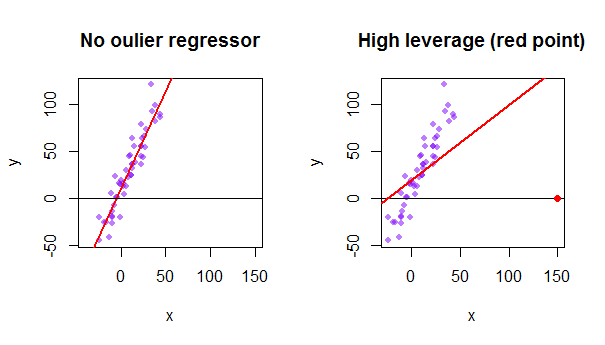

### Polynomial Regression reste Lineaire

Malgré le fait que la ligne de régression peut être visiblement non linéaire, la quadrature des variables prédictives signifie toujours que nous faisons une régression linéaire. Les exigences pour qu'une régression soit "linéaire" sont de l'avoir linéaire dans les paramètres. Voici un bon lien discutant de la différence entre la régression linéaire et non linéaire

http://blog.minitab.com/blog/adventures-in-statistics/what-is-the-difference-between-linear-and-nonlinear-equations-in-regression-analysis

In [53]:
# Non linéarité des données

results = smf.ols('Sales ~ TV + Radio + TV * Radio', data=adv).fit()
resid = adv['Sales'] - results.predict(adv)

In [54]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

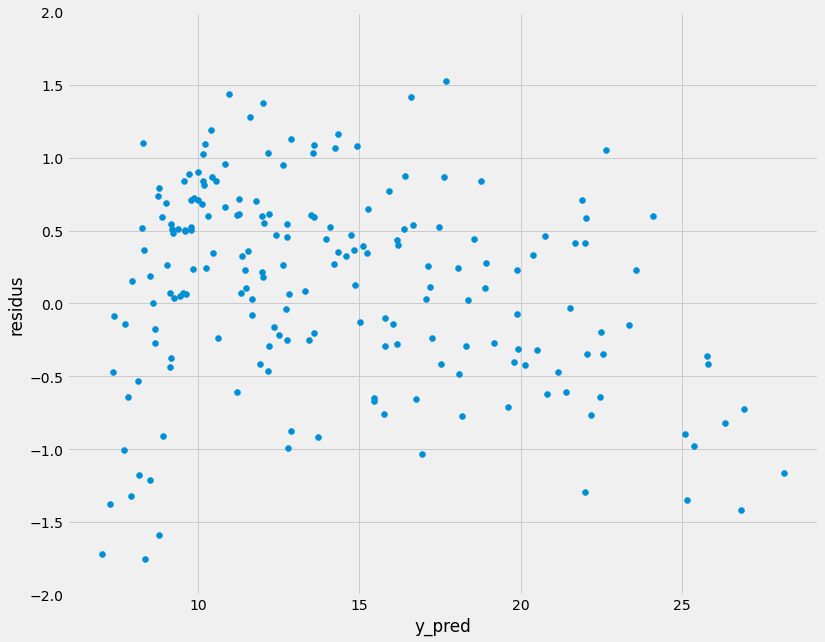

In [55]:
# Ressemble à une forme non aléatoire : les données semblent légèrement non linéaires 

plt.figure(figsize=(12,10))
plt.scatter(results.predict(adv), resid)
plt.xlabel('y_pred')
plt.ylabel('residus')
plt.ylim(-2, 2);

In [56]:
new_adv = adv.copy()
new_adv['TV * Radio'] = new_adv['TV'] * new_adv['Radio']
new_adv.head()

TV  Radio  Newspaper  Sales  TV * Radio
0  230.1   37.8       69.2   22.1     8697.78
1   44.5   39.3       45.1   10.4     1748.85
2   17.2   45.9       69.3    9.3      789.48
3  151.5   41.3       58.5   18.5     6256.95
4  180.8   10.8       58.4   12.9     1952.64

In [57]:
results = smf.ols('Sales ~ TV + Radio + TV * Radio', data=adv).fit()

In [58]:
lr.fit(new_adv[['TV', 'Radio', 'TV * Radio']], new_adv['Sales'])
lr.coef_, lr.intercept_

(array([0.01910107, 0.02886034, 0.00108649]), 6.750220203075118)

In [59]:
errors_model = abs(new_adv['Sales'] - (new_adv['TV'] * 0.01910107 + new_adv['Radio'] * 0.02886034 + new_adv['TV * Radio'] * 0.00108649 + 6.750220203075118))
errors_mean = abs(new_adv['Sales'] - new_adv['Sales'].mean())

In [60]:
SST = (errors_mean ** 2).sum()
SSE = (errors_model ** 2).sum()

In [61]:
R_square = 1 - (SSE / SST)
R_square

0.9677905498282217

In [62]:
MSE = SSE / (len(new_adv) - (len(new_adv.columns) -1))
MSR = (SST - SSE) / 3 
F_stat = MSR / MSE
F_stat

1963.056874661522

In [63]:
# Prob (F-statistic)

round(6.68e-146, 4)

0.0

In [64]:
print((new_adv['TV'] * 0.01910107 + new_adv['Radio'] * 0.02886034 + new_adv['TV * Radio'] * 0.00108649 + 6.750220203075118).mean())
print((new_adv['TV'] * 0.01910107 + new_adv['Radio'] * 0.02886034 + new_adv['TV * Radio'] * 0.00108649 + 6.750220203075118).std())

14.022483041561127
5.132727404626086


In [65]:
SSR = SST - SSE
RSE = np.sqrt(SSR / (len(new_adv) - 2 - 1))

In [66]:
w_0 = 6.750220203075118
w = np.array([[0.01910107, 
               0.02886034, 
               0.00108649]])
X = np.array(new_adv[['TV', 'Radio', 'TV * Radio']])

print(w.shape, X.shape)

y_pred = w_0 + X.dot(w.T)
y_pred.mean()

(1, 3) (200, 3)


14.02248304156112

In [67]:
from patsy import dmatrices
import statsmodels.api as sm

In [68]:
SAMPLE_SIZE = 200
 
#Select a random sample of size SAMPLE_SIZE
df_sample = new_adv.sample(n=SAMPLE_SIZE)
 
#Setup the model expression in Patsy syntax
model_expr = 'Sales ~ TV + Radio + TV * Radio'
 
#Carve out the X and y matrices using Patsy
y_train, X_train = dmatrices(model_expr, df_sample, return_type='dataframe')
 
#Build an OLS regression model using Statsmodels
olsr_model = sm.OLS(endog=y_train, exog=X_train)
 
#Fit the model on (y, X)
olsr_results = olsr_model.fit()
 
#Print the training summary of the fitted model
print(olsr_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     1963.
Date:                Thu, 02 Jun 2022   Prob (F-statistic):          6.68e-146
Time:                        16:06:52   Log-Likelihood:                -270.14
No. Observations:                 200   AIC:                             548.3
Df Residuals:                     196   BIC:                             561.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.7502      0.248     27.233      0.0

variance des residus : (e.Te)/(n-k)

In [69]:
e=np.array(results.resid)

e = e.reshape(e.shape[0], 1)
print(e.shape)

resid_var = e.T.dot(e) / ((np.shape(e)[0]) - ((np.shape(X_train)[0]) + 1))
print('Variance des residus = '+str(resid_var[0][0]))

(200, 1)
Variance des residus = -174.4833826277272


Variance estimée($\hat \beta | X) = s^2(X.TX)^{-1}$

In [70]:
X=np.array(X_train)
X_prime = np.array(np.transpose(X))
coeff_covs_matrix = np.linalg.inv(np.matmul(X_prime, X))*resid_var
print('Variance-Covariance Matrix des estimations des coefficients = \n'+str(coeff_covs_matrix))

Variance-Covariance Matrix des estimations des coefficients = 
[[-1.20422823e+01  6.32291056e-02  3.65267957e-01 -1.89813921e-03]
 [ 6.32291056e-02 -4.43440927e-04 -1.89736929e-03  1.32125678e-05]
 [ 3.65267957e-01 -1.89736929e-03 -1.55435614e-02  7.88845081e-05]
 [-1.89813921e-03  1.32125678e-05  7.88845081e-05 -5.38587988e-07]]


In [71]:
print((7.53546622e-01)**1/2)
print((2.77483456e-05)**1/2)
print((9.72639394e-04)**1/2)
print((3.37021793e-08)**1/2)

0.376773311
1.38741728e-05
0.000486319697
1.685108965e-08


La racine carrée des principaux éléments diagonaux correspond aux erreurs standard des coefficients ajustés :

In [72]:
coeff_std_errors = np.diag(np.sqrt(coeff_covs_matrix))
coeff_std_errors

C:\Users\david\AppData\Local\Temp\ipykernel_1204\2200054486.py:1: RuntimeWarning: invalid value encountered in sqrt
  coeff_std_errors = np.diag(np.sqrt(coeff_covs_matrix))


array([nan, nan, nan, nan])

Je n'arrive pas à retrouver les valeurs de `std err` ... mes calculs ne sont pas bon...

In [73]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     1963.
Date:                Thu, 02 Jun 2022   Prob (F-statistic):          6.68e-146
Time:                        16:06:52   Log-Likelihood:                -270.14
No. Observations:                 200   AIC:                             548.3
Df Residuals:                     196   BIC:                             561.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.7502      0.248     27.233      0.000       6.261       7.239
TV             0.0191      0.002     12.699      0.000       0.016       0.022
Radio          0.0289      0.009      3.241      0.001       0.011       0.046
TV:Radio       0.0011   5.24e-05     20.727      0.000       0.001       0.001
==============================================================================
Omnibus:                      128.132   Durbin-Watson:                   2.224
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1183.719
Skew:                          -2.323   Prob(JB):                    9.09e-258
Kurtosis:                      13.975   Cond. No.                     1.80e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.8e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [74]:
results.params

Intercept    6.750220
TV           0.019101
Radio        0.028860
TV:Radio     0.001086
dtype: float64

<AxesSubplot:xlabel='TV', ylabel='Sales'>

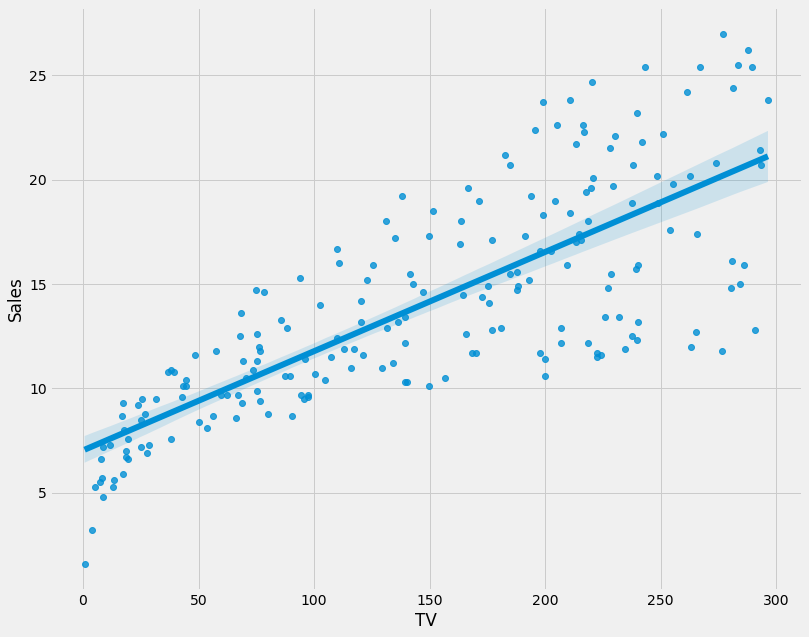

In [75]:
plt.figure(figsize=(12,10))
sns.regplot(x='TV', y='Sales', data=adv)

In [76]:
np.polyfit(new_adv['TV'], new_adv['Sales'], 1)

array([0.04753664, 7.03259355])

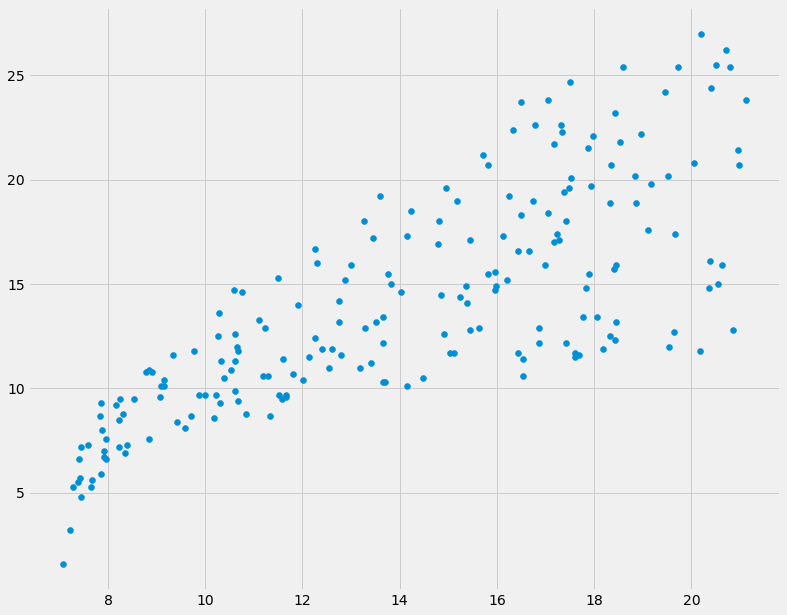

In [77]:
plt.figure(figsize=(12,10))
plt.scatter(0.04753664*adv['TV'] + 7.03259355, adv['Sales'])

### Lab

In [78]:
boston = pd.read_csv('boston.csv')
boston.head(10)

crim    zn  indus  chas    nox     rm    age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575   65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421   78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185   61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998   45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147   54.2  6.0622    3  222     18.7   
5  0.02985   0.0   2.18     0  0.458  6.430   58.7  6.0622    3  222     18.7   
6  0.08829  12.5   7.87     0  0.524  6.012   66.6  5.5605    5  311     15.2   
7  0.14455  12.5   7.87     0  0.524  6.172   96.1  5.9505    5  311     15.2   
8  0.21124  12.5   7.87     0  0.524  5.631  100.0  6.0821    5  311     15.2   
9  0.17004  12.5   7.87     0  0.524  6.004   85.9  6.5921    5  311     15.2   

    black  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  
5  394.12   5.21  28.7  
6  395.60  12.43  22.9  
7  396.90  19.15  27.1  
8  386.63  29.93  16.5  
9  386.71  17.10  18.9

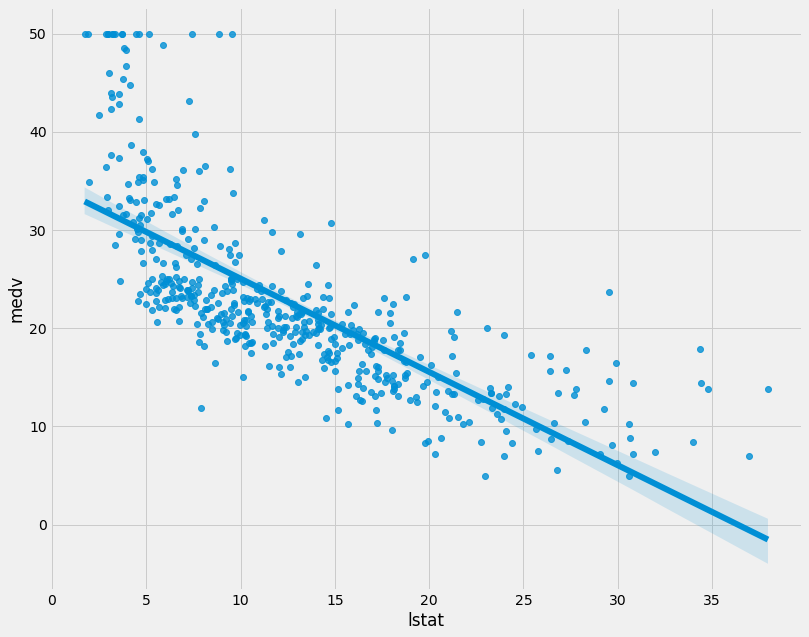

In [79]:
plt.figure(figsize=(12,10))
sns.regplot(x = 'lstat',y = 'medv', data=boston);

In [80]:
# statsmodels
results = smf.ols('medv ~ lstat', data=boston).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Thu, 02 Jun 2022   Prob (F-statistic):           5.08e-88
Time:                        16:06:53   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.5538      0.563     61.415      0.000      33.448      35.659
lstat         -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

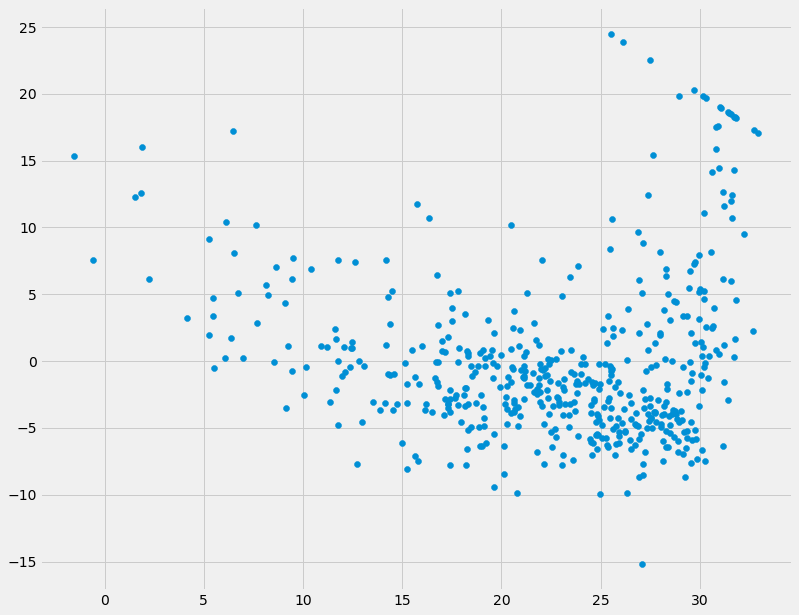

In [81]:
# Regardons les residus
# beaucoup de résidus sont non-linéaires : nous devons prendre un modèle adapté
plt.figure(figsize=(12,10))
plt.scatter(results.fittedvalues, results.resid);

In [82]:
# Prenons toutes les colonnes : la plupart sont significatives

string_cols = ' + '.join(boston.columns[:-1])
results = smf.ols('medv ~ {}'.format(string_cols), data=boston).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Thu, 02 Jun 2022   Prob (F-statistic):          6.72e-135
Time:                        16:06:53   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.000      26.432      46.487
crim          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
zn             0.0464      0.014      3.382      0.001       0.019       0.073
indus          0.0206      0.061      0.334      0.738      -0.100       0.141
chas           2.6867      0.862      3.118      0.002       0.994       4.380
nox          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
rm             3.8099      0.418      9.116      0.000       2.989       4.631
age            0.0007      0.013      0.052      0.958      -0.025       0.027
dis           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
rad            0.3060      0.066      4.613      0.000       0.176       0.436
tax           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
ptratio       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
black          0.0093      0.003      3.467      0.001       0.004       0.015
lstat         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [83]:
# Supprimons la colonne 'age'

string_cols = ' + '.join(boston.columns[:-1].difference(['age']))
results = smf.ols('medv ~ {}'.format(string_cols), data=boston).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     117.3
Date:                Thu, 02 Jun 2022   Prob (F-statistic):          6.08e-136
Time:                        16:06:53   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3024.
Df Residuals:                     493   BIC:                             3079.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4369      5.080      7.172      0.000      26.456      46.418
black          0.0093      0.003      3.481      0.001       0.004       0.015
chas           2.6890      0.860      3.128      0.002       1.000       4.378
crim          -0.1080      0.033     -3.290      0.001      -0.173      -0.043
dis           -1.4786      0.191     -7.757      0.000      -1.853      -1.104
indus          0.0206      0.061      0.335      0.738      -0.100       0.141
lstat         -0.5239      0.048    -10.999      0.000      -0.617      -0.430
nox          -17.7135      3.679     -4.814      0.000     -24.943     -10.484
ptratio       -0.9522      0.130     -7.308      0.000      -1.208      -0.696
rad            0.3058      0.066      4.627      0.000       0.176       0.436
rm             3.8144      0.408      9.338      0.000       3.012       4.617
tax           -0.0123      0.004     -3.283      0.001      -0.020      -0.005
zn             0.0463      0.014      3.404      0.001       0.020       0.073
==============================================================================
Omnibus:                      178.343   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              786.386
Skew:                           1.523   Prob(JB):                    1.73e-171
Kurtosis:                       8.294   Cond. No.                     1.48e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.48e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [84]:
# Interaction : lstat * age

results = smf.ols('medv ~ lstat * age', data=boston).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     209.3
Date:                Thu, 02 Jun 2022   Prob (F-statistic):           4.86e-88
Time:                        16:06:53   Log-Likelihood:                -1635.0
No. Observations:                 506   AIC:                             3278.
Df Residuals:                     502   BIC:                             3295.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.0885      1.470     24.553      0.000      33.201      38.976
lstat         -1.3921      0.167     -8.313      0.000      -1.721      -1.063
age           -0.0007      0.020     -0.036      0.971      -0.040       0.038
lstat:age      0.0042      0.002      2.244      0.025       0.001       0.008
==============================================================================
Omnibus:                      135.601   Durbin-Watson:                   0.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              296.955
Skew:                           1.417   Prob(JB):                     3.29e-65
Kurtosis:                       5.461   Cond. No.                     6.88e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.88e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [85]:
# Interaction : lstat + lstat ** 2
results = smf.ols('medv ~ lstat + np.power(lstat, 2)', data=boston).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     448.5
Date:                Thu, 02 Jun 2022   Prob (F-statistic):          1.56e-112
Time:                        16:06:53   Log-Likelihood:                -1581.3
No. Observations:                 506   AIC:                             3169.
Df Residuals:                     503   BIC:                             3181.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             42.8620      0.872     49.149      0.000      41.149      44.575
lstat                 -2.3328      0.124    -18.843      0.000      -2.576      -2.090
np.power(lstat, 2)     0.0435      0.004     11.628      0.000       0.036       0.051
==============================================================================
Omnibus:                      107.006   Durbin-Watson:                   0.921
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              228.388
Skew:                           1.128   Prob(JB):                     2.55e-50
Kurtosis:                       5.397   Cond. No.                     1.13e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [86]:
from statsmodels.stats.anova import anova_lm

In [87]:
results1 = smf.ols('medv ~ lstat', data=boston).fit()
results2 = smf.ols('medv ~ lstat + np.power(lstat, 2)', data=boston).fit()

anova_lm(results1, results2)

df_resid           ssr  df_diff     ss_diff           F        Pr(>F)
0     504.0  19472.381418      0.0         NaN         NaN           NaN
1     503.0  15347.243158      1.0  4125.13826  135.199822  7.630116e-28

In [88]:
# F
(results1.ssr - results2.ssr) / (results2.ssr / results2.df_resid)

135.19982210087167

In [89]:
anova_lm(results1)

df        sum_sq       mean_sq           F        PR(>F)
lstat       1.0  23243.913997  23243.913997  601.617871  5.081103e-88
Residual  504.0  19472.381418     38.635677         NaN           NaN

In [90]:
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Thu, 02 Jun 2022   Prob (F-statistic):           5.08e-88
Time:                        16:06:54   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.5538      0.563     61.415      0.000      33.448      35.659
lstat         -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [91]:
### carseats dataset

carseats = pd.read_csv('carseats.csv')
carseats.head()

Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0   9.50        138      73           11         276    120       Bad   42   
1  11.22        111      48           16         260     83      Good   65   
2  10.06        113      35           10         269     80    Medium   59   
3   7.40        117     100            4         466     97    Medium   55   
4   4.15        141      64            3         340    128       Bad   38   

   Education Urban   US  
0         17   Yes  Yes  
1         10   Yes  Yes  
2         12   Yes  Yes  
3         14   Yes  Yes  
4         13   Yes   No

In [92]:
results = smf.ols('Sales ~ ShelveLoc', data=carseats).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.317
Model:                            OLS   Adj. R-squared:                  0.314
Method:                 Least Squares   F-statistic:                     92.23
Date:                Thu, 02 Jun 2022   Prob (F-statistic):           1.27e-33
Time:                        16:06:54   Log-Likelihood:                -906.03
No. Observations:                 400   AIC:                             1818.
Df Residuals:                     397   BIC:                             1830.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               5.5229      0.239     23.131      0.000       5.054       5.992
ShelveLoc[T.Good]       4.6911      0.348     13.464      0.000       4.006       5.376
ShelveLoc[T.Medium]     1.7837      0.286      6.229      0.000       1.221       2.347
==============================================================================
Omnibus:                        0.077   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.962   Jarque-Bera (JB):                0.092
Skew:                           0.033   Prob(JB):                        0.955
Kurtosis:                       2.966   Cond. No.                         4.57
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Exercices

https://onmee.github.io/assets/docs/ISLR/Linear-Regression.pdf

### Exercice 1

Décrivez les hypothèses nulles auxquelles correspondent les **p-values** données dans le tableau suivant. Expliquez quelles conclusions vous pouvez tirer sur la base de ces **p-values**. Votre explication doit être formulée en termes de `Sales`, `TV`, `radio` et `newspaper`, plutôt qu'en termes de coefficients du modèle linéaire

les hypothèses nulles pour ces données sont:</br>
    $$H_0 (TV): \beta_1 = 0$$
    
$$H_0 (radio): \beta_2 = 0$$
    
$$H_0 (newspaper): \beta_3 = 0$$

chacune testant s'il existe une relation entre cette variable et les ventes étant donné que les deux autres variables sont maintenues constantes

**p_values** pour `TV` et 'radio' sont significatives : on peut donc rejeter les hypothèses nulles (les coefficients ont une incidence sur les predictions de `Sales`) : les dépenses publicitaires à la télévision et à la radio aient un impact positif sur les ventes.

**p-value** pour `newspaper` n'est pas significative et on ne peut pas rejeter l'hypothèse nulle : les dépenses de journaux n'augmentent pas les ventes de manière significative en présence des dépenses de TV et radio.   

### Exercice 2

Expliquer les différences entre KNN Classifier et KNN Regressor

KNN fait référence à une méthode non paramétrique qui peut être utilisée pour la classification ou la régression. Dans le cas de la classification, un classificateur KNN identifie les K points les plus proches de l'observation $𝑥_0$ à classer. Il estime ensuite la probabilité que $𝑥_0$ appartienne à une classe spécifique en fonction de la fraction de cette classe parmi tous les K points sélectionnés. Enfin, le point est classé comme appartenant à la classe avec la probabilité la plus élevée. Le classificateur KNN a fourni une réponse qualitative. La régression KNN est similaire à la classification en ce sens qu'elle utilise également les K points les plus proches de $𝑥_0$ .Cependant, contrairement à un classificateur, elle fournit une prédiction quantitative en faisant la moyenne des K points pour estimer $𝑓(𝑥_0)$

### Exercice 3

Supposons que nous ayons un ensemble de données avec cinq prédicteurs: 

$$X1 = GPA$$, 

$$X2 = QI$$,

$$X3 = Level (1 \space pour\space  College\space  et\space  0\space  pour\space  High\space  School)$$,

$$X4 = Interaction\space  entre\space  GPA \space et\space  QI$$,

$$X5 = Interaction\space  entre \space GPA \space et\space  Level$$

La réponse est le salaire de départ après l'obtention du diplôme (en milliers de dollars). Supposons que nous utilisions les moindres carrés pour ajuster le modèle et que nous obtenions **βˆ0 = 50, βˆ1 = 20, βˆ2 = 0,07, βˆ3 = 35, βˆ4 = 0,01, βˆ5 = −10.**

La regression entre prédicteurs et target est :
    
$$Y = 50 + (20*GPA) + (0.07*IQ) + (35*Level) + (0.01*GPA \space x \space IQ) - (10*GPA \space x\space Level)$$

fixons une valeur pour `GPA` et `IQ`

In [93]:
GPA = 10
IQ = 120

si on etudie les gens qui sont au `College` (`Level` = 1) on obtient :

In [94]:
y_college = 50 + (20*GPA) + (0.07*IQ) + (35*1) +(0.01*GPA*IQ) - (10*GPA*1)
y_college

205.39999999999998

si les gens sont en `High School` (`Level` = 0) on obtient:

In [95]:
y_hs = 50 + (20*GPA) + (0.07*IQ) + (35*0) +(0.01*GPA*IQ) - (10*GPA*0)
y_hs

270.4

Donc, pour valeur fixe de `GPA` et `IQ`, les gens qui sont au `College` toucheront **moins de salaire** que ceux qui sont en `High School` si la valeur de `GPA` atteint une certaine valeur

A l'inverse, pour valeur fixe de `GPA` et `IQ`, les gens qui sont au `College` toucheront **plus de salaire** que ceux qui sont en `High School` si la valeur de `GPA` est faible

la valeur exacte de basculement entre le salaire de `College` et `High School` est : `GPA` = 3.5 

In [96]:
GPA = 3.5
IQ = 120

y_college = 50 + (20*GPA) + (0.07*IQ) + (35*1) +(0.01*GPA*IQ) - (10*GPA*1)
print(y_college)

y_hs = 50 + (20*GPA) + (0.07*IQ) + (35*0) +(0.01*GPA*IQ) - (10*GPA*0)
print(y_hs)

132.6
132.6


il faut que `35*Level -(10*GPA*Leval)` < 0 pour que y_hs > y_college

In [97]:
(35*0 - (10*GPA*0)) < (35*1 - (10*GPA*1))

False

2- Prédire le salaire d'un diplômé universitaire avec un QI de 110 et un GPA de 4.0

In [98]:
Level = 1
GPA = 4.0
IQ = 110

y = 50 + (20*GPA) + (0.07*IQ) + (35*Level) +(0.01*GPA*IQ) - (10*GPA*Level)
y

137.1

3- Vrai ou faux : Étant donné que le coefficient du terme d'interaction GPA/IQ est très faible, il y a très peu de preuves d'un effet d'interaction. Justifiez votre réponse.

Faux !

C'est l'erreur type (standard error) du coefficient qui détermine la signification : on peut calculer la valeur p du coefficient pour déterminer s'il est statistiquement significatif.

### Exercice 4

Nous recueillons un ensemble de données (n = 100 observations) contenant un seul prédicteur et une réponse quantitative. On ajuste ensuite un modèle de régression linéaire aux données, ainsi qu'une régression cubique séparée, c'est-à-dire $Y = β0 + β1X + β2X2 + β3X3 + ϵ$

**1_
Supposons que la vraie relation entre X et Y soit linéaire, c'est-à-dire $Y = β0 + β1X + ϵ$. Considérez la somme résiduelle des carrés (RSS) de training pour la régression linéaire, ainsi que la RSS de training pour la régression cubique. Est-ce qu'on s'attendrait à ce que l'un soit inférieur à l'autre, est-ce qu'on s'attendrait à ce qu'ils soient les mêmes, ou n'y a-t-il pas assez d'informations pour le dire ? Justifiez votre réponse**

Pour le training data, RSS decroit quand la complexité du modèle croit : donc le RSS de la regression cubique est plus faible que le RSS de la regression linéaire

**2_ Répondez (1_) en utilisant le test plutôt que le training RSS.**

La vraie relation est linéaire et donc une régression linéaire simple se généraliserait mieux aux données pas encore vues, on s'attendrait à ce qu'elle ait un RSS de test inférieur. Le modèle cubique sur-adapte probablement les données de training, et on s'attendrait donc à ce qu'il ait un RSS de test plus élevé

**3_Supposons que la vraie relation entre X et Y n'est pas linéaire, mais nous ne savons pas à quelle distance elle est linéaire. Considérez le RSS de training pour la régression linéaire, ainsi que le RSS de training pour la régression cubique. Est-ce qu'on s'attendrait à ce que l'un soit inférieur à l'autre, est-ce qu'on s'attendrait à ce qu'ils soient les mêmes, ou n'y a-t-il pas assez d'informations pour le dire ? Justifiez votre réponse.**

Même réponse que 1_ : le training RSS de la regression cubique est plus faible que le training RSS de la regression linéaire

La régression cubique s'adaptera mieux aux données non linéaires et donc son training RSS sera plus faible

**4 Répondez (3_) en utilisant le test plutôt que le training RSS.**

Le test RSS dépend de la distance entre la vraie relation $𝑓(𝑥)$ et la linéarité. Si $𝑓(𝑥)$ est plus linéaire que cubique, alors la régression cubique peut overfit, donc le RSS cubique sera plus élevé et le RSS linéaire sera plus faible. Si $𝑓(𝑥)$ est plus cubique que linéaire, alors la régression linéaire peut underfit, donc le RSS linéaire sera plus élevé et le RSS cubique sera plus faible.

### Exercice 5

Considérez les valeurs ajustées qui résultent de l'exécution d'une régression linéaire sans interception. Dans ce cadre, la ième valeur ajustée prend la forme :

### $$\hat y_i = x_i \hat \beta $$

avec :

$$\hat \beta = \left ( \sum_{i=1}^{n}x_i y_i \right ) / \left ( \sum_{i'=1}^{n}x_{i'}^2 \right )$$

Alors on peut ecrire :
    
### $$\hat y_i = \sum_{i'=1}^{n} a_{i'} y_{i'}$$

**Que represente $a_{i'}$ ?**

### $$\hat y_i = x_i \hat \beta $$

### $$\hat y_i = x_i * \frac{ \sum_{k=1}^{n}x_k y_k} {\sum_{j=1}^{n}x_{j}^2}$$

### $$\hat y_i = \frac{ x_i  \sum_{i=1}^{k}x_k y_k} {\sum_{j=1}^{n}x_{j}^2}$$

### $$\hat y_i = \sum_{i=1}^{k} \frac{(x_k y_k)x_i}{\sum_{j=1}^{n} x_{j}^2}$$

### $$\hat y_i = \sum_{i=1}^{k} \left ( \frac{x_i x_k}{\sum_{j=1}^{n} x_{j}^2} y_k \right )$$

### $$a = \frac{x_i x_k}{\sum_{j=1}^{n} x_{j}^2}$$

### $$\hat y_i = \sum_{i=1}^{k} a_k y_k$$

Nous interprétons ce résultat en disant que les valeurs ajustées de la régression linéaire sont des combinaisons linéaires des valeurs de réponse.

**6. En utilisant la formule ci-dessous, argumenter que dans le cas d'une régression linéaire simple, la droite des moindres carrés passe toujours par le point ($\bar x$, $\bar y$)**

### $$RSS = e_1^2 + e_2^2 + ... + e_n^2$$

### $$RSS = (y_1 - \hat \beta_0 - \hat \beta_1 x_1 )^2 + (y_2 - \hat \beta_0 - \hat \beta_1 x_2)^2 + ... + (y_n - \hat \beta_0 - \hat \beta_1 x_n)^2$$

### $$\hat \beta_1 = \frac{\sum_{i=1}^{n} (x_i - \bar x)(y_i - \bar y)}{\sum_{i=1}^{n} (x_i - \bar x)^2}$$

### $$\hat \beta_0 = \bar y - \hat \beta_1 \bar x$$

si $x_i = \bar x$ alors $\hat \beta_1 = 0$ donc $\hat \beta_0 = \bar y$ et $\hat y_i = \bar y$ 

Une ligne passera toujours par ($\bar x$, $\bar y$) quand $x_i = \bar x$

demonstration : https://math.stackexchange.com/questions/635670/show-that-the-least-squares-line-must-pass-through-the-center-of-mass

**7. Dans le cas d'une régression linéaire simple de $Y$ sur $X$, la statistique $R^2$ est égale au carré de la corrélation entre $X$ et $Y$ ($R^2 = Cor(X, Y)^2$). Prouver que c'est le cas. Pour simplifier, vous pouvez supposer que $\bar x = \bar y = 0$.**

si $\bar x = \bar y = 0$ alors :

### $$RSS = \sum_{i=1}^{n}(y_i - \hat y_i)^2$$

### $$SST = \sum_{i=1}^{n}y_i^2$$

Nous devons démontrer que $R^2 = Cor(X, Y)^2$

### $$R^2 = \frac {SST - SSR}{SST}$$

### $$R^2 = \frac {\sum y_i^2 - \sum (y_i - \hat y_i)^2}{\sum y_i^2}$$

### $$R^2 = \frac {\sum y_i^2 - \sum y_i^2 + 2 \sum y_i \hat y_i - \sum \hat y_i ^2}{\sum y_i^2}$$

### $$R^2 = \frac {2 \sum y_i \hat y_i - \sum \hat y_i^2}{\sum y_i^2}$$

### $$\hat y_i = \hat \beta_1 x_i$$

or : 

### $$\hat y_i = \sum_{i=1}^{n} \frac{(x_i y_i)x_i}{\sum_{i=1}^{n} x_{i}^2}$$

### $$\hat y_i = x_i \frac{\sum_{i=1}^{n}(x_i y_i)}{\sum_{i=1}^{n} x_{i}^2}$$

donc : 

### $$R^2 = \frac {2  \sum y_i (x_i \frac {\sum x_i y_i}{\sum x_i^2}) - \sum (x_i \frac {\sum x_i y_i}{\sum x_i^2})^2}{\sum y_i^2}$$

## $$R^2 = \frac{\frac{2 \sum y_i x_i \sum xi y_i}{\sum x_i^2} - \frac{\sum x_i^2 (\sum x_i y_i)^2}{\sum (x_i^2)^2}}{\sum y_i^2}$$

## $$R^2 = \frac{\sum x_i^2}{\sum x_i^2} * \frac{\frac{2 (\sum x_i y_i)^2}{\sum x_i^2} - \frac{\sum x_i^2 (\sum x_i y_i)^2}{\sum x_i^2}}{\sum y_i^2}$$

## $$R^2 = \frac{\frac{2 \sum x_i^2(\sum x_i y_i)^2}{\sum x_i^2} - \frac{\sum x_i^2 \sum x_i^2 (\sum x_i y_i)^2}{\sum (x_i^2)^2}}{\sum x_i^2 \sum y_i^2}$$

## $$R^2 = \frac{2 (\sum x_i y_i)^2 - \frac{ \sum (x_i^2)^2 (\sum x_i y_i)^2}{\sum (x_i^2)^2}}{\sum x_i^2 \sum y_i^2}$$

## $$R^2 = \frac{2 (\sum x_i y_i)^2 - (\sum x_i y_i)^2}{\sum x_i^2 \sum y_i^2}$$

## $$R^2 = \frac{\sum (x_i y_i)^2}{\sum x_i^2 \sum y_i^2}$$

### $$R^2 = Cov(\sum x_i, \sum y_i) = Cov(X, Y)$$

**Utilisez la fonction smf.ols() pour effectuer une régression linéaire simple avec `mpg` comme réponse et `horsepower` comme prédicteur. Utilisez la fonction summary() pour imprimer les résultats. Commentez la sortie. Par exemple:**

**- a) Existe-t-il une relation entre le prédicteur et la réponse ?**

**- b) Quelle est la force de la relation entre le prédicteur et la réponse ?**

**- c) La relation entre le prédicteur et la réponse est-elle positive ou négative ?** 

**- d) Quel est le mpg prévu associé à `horsepower` de 98 ? Quels sont les intervalles de confiance et de prédiction à 95 % associés ?**

**a)**

In [99]:
plt.style.use('fivethirtyeight')

In [100]:
import statsmodels.formula.api as smf

In [101]:
cd C:\Users\david\STATISTIQUES\Introduction to Statistical Learning\data

C:\Users\david\STATISTIQUES\Introduction to Statistical Learning\data


In [102]:
pwd

'C:\\Users\\david\\STATISTIQUES\\Introduction to Statistical Learning\\data'

In [103]:
df_car = pd.read_csv('auto.csv')
df_car.head()

mpg  cylinders  displacement  horsepower  weight  acceleration  year  \
0  18.0          8         307.0         130    3504          12.0    70   
1  15.0          8         350.0         165    3693          11.5    70   
2  18.0          8         318.0         150    3436          11.0    70   
3  16.0          8         304.0         150    3433          12.0    70   
4  17.0          8         302.0         140    3449          10.5    70   

   origin                       name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino

In [104]:
res = smf.ols('mpg ~ horsepower', data=df_car).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Thu, 02 Jun 2022   Prob (F-statistic):           7.03e-81
Time:                        16:06:54   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.9359      0.717     55.660      0.000      38.525      41.347
horsepower    -0.1578      0.006    -24.489      0.000      -0.171      -0.145
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [105]:
import scipy

print('t-statistic = %6.3f pvalue = %6.4f' %  scipy.stats.ttest_ind(df_car['mpg'].astype('float'), df_car['horsepower'].astype('float')))

t-statistic = -40.845 pvalue = 0.0000


Comme $R^2 = 0.605$ et que la p_value est < 0.05, il y a une forte relation entre `mpg` et `horsepower`

**b)**

$R^2 = 0.605$ ce qui signifie que **60%** de la variance de `mpg` est expliquée par `horsepower` dans ce modèle.

In [106]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(df_car['mpg'], df_car['horsepower'])
mse

8569.877908163264

In [107]:
(np.square(df_car['mpg'] - df_car['horsepower'])).mean(axis = 0)

8569.877908163264

In [108]:
y = df_car['mpg']
y_pred = 39.9359 + df_car['horsepower'] * (-0.1578)

RSS = np.sum((y - y_pred)**2)
RSS

9385.9257356

In [113]:
RSE = np.sqrt((1 / (len(df_car) - 2)) * RSS)
RSE

4.905759497277481

In [111]:
df_car['mpg'].mean()

23.44591836734694

In [114]:
RSE / df_car['mpg'].mean()

0.20923725061287074

Il y a 20% d'erreur ce qui démontre une forte corrélation entre `mpg` et `horsepower`

**c)**

`mpg` a une relation linéaire négative avec la `horsepower`. Pour chaque unité d'augmentation de `horsepower`, `mpg` chute de -0,158 mpg

**d)**

In [115]:
#Construit les intervalles de confiance pour les paramètres entrainés(fitted)

res.conf_int()

0          1
Intercept   38.525212  41.346510
horsepower  -0.170517  -0.145172

In [116]:
res.conf_int(alpha=0.05)

0          1
Intercept   38.525212  41.346510
horsepower  -0.170517  -0.145172

In [117]:
res.pvalues

Intercept     1.220362e-187
horsepower     7.031989e-81
dtype: float64

In [118]:
res.params['Intercept'] + res.params['horsepower'] * 98

24.467077152512424

In [119]:
# Standard error des paramètres estimés
res.bse

Intercept     0.717499
horsepower    0.006446
dtype: float64

`statsmodels.stats.outliers_influence` : Mesures des outliers et leur influence

`summary_table` : Génère une table de résumé qui indentifie les outliers et et leur influence (similaire à SAS)

`SAS` : https://www.lexjansen.com/nesug/nesug10/ad/ad07.pdf</br>   https://www.statology.org/sas-outliers/#:~:text=An%20outlier%20is%20an%20observation,by%20using%20the%20interquartile%20range.

In [120]:
from statsmodels.stats.outliers_influence import summary_table

il y 3 paramètres dans `summary_table`:
    
- **st**  : table des resultats
        
- **data** : données des statistiques de la table
    
- **ss2** : nom des colonnes de la table

In [121]:
summary_table(res, alpha=0.05)

(<class 'statsmodels.iolib.table.SimpleTable'>,
 array([[ 1.00000000e+00,  1.80000000e+01,  1.94160457e+01, ...,
          4.89673133e+00, -2.89181821e-01,  1.54280550e-04],
        [ 2.00000000e+00,  1.50000000e+01,  1.38914800e+01, ...,
          4.88393692e+00,  2.26972625e-01,  2.30675087e-04],
        [ 3.00000000e+00,  1.80000000e+01,  1.62591510e+01, ...,
          4.89069869e+00,  3.55950978e-01,  3.90707115e-04],
        ...,
        [ 3.90000000e+02,  3.20000000e+01,  2.66769034e+01, ...,
          4.89771886e+00,  1.08685221e+00,  1.94023733e-03],
        [ 3.91000000e+02,  2.80000000e+01,  2.74661271e+01, ...,
          4.89674458e+00,  1.09026090e-01,  2.18972960e-05],
        [ 3.92000000e+02,  3.10000000e+01,  2.69925929e+01, ...,
          4.89735462e+00,  8.18279955e-01,  1.14977531e-03]]),
 ['Obs',
  'Dep Var\nPopulation',
  'Predicted\nValue',
  'Std Error\nMean Predict',
  'Mean ci\n95% low',
  'Mean ci\n95% upp',
  'Predict ci\n95% low',
  'Predict ci\n95% upp',
  

`Dependent Variable` : ligne de la variable dépendante ou target($y$$).

`Predicted Value` : valeur prédite en utlisante la fitted line($\hat y$).

`Std Error Mean Predict` standard error pour confidence Intervals.

`Residual` : différence entre `Dependent Variable` et `Predicted Value` ($y - \hat y$).

`Std Error Residual` is the standard deviation of the 'Residual' statistic. Used like other standard errors.

`Student Residual` : standardized residual. Calcul : $\frac {'Residual'} {'Std Error Residual'} = Z scores$. 

`-2 -1 0 1 2` : graph de 'Student Residual'.

`Cook's D` : mesure d'influence. Estimation de l'influence de l'observation en ajustant les residuals en omettant cette observation du modèle

In [122]:
st, data, ss2 = summary_table(res, alpha=0.05)

In [123]:
st

<class 'statsmodels.iolib.table.SimpleTable'>

In [124]:
data.shape

(392, 12)

In [125]:
ss2

['Obs',
 'Dep Var\nPopulation',
 'Predicted\nValue',
 'Std Error\nMean Predict',
 'Mean ci\n95% low',
 'Mean ci\n95% upp',
 'Predict ci\n95% low',
 'Predict ci\n95% upp',
 'Residual',
 'Std Error\nResidual',
 'Student\nResidual',
 "Cook's\nD"]

In [126]:
print(data[:,4:6].shape)
print(data[:,4:6].T.shape)

(392, 2)
(2, 392)


In [127]:
fitted_value = data[:,2]
mean_predicted_se = data[:,3]
mean_predicted_ci_low, mean_predicted_ci_upp = data[:,4:6].T
predicted_ci_low, predicted_ci_upp = data[:, 6:8].T

`statsmodels.sandbox.regression.predstd.wls_prediction_std` : Calcule standard deviation et intervalle de confiance pour les prédictions
    
Ce calcul s'applique à `Weight Least Square (WLS)` et à `Ordinary Least Square (OLS)` mais pas à `General Linear Model` (`GLM`, dont les observations sont indépendantes mais pas identiquement distribuées)

`GLM` généralise la régression linéaire en permettant au modèle linéaire d'être relié à la variable réponse via une fonction lien et en autorisant l'amplitude de la variance de chaque mesure d'être une fonction de sa valeur prévue, en fonction de la loi choisie



https://en.wikipedia.org/wiki/Weighted_least_squares</br>
https://en.wikipedia.org/wiki/Generalized_linear_model  

In [128]:
from statsmodels.sandbox.regression.predstd import wls_prediction_std

retourne :
    
- **predstd** : standard error des predictions du modèle (même nombre de lignes que le modèle)
    
- **interval_l, interval_u** : borne inférieure et supérieure de l'intervalle de confiance

In [129]:
predstd, interval_l, interval_u = wls_prediction_std(res)

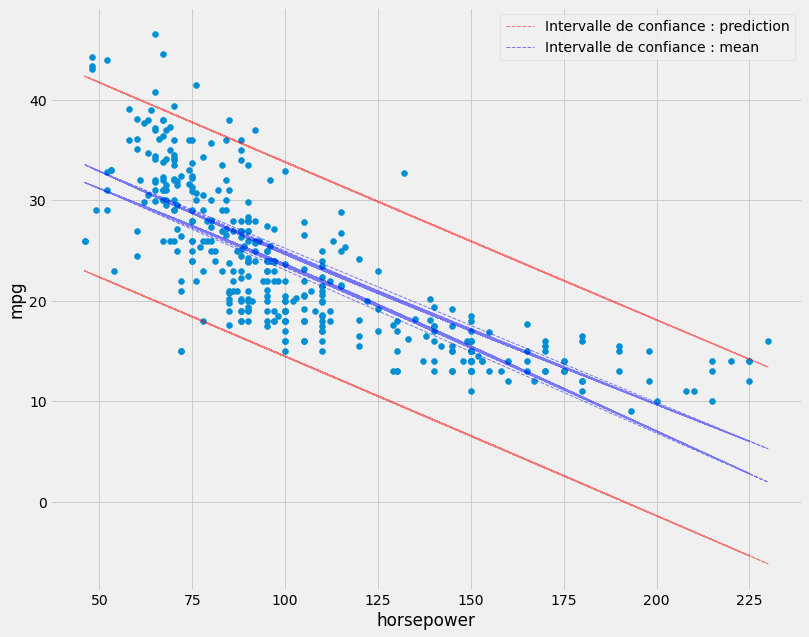

In [130]:
# plot OLS
plt.figure(figsize=(12,10))

ci_low = plt.plot(df_car['horsepower'], predicted_ci_low, 'r--', lw=1, alpha=0.5, label = 'Intervalle de confiance : prediction')
ci_upper = plt.plot(df_car['horsepower'], predicted_ci_upp, 'r--', lw=1, alpha=0.5)
mean_ci_lower = plt.plot(df_car['horsepower'], mean_predicted_ci_low, 'b--', lw=1, alpha=0.5, label = 'Intervalle de confiance : mean')
mean_ci_upper = plt.plot(df_car['horsepower'], mean_predicted_ci_upp, 'b--', lw=1, alpha=0.5)

plt.scatter(df_car['horsepower'], df_car['mpg'])
plt.xlabel('horsepower')
plt.ylabel('mpg')
plt.legend()
plt.show();

In [131]:
def confidence_intervals(df, target_name, predicateur_name):
    # import
    import statsmodels.formula.api as smf
    from statsmodels.stats.outliers_influence import summary_table
    from statsmodels.sandbox.regression.predstd import wls_prediction_std
    import matplotlib.pyplot as plt
    
    target, predicateur = target_name, predicateur_name
    res = smf.ols(f'{target} ~ {predicateur}', data=df).fit()
    st, data, ss2 = summary_table(res, alpha=0.05)
    
    fitted_value = data[:,2]
    mean_predicted_se = data[:,3]
    mean_predicted_ci_low, mean_predicted_ci_upp = data[:,4:6].T
    predicted_ci_low, predicted_ci_upp = data[:, 6:8].T
    
    predstd, interval_l, interval_u = wls_prediction_std(res)
    
    plt.figure(figsize=(12,10))
    
    ci_low = plt.plot(df[predicateur], predicted_ci_low, 'r--', lw=1, alpha=0.5, label = 'Intervalle de confiance : prediction')
    ci_upper = plt.plot(df[predicateur], predicted_ci_upp, 'r--', lw=1, alpha=0.5)
    mean_ci_lower = plt.plot(df[predicateur], mean_predicted_ci_low, 'b--', lw=1, alpha=0.5, label = 'Intervalle de confiance : mean')
    mean_ci_upper = plt.plot(df[predicateur], mean_predicted_ci_upp, 'b--', lw=1, alpha=0.5)
    
    plt.scatter(df[predicateur], df[target])
    plt.xlabel(predicateur)
    plt.ylabel(target)
    plt.legend()
    plt.show();
    
    plt.figure(figsize=(12,4))
    plt.hist(mean_predicted_se, bins=50)
    plt.title('Standard error pour intervalles de confiance')

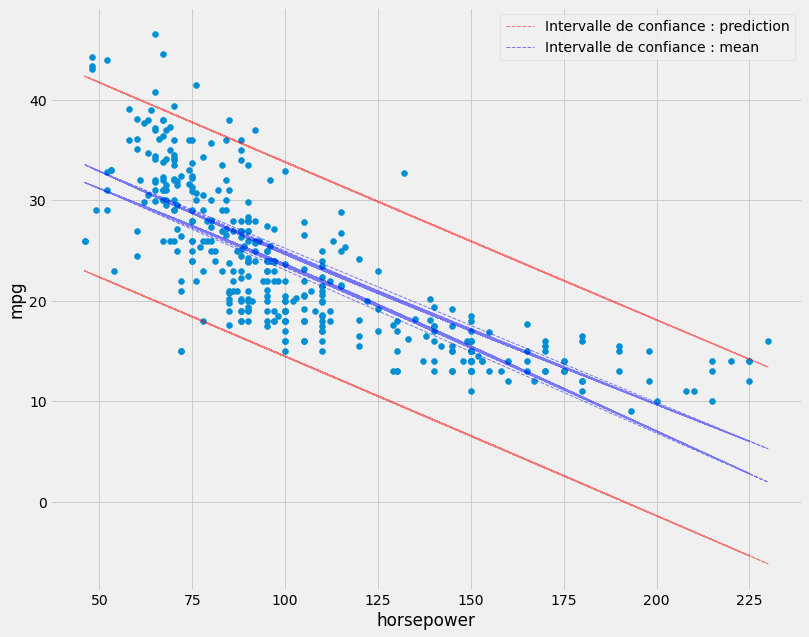

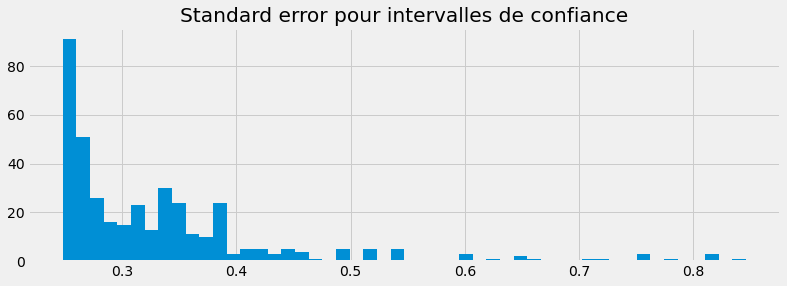

In [132]:
confidence_intervals(df_car, target_name = 'mpg', predicateur_name = 'horsepower')

In [133]:
B0 = 39.9359 #intercept coef
B1 = -0.1578 #horsepower coef
horsepower = 98

Y = B0 + B1*horsepower
print(Y)

24.4715


In [134]:
res.predict({'horsepower': 98})

0    24.467077
dtype: float64

In [135]:
p = res.get_prediction({'horsepower': 98})
p.summary_frame()

mean   mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
0  24.467077  0.251262      23.973079      24.961075     14.809396   

   obs_ci_upper  
0     34.124758

In [136]:
from scipy import stats

In [137]:
# https://www.real-statistics.com/regression/confidence-and-prediction-intervals/

# create function to compute confidence or prediction interval given an x value
def create_interval(ols_result, interval_type, alpha, x_values, conf_x):
    if interval_type == 'confidence':
        add_one = 0
    elif interval_type == 'prediction':
        add_one = 1
    else:
        print("Choose interval_type as confidence or prediction")
        return
    n = len(x_values)
    t_value = stats.t.ppf(1 - alpha / 2, df = n - 2)
    RSE = np.sqrt((ols_result.resid ** 2).sum() / (n - 2))
    numerator = (conf_x - x_values.mean()) ** 2
    denominator = ((x_values - x_values.mean()) ** 2).sum()
    interval = t_value * RSE * np.sqrt(add_one + (1 / n) + (numerator / denominator))
    prediction = res.params[0] + res.params[1] * conf_x
    return (prediction - interval, prediction + interval)

In [138]:
# alpha = 0.05
# 1 - alpha / 2 = 0.975  ([0.025 ; 0.975])
# t_value = 1.96 : si t > 1.96 ou t < -1.96 alors rejet H0(coefficient = 0) avec une probabilité d'erreur de 5%


In [139]:
create_interval(res, interval_type='confidence', alpha=0.05, x_values=df_car['horsepower'], conf_x=98)

(23.973078960703937, 24.96107534432091)

In [140]:
create_interval(res, interval_type='prediction', alpha=0.05, x_values=df_car['horsepower'], conf_x=98)

(14.809396070967116, 34.12475823405773)

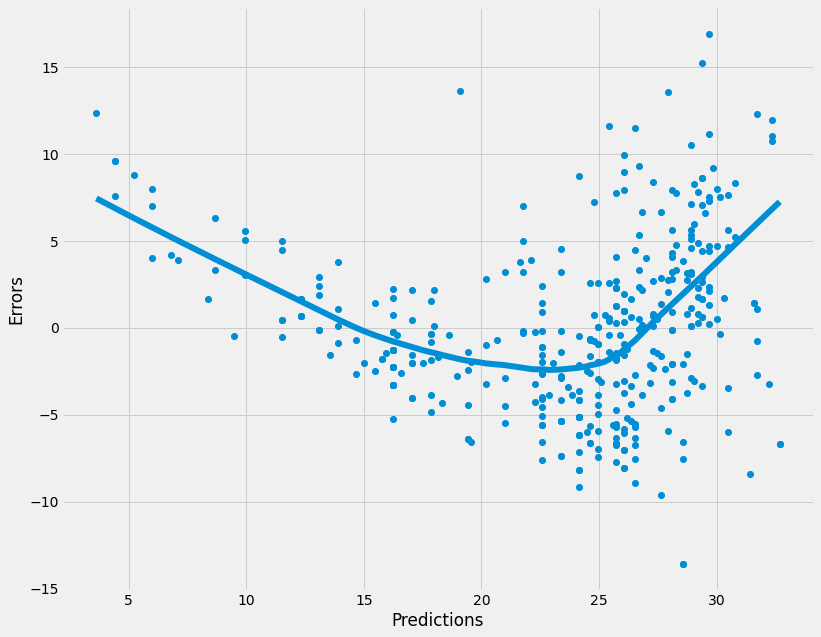

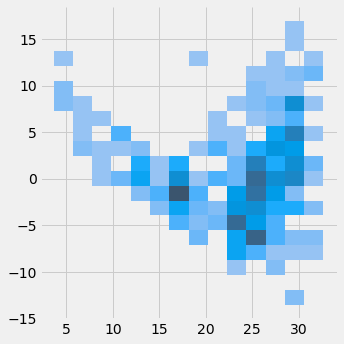

In [141]:
# res.fittedvalues = y_pred = 39.9359 + df_car['horsepower'] * (-0.1578)
# res.resid = y - y_pred
plt.figure(figsize=(12,10))
plt.scatter(res.fittedvalues, res.resid)
sns.regplot(x=res.fittedvalues,y=res.resid, lowess=True)
plt.xlabel('Predictions')
plt.ylabel('Errors')
sns.displot(x=res.fittedvalues,y=res.resid)

<AxesSubplot:xlabel='horsepower', ylabel='mpg'>

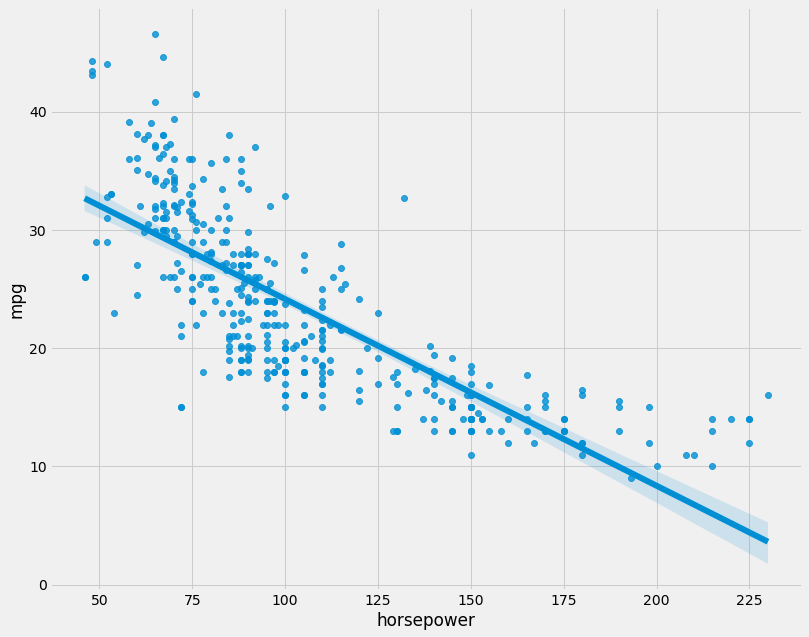

In [142]:
sns.regplot(x=df_car['horsepower'],y=df_car['mpg'])

In [143]:
from statsmodels.graphics.regressionplots import plot_leverage_resid2

**Leverage** fait référence à la mesure dans laquelle les coefficients du modèle de régression changeraient si une observation particulière était supprimée de l'ensemble de données.</br>
Les observations à effet de levier élevé ont une forte influence sur les coefficients du modèle de régression. Si nous supprimions ces observations, les coefficients du modèle changeraient sensiblement.

**Standardized residuals** font référence à la différence standardisée entre une valeur prédite pour une observation et la valeur réelle de l'observation.</br>
Il convient de noter qu'une observation peut avoir une valeur absolue élevée pour un **standardize residual**, mais avoir une faible valeur pour **leverage**.

In [144]:
cooks = res.get_influence().cooks_distance

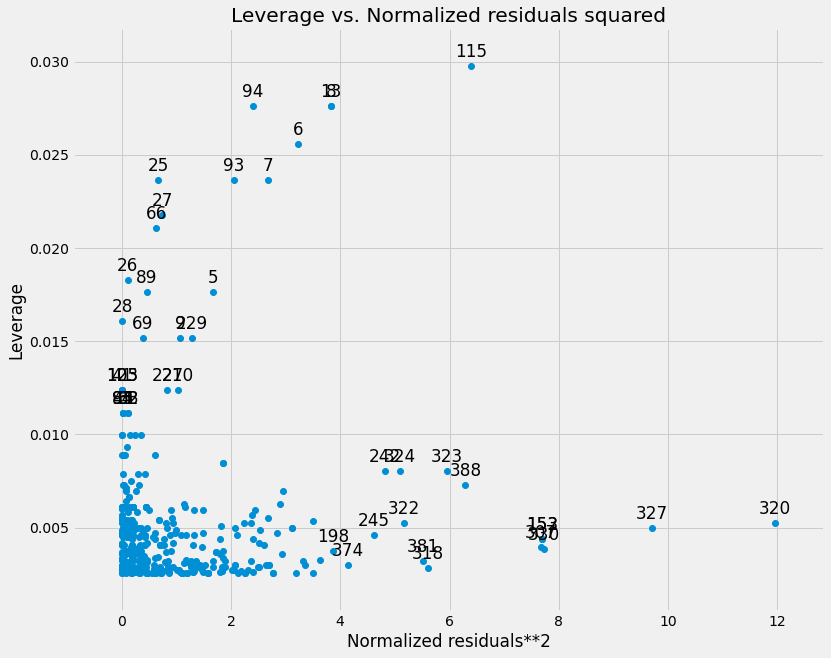

In [145]:
fig, ax = plt.subplots(figsize=(12,10))
fig = plot_leverage_resid2(res, ax = ax)

Text(0.5, 1.0, "Cook's distance")

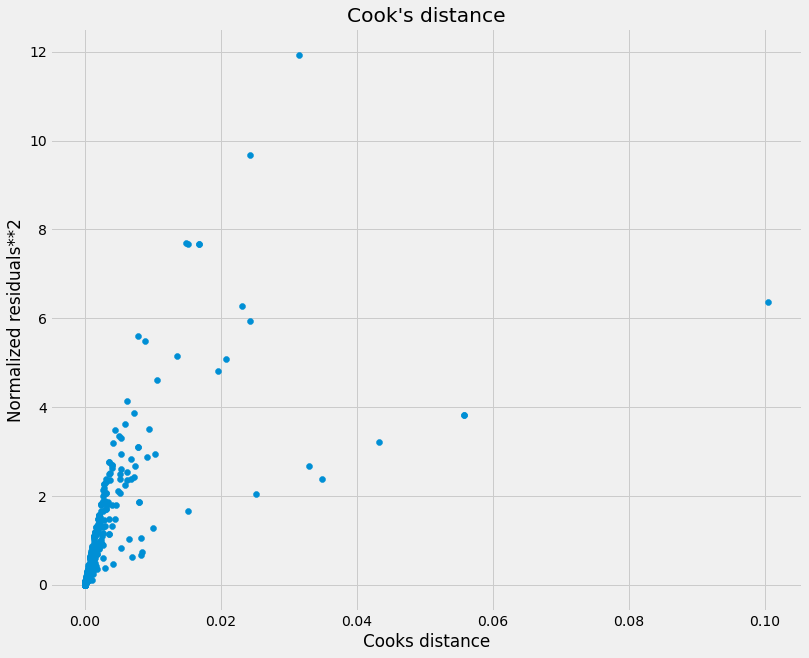

In [146]:
norm_resid = (y - y_pred - (y - y_pred).mean()) / (y-y_pred).std()
plt.scatter(cooks[0], norm_resid**2)
plt.xlabel('Cooks distance')
plt.ylabel('Normalized residuals**2')
plt.title("Cook's distance")

In [147]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Thu, 02 Jun 2022   Prob (F-statistic):           7.03e-81
Time:                        16:08:37   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.9359      0.717     55.660      0.000      38.525      41.347
horsepower    -0.1578      0.006    -24.489      0.000      -0.171      -0.145
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [148]:
X = df_car['horsepower']
n = len(X)
s = X.std()**0.5
SE_mean_X = (s / n**0.5) * np.sqrt(1 + (((X - X.mean())**2) / X.var()))

In [149]:
SE_mean_X

0      0.376020
1      0.583971
2      0.485369
3      0.485369
4      0.426450
         ...   
387    0.347562
388    0.529765
389    0.354910
390    0.375745
391    0.362839
Name: horsepower, Length: 392, dtype: float64

In [150]:
SE_pred_X = np.sqrt(s**2 + (SE_mean_X)**2)
SE_pred_X

0      6.215509
1      6.231547
2      6.223081
3      6.223081
4      6.218763
         ...   
387    6.213852
388    6.226701
389    6.214268
390    6.215492
391    6.214725
Name: horsepower, Length: 392, dtype: float64

In [151]:
SE_pred_X / (n**0.5)

0      0.313931
1      0.314741
2      0.314313
3      0.314313
4      0.314095
         ...   
387    0.313847
388    0.314496
389    0.313868
390    0.313930
391    0.313891
Name: horsepower, Length: 392, dtype: float64

In [152]:
def adj_r2(r2, n_samples, n_features):
    return 1-(1-r2) * (n_samples-1) / (n_samples-n_features-1)

In [153]:
R2_adj = adj_r2(0.606, 392, 1)

In [154]:
# standard error de la regression

RSE = ((1 - R2_adj)**0.5) * df_car['mpg'].std()

In [155]:
RSE / (n**0.5)

0.24776187361271515

### Exercice 9

In [1]:
cd C:\Users\david\STATISTIQUES\Introduction to Statistical Learning\data

C:\Users\david\STATISTIQUES\Introduction to Statistical Learning\data


In [2]:
pwd

'C:\\Users\\david\\STATISTIQUES\\Introduction to Statistical Learning\\data'

In [4]:
df_car = pd.read_csv('auto.csv')

**(a) Produisez une matrice de nuages de points qui inclut toutes les variables de l'ensemble de données.**

**(b) Calculez la matrice des corrélations entre les variables en utilisant la fonction cor(). Vous devrez exclure la variable de nom, cor() qui est qualitative.**

**(c) Utilisez la fonction lm() pour effectuer une régression linéaire multiple avec mpg comme réponse et toutes les autres variables sauf name comme prédicteurs. Utilisez la fonction summary() pour imprimer les résultats.**</br>
**Commentez la sortie. Par exemple : I. Existe-t-il une relation entre les prédicteurs et la réponse ? ii. Quels prédicteurs semblent avoir une relation statistiquement significative avec la réponse ? iii. Que suggère le coefficient de la variable année ?**
    
**(d) Utilisez la fonction plot () pour produire des tracés de diagnostic de l'ajustement de régression linéaire. Commentez tous les problèmes que vous voyez avec l'ajustement. Les parcelles résiduelles suggèrent-elles des valeurs aberrantes inhabituellement grandes ? Le graphique de l'effet de levier identifie-t-il des observations avec un effet de levier inhabituellement élevé ?** 

**(e) Utilisez les symboles '*' et : pour ajuster les modèles de régression linéaire avec des effets d'interaction. Certaines interactions semblent-elles statistiquement significatives ?**
    
**(f) Essayez quelques transformations différentes des variables, telles que log(X), √X, X^2. Commentez vos découvertes.**

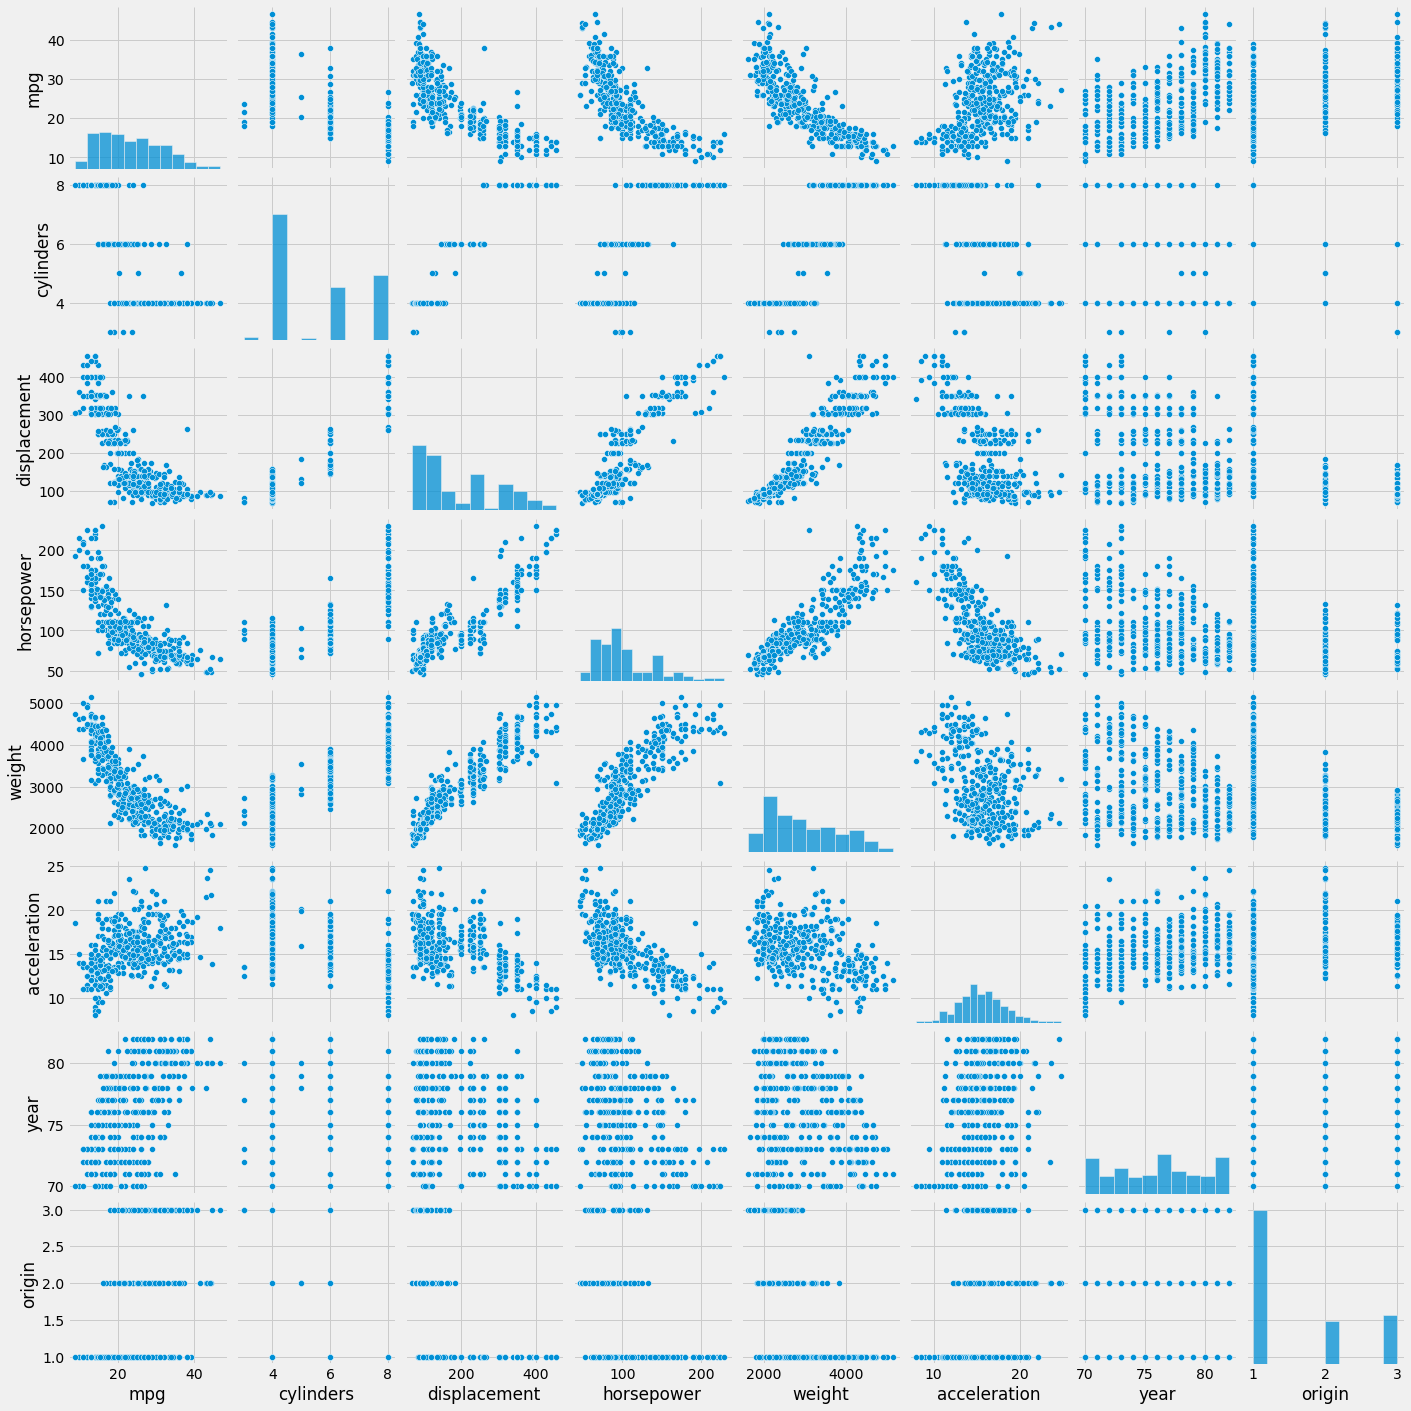

In [156]:
sns.pairplot(df_car)

**b) Calculez la matrice des corrélations entre les variables en utilisant la fonction cor(). Vous devrez exclure la variable de nom, cor() qui est qualitative**

In [157]:
df_car.corr()

mpg  cylinders  displacement  horsepower    weight  \
mpg           1.000000  -0.777618     -0.805127   -0.778427 -0.832244   
cylinders    -0.777618   1.000000      0.950823    0.842983  0.897527   
displacement -0.805127   0.950823      1.000000    0.897257  0.932994   
horsepower   -0.778427   0.842983      0.897257    1.000000  0.864538   
weight       -0.832244   0.897527      0.932994    0.864538  1.000000   
acceleration  0.423329  -0.504683     -0.543800   -0.689196 -0.416839   
year          0.580541  -0.345647     -0.369855   -0.416361 -0.309120   
origin        0.565209  -0.568932     -0.614535   -0.455171 -0.585005   

              acceleration      year    origin  
mpg               0.423329  0.580541  0.565209  
cylinders        -0.504683 -0.345647 -0.568932  
displacement     -0.543800 -0.369855 -0.614535  
horsepower       -0.689196 -0.416361 -0.455171  
weight           -0.416839 -0.309120 -0.585005  
acceleration      1.000000  0.290316  0.212746  
year              0.290316  1.000000  0.181528  
origin            0.212746  0.181528  1.000000

**(c) Utilisez la fonction lm() pour effectuer une régression linéaire multiple avec mpg comme réponse et toutes les autres variables sauf name comme prédicteurs. Utilisez la fonction summary() pour imprimer les résultats.**</br>
**Commentez la sortie. Par exemple : I. Existe-t-il une relation entre les prédicteurs et la réponse ? ii. Quels prédicteurs semblent avoir une relation statistiquement significative avec la réponse ? iii. Que suggère le coefficient de la variable année ?**

In [158]:
res = smf.ols('mpg ~ cylinders + displacement + horsepower + weight + acceleration + year + origin', data=df_car).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Thu, 02 Jun 2022   Prob (F-statistic):          2.04e-139
Time:                        16:08:47   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -17.2184      4.644     -3.707      0.000     -26.350      -8.087
cylinders       -0.4934      0.323     -1.526      0.128      -1.129       0.142
displacement     0.0199      0.008      2.647      0.008       0.005       0.035
horsepower      -0.0170      0.014     -1.230      0.220      -0.044       0.010
weight          -0.0065      0.001     -9.929      0.000      -0.008      -0.005
acceleration     0.0806      0.099      0.815      0.415      -0.114       0.275
year             0.7508      0.051     14.729      0.000       0.651       0.851
origin           1.4261      0.278      5.127      0.000       0.879       1.973
==============================================================================
Omnibus:                       31.906   Durbin-Watson:                   1.309
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.100
Skew:                           0.529   Prob(JB):                     2.95e-12
Kurtosis:                       4.460   Cond. No.                     8.59e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Il y a une forte correlation entre les predicteurs et la variable cible : `F-statistic`` est grande (252.4) et `Prob(F-statistic)` < 0.05 donc significative

`weight`, `displacement` `origin `et `year` ont chacun une **p-value** < 0.05 donc une forte relation avec la variable réponse `mpg`

le coefficient de `year` est 0.7508 donc `mpg` a une relation linéaire positive avec `year` : pour chaque unité qui augmente de `year`, `mpg` augmente de 0.7508mpg

mpg = 0.7508 * year ==> 1u * year = 0.7508u * mpg 

**(d) Utilisez la fonction plot () pour produire des tracés de diagnostic de l'ajustement de régression linéaire. Commentez tous les problèmes que vous voyez avec l'ajustement. Les parcelles résiduelles suggèrent-elles des valeurs aberrantes inhabituellement grandes ? Le graphique de l'effet de levier identifie-t-il des observations avec un effet de levier inhabituellement élevé ?**

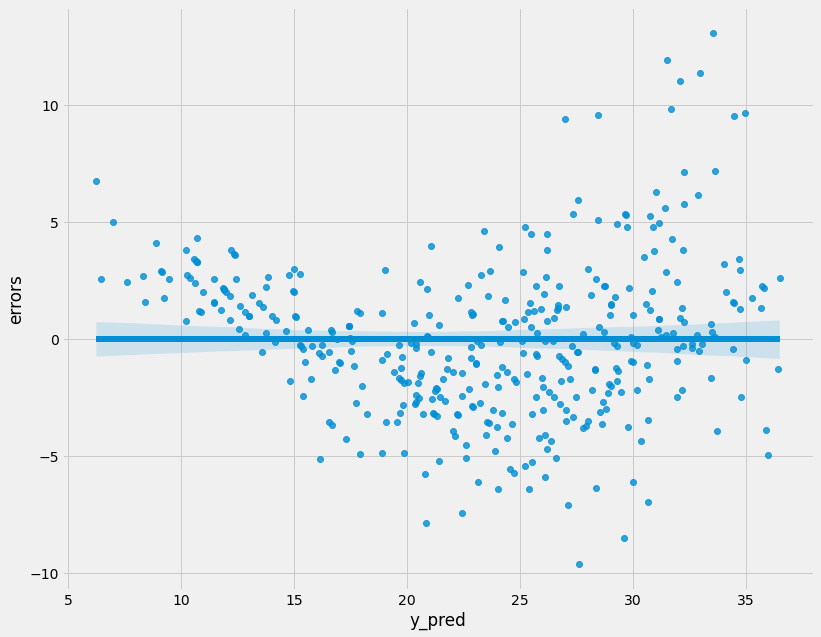

In [159]:
sns.regplot(x=res.fittedvalues, y=res.resid)
plt.xlabel('y_pred')
plt.ylabel('errors')
plt.show()

on observe une **hétéroscédasticité** des données

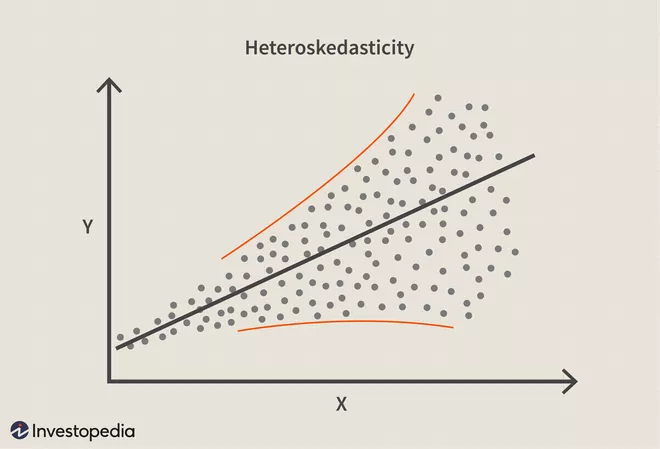

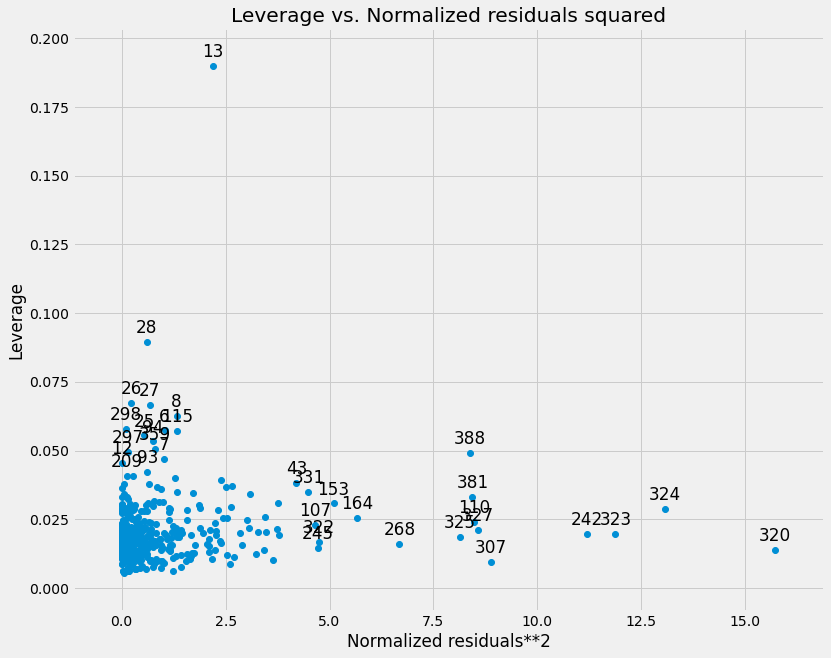

In [160]:
from statsmodels.graphics.regressionplots import *
plot_leverage_resid2(res)
plt.show()

la donnée $13$ à un **leverage élevé** mais une **valeur faible d'erreur** 

In [161]:
plt.style.use('seaborn')

In [162]:
from statsmodels.stats.outliers_influence import OLSInfluence

Un **Studentized residual** est le quotient résultant de la division d'un résidu par une estimation de son écart-type . Il s'agit d'une forme de **t-statistic** de Student , l'estimation de l'erreur variant d'un point à l'autre.

Il s'agit d'une technique importante dans la détection des valeurs aberrantes.  La division d'une statistique par un écart-type d'échantillon s'appelle la **studentization**, par analogie avec la **normalisation** et la **standardization**

In [163]:
results_influence = OLSInfluence(res)

In [164]:
results_influence.resid_studentized_external

0      0.911694
1      0.303123
2      0.838033
3      0.284757
4      0.618443
         ...   
387   -0.400051
388    2.968385
389    0.263679
390   -0.409047
391    0.689682
Length: 392, dtype: float64

In [165]:
results_influence.influence

0      0.071329
1      0.018464
2      0.060802
3      0.021365
4      0.053985
         ...   
387   -0.026423
388    0.493122
389    0.029919
390   -0.024943
391    0.051354
Length: 392, dtype: float64

Text(0.5, 0, 'Studentized Residual ** 2')

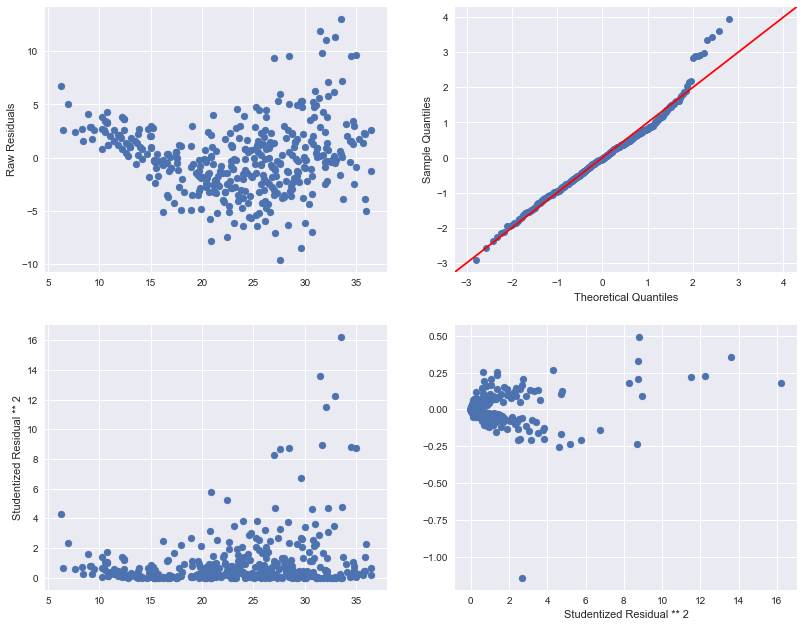

In [166]:
fig, ax = plt.subplots(2, 2, figsize=(12,10))
ax[0, 0].scatter(res.fittedvalues, res.resid)
ax[0, 0].set_ylabel("Raw Residuals")
ax[1, 0].scatter(res.fittedvalues, results_influence.resid_studentized_external ** 2)
ax[1, 0].set_ylabel("Studentized Residual ** 2")
sm.graphics.qqplot(res.resid / np.sqrt((res.resid ** 2).sum() / 390), line='45', ax=ax[0, 1])
ax[1, 1].scatter(results_influence.resid_studentized_external ** 2, results_influence.influence)
ax[1, 1].set_xlabel('Studentized Residual ** 2')

la plupart des residus se situent à moins de 3 ecarts-types

qqplot semble relativement bien jusqu'a la right-tail ou quelques observations au dessus de 3 ecarts-types ressemble à des outliers

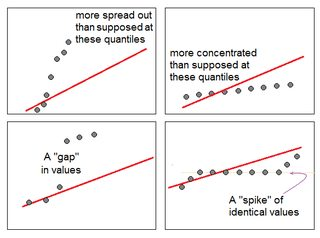

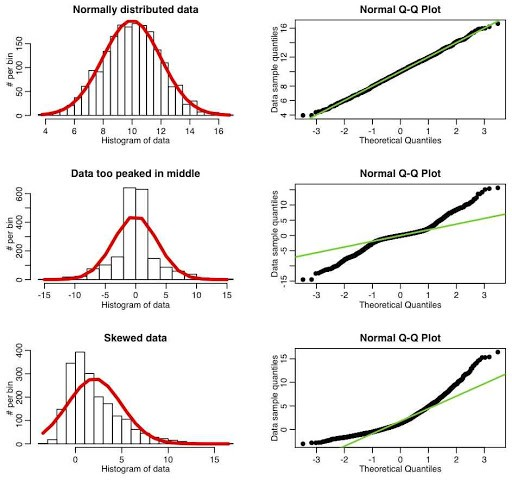

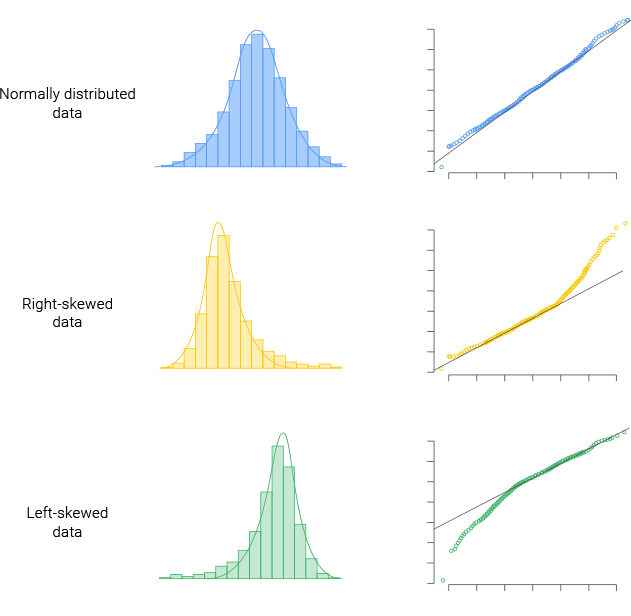

**(e) Utilisez les symboles `*` et `:` pour ajuster les modèles de régression linéaire avec des effets d'interaction. Certaines interactions semblent-elles statistiquement significatives ?**

In [167]:
formula = 'mpg ~ ' + " + ".join(df_car.columns[1:-1]) + " + "

In [168]:
formula

'mpg ~ cylinders + displacement + horsepower + weight + acceleration + year + origin + '

In [169]:
from itertools import combinations

In [170]:
interactions = ' + '.join([comb[0] + ' * ' + comb[1] for comb in combinations(df_car.columns[1:-1], 2)])

In [171]:
formula += interactions
formula

'mpg ~ cylinders + displacement + horsepower + weight + acceleration + year + origin + cylinders * displacement + cylinders * horsepower + cylinders * weight + cylinders * acceleration + cylinders * year + cylinders * origin + displacement * horsepower + displacement * weight + displacement * acceleration + displacement * year + displacement * origin + horsepower * weight + horsepower * acceleration + horsepower * year + horsepower * origin + weight * acceleration + weight * year + weight * origin + acceleration * year + acceleration * origin + year * origin'

In [172]:
res = smf.ols(formula, data=df_car).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     104.2
Date:                Thu, 02 Jun 2022   Prob (F-statistic):          4.01e-155
Time:                        16:08:48   Log-Likelihood:                -929.72
No. Observations:                 392   AIC:                             1917.
Df Residuals:                     363   BIC:                             2033.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    35.4789     53.136      0.668      0.505     -69.014     139.972
cylinders                     6.9886      8.248      0.847      0.397      -9.231      23.208
displacement                 -0.4785      0.189     -2.527      0.012      -0.851      -0.106
horsepower                    0.5034      0.347      1.451      0.148      -0.179       1.186
weight                        0.0041      0.018      0.235      0.814      -0.030       0.039
acceleration                 -5.8592      2.174     -2.696      0.007     -10.134      -1.585
year                          0.6974      0.610      1.144      0.253      -0.501       1.896
origin                      -20.8956      7.097     -2.944      0.003     -34.852      -6.939
cylinders:displacement       -0.0034      0.006     -0.524      0.601      -0.016       0.009
cylinders:horsepower          0.0116      0.024      0.480      0.632      -0.036       0.059
cylinders:weight              0.0004      0.001      0.399      0.690      -0.001       0.002
cylinders:acceleration        0.2779      0.166      1.670      0.096      -0.049       0.605
cylinders:year               -0.1741      0.097     -1.793      0.074      -0.365       0.017
cylinders:origin              0.4022      0.493      0.816      0.415      -0.567       1.371
displacement:horsepower   -8.491e-05      0.000     -0.294      0.769      -0.001       0.000
displacement:weight        2.472e-05   1.47e-05      1.682      0.093   -4.18e-06    5.36e-05
displacement:acceleration    -0.0035      0.003     -1.041      0.299      -0.010       0.003
displacement:year             0.0059      0.002      2.482      0.014       0.001       0.011
displacement:origin           0.0240      0.019      1.232      0.219      -0.014       0.062
horsepower:weight         -1.968e-05   2.92e-05     -0.673      0.501   -7.72e-05    3.78e-05
horsepower:acceleration      -0.0072      0.004     -1.939      0.053      -0.015       0.000
horsepower:year              -0.0058      0.004     -1.482      0.139      -0.014       0.002
horsepower:origin             0.0022      0.029      0.076      0.939      -0.055       0.060
weight:acceleration           0.0002      0.000      1.025      0.306      -0.000       0.001
weight:year                  -0.0002      0.000     -1.056      0.292      -0.001       0.000
weight:origin                -0.0006      0.002     -0.364      0.716      -0.004       0.003
acceleration:year             0.0556      0.026      2.174      0.030       0.005       0.106
acceleration:origin           0.4583      0.157      2.926      0.004       0.150       0.766
year:origin                   0.1393      0.074      1.882      0.061      -0.006       0.285
===========================================================================

les combinaisons statistiquement significatives qui ont un effet sur le modèle sont :

**acceleration * origin**

**acceleration * year**

**displacement * year**

In [173]:
res1 = smf.ols('mpg ~ ' + " + ".join(df_car.columns[1:-1]) + " + "+'acceleration * origin', data=df_car).fit()
res2 = smf.ols('mpg ~ acceleration * year', data=df_car).fit()
res3 = smf.ols('mpg ~ displacement * year', data=df_car).fit()
res4 = smf.ols('mpg ~ horsepower * acceleration', data=df_car).fit()

In [174]:
res4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     275.9
Date:                Thu, 02 Jun 2022   Prob (F-statistic):           7.65e-96
Time:                        16:08:50   Log-Likelihood:                -1137.3
No. Observations:                 392   AIC:                             2283.
Df Residuals:                     388   BIC:                             2299.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  33.5124      3.420      9.798      0.000      26.788      40.237
horsepower                  0.0176      0.027      0.641      0.522      -0.036       0.072
acceleration                0.8003      0.212      3.777      0.000       0.384       1.217
horsepower:acceleration    -0.0157      0.002     -7.838      0.000      -0.020      -0.012
==============================================================================
Omnibus:                       15.379   Durbin-Watson:                   1.062
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.778
Skew:                           0.397   Prob(JB):                     0.000138
Kurtosis:                       3.676   Cond. No.                     2.46e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.46e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**f) Essayez quelques transformations différentes des variables, telles que log(X), √X, X^2. Commentez vos découvertes.**

In [176]:
formula += ' + np.power(displacement, 2)'
results = smf.ols(formula, data=df_car).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     100.4
Date:                Thu, 02 Jun 2022   Prob (F-statistic):          3.99e-154
Time:                        16:09:40   Log-Likelihood:                -929.68
No. Observations:                 392   AIC:                             1919.
Df Residuals:                     362   BIC:                             2039.
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    34.4972     53.333      0.647      0.518     -70.385     139.379
cylinders                     7.4456      8.437      0.882      0.378      -9.147      24.038
displacement                 -0.4852      0.191     -2.537      0.012      -0.861      -0.109
horsepower                    0.4980      0.348      1.431      0.153      -0.186       1.182
weight                        0.0044      0.018      0.247      0.805      -0.030       0.039
acceleration                 -5.8498      2.177     -2.687      0.008     -10.130      -1.569
year                          0.6998      0.611      1.146      0.252      -0.501       1.900
origin                      -20.6750      7.155     -2.890      0.004     -34.746      -6.604
cylinders:displacement       -0.0054      0.010     -0.542      0.588      -0.025       0.014
cylinders:horsepower          0.0130      0.025      0.523      0.601      -0.036       0.062
cylinders:weight              0.0005      0.001      0.476      0.634      -0.002       0.002
cylinders:acceleration        0.2675      0.171      1.562      0.119      -0.069       0.604
cylinders:year               -0.1784      0.099     -1.809      0.071      -0.372       0.016
cylinders:origin              0.3362      0.553      0.608      0.543      -0.751       1.423
displacement:horsepower      -0.0001      0.000     -0.393      0.695      -0.001       0.001
displacement:weight        2.115e-05      2e-05      1.059      0.290   -1.81e-05    6.04e-05
displacement:acceleration    -0.0032      0.003     -0.925      0.355      -0.010       0.004
displacement:year             0.0060      0.002      2.489      0.013       0.001       0.011
displacement:origin           0.0262      0.021      1.237      0.217      -0.015       0.068
horsepower:weight         -1.672e-05   3.13e-05     -0.534      0.594   -7.84e-05    4.49e-05
horsepower:acceleration      -0.0074      0.004     -1.946      0.052      -0.015    8.04e-05
horsepower:year              -0.0058      0.004     -1.467      0.143      -0.014       0.002
horsepower:origin             0.0018      0.029      0.063      0.950      -0.056       0.060
weight:acceleration           0.0002      0.000      0.995      0.320      -0.000       0.001
weight:year                  -0.0002      0.000     -1.067      0.287      -0.001       0.000
weight:origin                -0.0007      0.002     -0.421      0.674      -0.004       0.003
acceleration:year             0.0560      0.026      2.183      0.030       0.006       0.106
acceleration:origin           0.4617      0.157      2.934      0.004       0.152       0.771
year:origin                   0.1399      0.074      1.887      0.060      -0.006       0.286
np.power(displacement, 2)  4.751e-05      0.000      0.264      0.792      

In [178]:
# Beaucoup de multicolinearités
results = smf.ols('mpg ~ displacement + origin + np.power(displacement, 2)', data=df_car).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.689
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     286.4
Date:                Thu, 02 Jun 2022   Prob (F-statistic):           5.60e-98
Time:                        16:10:38   Log-Likelihood:                -1132.4
No. Observations:                 392   AIC:                             2273.
Df Residuals:                     388   BIC:                             2289.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    41.6665      1.757     23.717      0.000      38.212      45.121
displacement                 -0.1361      0.013    -10.466      0.000      -0.162      -0.111
origin                        0.1034      0.381      0.271      0.786      -0.646       0.853
np.power(displacement, 2)     0.0002    2.6e-05      6.383      0.000       0.000       0.000
==============================================================================
Omnibus:                       42.993   Durbin-Watson:                   0.941
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              104.317
Skew:                           0.551   Prob(JB):                     2.23e-23
Kurtosis:                       5.274   Cond. No.                     5.59e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.59e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Multicolinearity :</br>
https://stackoverflow.com/questions/25676145/capturing-high-multi-collinearity-in-statsmodels</br>
https://www.econometrics-with-r.org/6-4-ols-assumptions-in-multiple-regression.html</br>
https://www.xlstat.com/fr/solutions/fonctionnalites/statistiques-de-multicolinearite

In [180]:
# sqrt df horsepower a un plus grand R2 que horsepower seul
# r-squared (mpg ~ horsepower)          = 0.606
# r-squared (mpg ~ np.sqrt(horsepower)) = 0.644

results = smf.ols('mpg ~ np.sqrt(horsepower)', data=df_car).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     704.6
Date:                Thu, 02 Jun 2022   Prob (F-statistic):           2.02e-89
Time:                        17:16:49   Log-Likelihood:                -1158.9
No. Observations:                 392   AIC:                             2322.
Df Residuals:                     390   BIC:                             2330.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              58.7052      1.349     43.516      0.000      56.053      61.358
np.sqrt(horsepower)    -3.5035      0.132    -26.544      0.000      -3.763      -3.244
==============================================================================
Omnibus:                       12.446   Durbin-Watson:                   0.968
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               13.121
Skew:                           0.384   Prob(JB):                      0.00142
Kurtosis:                       3.463   Cond. No.                         59.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

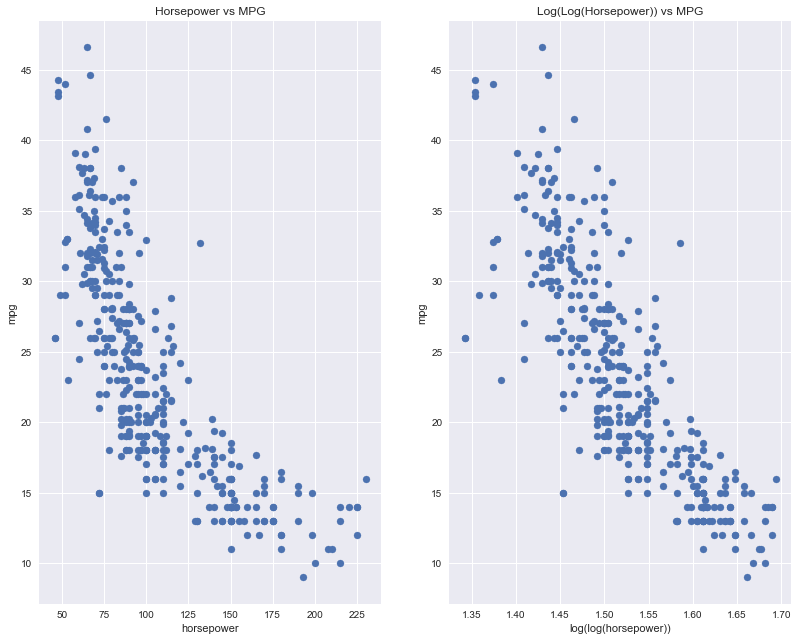

In [188]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,10))
ax1.scatter(df_car['horsepower'], df_car['mpg'])
ax1.set_title("Horsepower vs MPG")
ax1.set_xlabel('horsepower')
ax1.set_ylabel('mpg')

ax2.scatter(np.log(np.log(df_car['horsepower'])), df_car['mpg'])
ax2.set_title("Log(Log(Horsepower)) vs MPG")
ax2.set_xlabel('log(log(horsepower))')
ax2.set_ylabel('mpg');

In [8]:
# R-squared increases a bit more with log-log-horsepower
results = smf.ols('mpg ~ np.log(np.log((horsepower)))', data=df_car).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.674
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     805.5
Date:                Fri, 03 Jun 2022   Prob (F-statistic):           6.67e-97
Time:                        12:05:46   Log-Likelihood:                -1141.6
No. Observations:                 392   AIC:                             2287.
Df Residuals:                     390   BIC:                             2295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                      154.6842      4.629     33.413      0.000     145.582     163.786
np.log(np.log((horsepower)))   -86.3031      3.041    -28.382      0.000     -92.281     -80.325
==============================================================================
Omnibus:                       13.057   Durbin-Watson:                   1.061
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               20.364
Skew:                           0.233   Prob(JB):                     3.78e-05
Kurtosis:                       4.014   Cond. No.                         44.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [70]:
plt.style.use('fivethirtyeight')

In [72]:
df_car['log(horsepower)'] = df_car['horsepower'].apply(lambda x: np.log(x))
df_car['log(log(horsepower))'] = df_car['horsepower'].apply(lambda x: np.log(np.log(x)))

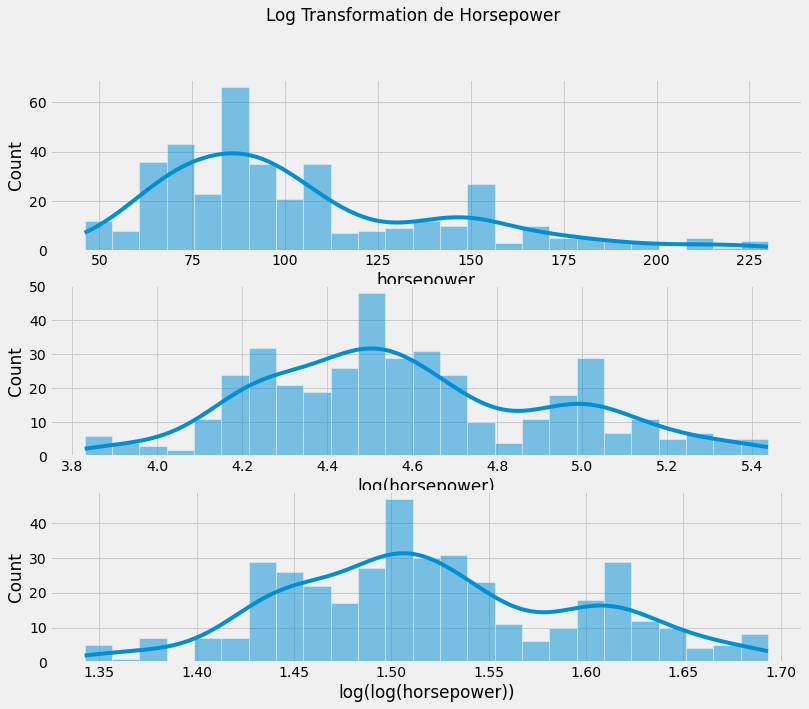

In [73]:
fig, axs = plt.subplots(3)
fig.suptitle('Log Transformation de Horsepower')
sns.histplot(data = df_car, x = df_car['horsepower'], bins = 25, kde=True, ax = axs[0])
sns.histplot(data = df_car, x = df_car['log(horsepower)'], bins = 25, kde=True, ax = axs[1])
sns.histplot(data = df_car, x = df_car['log(log(horsepower))'], bins = 25, kde=True, ax = axs[2]);

### Exercice 10

**(a) Ajustez un modèle de régression multiple pour prédire les ventes en utilisant `Price`, `Urban` et `US`.**

**(b) Donnez une interprétation de chaque coefficient du modèle. Attention, certaines variables du modèle sont qualitatives !**

**(c) Écrivez le modèle sous forme d'équation, en prenant soin de manipuler correctement les variables qualitatives.**

**(d) Pour lequel des prédicteurs pouvez-vous rejeter l'hypothèse nulle H0 : βj = 0 ?**

**(e) Sur la base de votre réponse à la question précédente, ajustez un modèle plus petit qui n'utilise que les prédicteurs pour lesquels il existe des preuves d'association avec le résultat.**

**(f) Dans quelle mesure les modèles en (a) et (e) correspondent-ils aux données ?**

**(g) En utilisant le modèle de (e), obtenez des intervalles de confiance à 95 % pour le(s) coefficient(s).**

**(h) Existe-t-il des preuves de valeurs aberrantes ou d'observations à fort effet de levier dans le modèle de (e)**

**(a) Ajustez un modèle de régression multiple pour prédire les ventes en utilisant `Price`, `Urban` et `US`.**

In [37]:
carseats = pd.read_csv('carseats.csv')
carseats.head()

Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0   9.50        138      73           11         276    120       Bad   42   
1  11.22        111      48           16         260     83      Good   65   
2  10.06        113      35           10         269     80    Medium   59   
3   7.40        117     100            4         466     97    Medium   55   
4   4.15        141      64            3         340    128       Bad   38   

   Education Urban   US  
0         17   Yes  Yes  
1         10   Yes  Yes  
2         12   Yes  Yes  
3         14   Yes  Yes  
4         13   Yes   No

In [6]:
predictors = ['Price', 'Urban', 'US']

In [7]:
results = smf.ols('Sales ~ Price + Urban + US', data=carseats).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Fri, 03 Jun 2022   Prob (F-statistic):           2.39e-23
Time:                        13:05:17   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       13.0435      0.651     20.036      0.000      11.764      14.323
Urban[T.Yes]    -0.0219      0.272     -0.081      0.936      -0.556       0.512
US[T.Yes]        1.2006      0.259      4.635      0.000       0.691       1.710
Price           -0.0545      0.005    -10.389      0.000      -0.065      -0.044
==============================================================================
Omnibus:                        0.676   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.713   Jarque-Bera (JB):                0.758
Skew:                           0.093   Prob(JB):                        0.684
Kurtosis:                       2.897   Cond. No.                         628.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**(b) Donnez une interprétation de chaque coefficient du modèle. Attention, certaines variables du modèle sont qualitatives !**

`Sales` : Unité vendue (en millier)

1000 unités de vente = 13043 unités - 0.0219 * (1 client en ville) + 1.2006 * (1 client US) - 0.0545 (1$)

Intercept représente le nombre de sièges d'auto vendus en moyenne lorsque tous les autres prédicteurs sont ignorés

On voit que seulement `US` et `Price` sont significatif (p < 0.05)

Il n'y a pas de différence si quelqu'un vit en ville ou pas.

Vivre aux US augmente de 1.2 fois les ventes, ce qui reprénte une augmentation moyenne des ventes de sièges d'auto de 1200 unités.

le coefficient de `Price` est négatif et les ventes chuteront donc d'environ 54 sièges (0,054 x 1 000) pour chaque unité (1$) d'augmentation du prix.

**(c) Écrivez le modèle sous forme d'équation, en prenant soin de manipuler correctement les variables qualitatives.**

In [56]:
df = carseats[predictors]
df = pd.concat((df, carseats.Sales), axis = 1)
df.Urban = df.Urban.map({'Yes' : 1, 'No' : 0})
df.US = df.US.map({'Yes' : 1, 'No' : 0})
df.head()

Price  Urban  US  Sales
0    120      1   1   9.50
1     83      1   1  11.22
2     80      1   1  10.06
3     97      1   1   7.40
4    128      1   0   4.15

In [24]:
df_1 = df[df.US == 1]
df_0 = df[df.US == 0]

In [26]:
smf.ols('Sales ~ Price', data=df_0).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.280
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     54.43
Date:                Fri, 03 Jun 2022   Prob (F-statistic):           1.30e-11
Time:                        13:22:18   Log-Likelihood:                -313.49
No. Observations:                 142   AIC:                             631.0
Df Residuals:                     140   BIC:                             636.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.9748      0.854     15.187      0.000      11.286      14.664
Price         -0.0540      0.007     -7.378      0.000      -0.068      -0.040
==============================================================================
Omnibus:                        2.542   Durbin-Watson:                   2.138
Prob(Omnibus):                  0.281   Jarque-Bera (JB):                2.054
Skew:                           0.263   Prob(JB):                        0.358
Kurtosis:                       3.266   Cond. No.                         536.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
smf.ols('Sales ~ Price', data=df_1).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.185
Model:                            OLS   Adj. R-squared:                  0.182
Method:                 Least Squares   F-statistic:                     58.24
Date:                Fri, 03 Jun 2022   Prob (F-statistic):           4.59e-13
Time:                        13:22:36   Log-Likelihood:                -611.80
No. Observations:                 258   AIC:                             1228.
Df Residuals:                     256   BIC:                             1235.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     14.2706      0.855     16.698      0.000      12.588      15.954
Price         -0.0548      0.007     -7.631      0.000      -0.069      -0.041
==============================================================================
Omnibus:                        0.888   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.641   Jarque-Bera (JB):                0.938
Skew:                           0.034   Prob(JB):                        0.626
Kurtosis:                       2.712   Cond. No.                         628.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

`Sales` = **13.04** - **0.05**`Price`- **0.05**`Urban(Yes : 1, No : 0)` + **1.20**`US(Yes : 1, No : 0)`

aux US : `Sales` = **14.24** - **0.05**`Price`
    
en dehors des US : `Sales` = **13.04** - **0.05**`Price`

**(d) Pour lequel des prédicteurs pouvez-vous rejeter l'hypothèse nulle $H_0 : β_j = 0$ ?**

On peut rejeter l'hypothèse nulle pour `Price` et `US` car p-value < 0.05

Si nous prenons le dataset en entier :

In [31]:
carseats.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [34]:
res = smf.ols(f"Sales ~ {' + '.join(carseats.columns[1:])}", data=carseats).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     243.4
Date:                Fri, 03 Jun 2022   Prob (F-statistic):          1.60e-166
Time:                        14:13:59   Log-Likelihood:                -568.99
No. Observations:                 400   AIC:                             1162.
Df Residuals:                     388   BIC:                             1210.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               5.6606      0.603      9.380      0.000       4.474       6.847
ShelveLoc[T.Good]       4.8502      0.153     31.678      0.000       4.549       5.151
ShelveLoc[T.Medium]     1.9567      0.126     15.516      0.000       1.709       2.205
Urban[T.Yes]            0.1229      0.113      1.088      0.277      -0.099       0.345
US[T.Yes]              -0.1841      0.150     -1.229      0.220      -0.479       0.111
CompPrice               0.0928      0.004     22.378      0.000       0.085       0.101
Income                  0.0158      0.002      8.565      0.000       0.012       0.019
Advertising             0.1231      0.011     11.066      0.000       0.101       0.145
Population              0.0002      0.000      0.561      0.575      -0.001       0.001
Price                  -0.0954      0.003    -35.700      0.000      -0.101      -0.090
Age                    -0.0460      0.003    -14.472      0.000      -0.052      -0.040
Education              -0.0211      0.020     -1.070      0.285      -0.060       0.018
==============================================================================
Omnibus:                        0.811   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.667   Jarque-Bera (JB):                0.765
Skew:                           0.107   Prob(JB):                        0.682
Kurtosis:                       2.994   Cond. No.                     4.15e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.15e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

On peut rejeter l'hypothèse nulle pour `CompPrice`, `Income`, `Advertising`, `Price`, `ShelvelocGood`, `ShelvelocMedium` et `Age`.

**(e) Sur la base de votre réponse à la question précédente, ajustez un modèle plus petit qui n'utilise que les prédicteurs pour lesquels il existe des preuves d'association avec le résultat.**

In [41]:
new_model = ['CompPrice', 'Income', 'Advertising', 'Price', 'ShelveLoc', 'Age']
c = carseats[new_model]
res = smf.ols(f"Sales ~ {(' + ').join(new_model)}", data = carseats).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     381.4
Date:                Fri, 03 Jun 2022   Prob (F-statistic):          1.25e-170
Time:                        14:27:06   Log-Likelihood:                -571.24
No. Observations:                 400   AIC:                             1158.
Df Residuals:                     392   BIC:                             1190.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               5.4752      0.505     10.842      0.000       4.482       6.468
ShelveLoc[T.Good]       4.8357      0.152     31.710      0.000       4.536       5.135
ShelveLoc[T.Medium]     1.9520      0.125     15.569      0.000       1.706       2.198
CompPrice               0.0926      0.004     22.451      0.000       0.084       0.101
Income                  0.0158      0.002      8.590      0.000       0.012       0.019
Advertising             0.1159      0.008     15.006      0.000       0.101       0.131
Price                  -0.0953      0.003    -35.699      0.000      -0.101      -0.090
Age                    -0.0461      0.003    -14.521      0.000      -0.052      -0.040
==============================================================================
Omnibus:                        0.766   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.682   Jarque-Bera (JB):                0.810
Skew:                           0.104   Prob(JB):                        0.667
Kurtosis:                       2.929   Cond. No.                     1.91e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.91e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**(f) Dans quelle mesure les modèles en (a) et (e) correspondent-ils aux données ?**

Calcul de RSE pour les 2 modèles

In [42]:
def RSE(df, y, y_pred):
    RSS = np.sum((y - y_pred)**2)
    RSE = np.sqrt((1 / (len(df) - 2)) * RSS)
    return RSE

In [43]:
res.fittedvalues

0       7.301699
1      12.288705
2       9.252263
3       8.517239
4       5.932080
         ...    
395    13.037864
396     7.030129
397     7.224232
398     5.429033
399     9.600999
Length: 400, dtype: float64

In [53]:
y = carseats['Sales']
y_pred = res.fittedvalues
y_pred_ = results.fittedvalues

print(RSE(carseats, y, y_pred)) # (e)
print(RSE(carseats, y, y_pred_)) # (a)

1.0117238150678147
2.466272323648211


Comparons les 2 méthodes : Sklearn et Statsmodels pour le calcul des résidus

In [60]:
from sklearn.linear_model import LinearRegression

n_df = df.copy()
n_df.drop(['Sales'], axis = 1, inplace = True)
lr = LinearRegression()
modl = lr.fit(n_df, y)

In [64]:
print(modl.predict(n_df)[:20])
print(y_pred_[:20])

[ 7.68706358  9.702041    9.86541755  8.93961711  6.05082009 10.32300449
  7.13999707  7.68706358  6.29057164  7.49114434  8.79815672  9.10299366
  5.6151493   9.53866445  7.79598128  5.20139466  7.03107938  7.08801624
 10.54083989  7.63260473]
0      7.687064
1      9.702041
2      9.865418
3      8.939617
4      6.050820
5     10.323004
6      7.139997
7      7.687064
8      6.290572
9      7.491144
10     8.798157
11     9.102994
12     5.615149
13     9.538664
14     7.795981
15     5.201395
16     7.031079
17     7.088016
18    10.540840
19     7.632605
dtype: float64


**RSE** du modèle (a) : 2.46</br>
**RSE** du modèle (e) : 1.01
    
On voit que **RSE** du modèle (e) est plus faible que celui du modèle (a) : le modèle (e) s'ajuste mieux aux données

$R^2$ du modèle (a) est : 0.872</br>
$R^2$ du modèle (e) est 0.239
    
On voit que la qualité de prédiction du modèle (e) est largement supérieur à celui de (a) : on en conclut que les predicteurs du modèle (e) permettent de prédire les données de `Sales` 

**F-stat** de (a) est : 41.52</br>
**F-stat** de (e) est : 381.4   

le **F-stat** de (e) indique qu'il y a un meilleur ajustement de la droite de regression

**(g) En utilisant le modèle de (e), obtenez des intervalles de confiance à 95 % pour le(s) coefficient(s).**

In [66]:
res.conf_int()

0         1
Intercept            4.482368  6.468084
ShelveLoc[T.Good]    4.535857  5.135492
ShelveLoc[T.Medium]  1.705501  2.198484
CompPrice            0.084465  0.100678
Income               0.012172  0.019398
Advertising          0.100719  0.131088
Price               -0.100568 -0.090069
Age                 -0.052373 -0.039882

**(h) Existe-t-il des preuves de valeurs aberrantes ou d'observations à fort effet de levier dans le modèle de (e)**

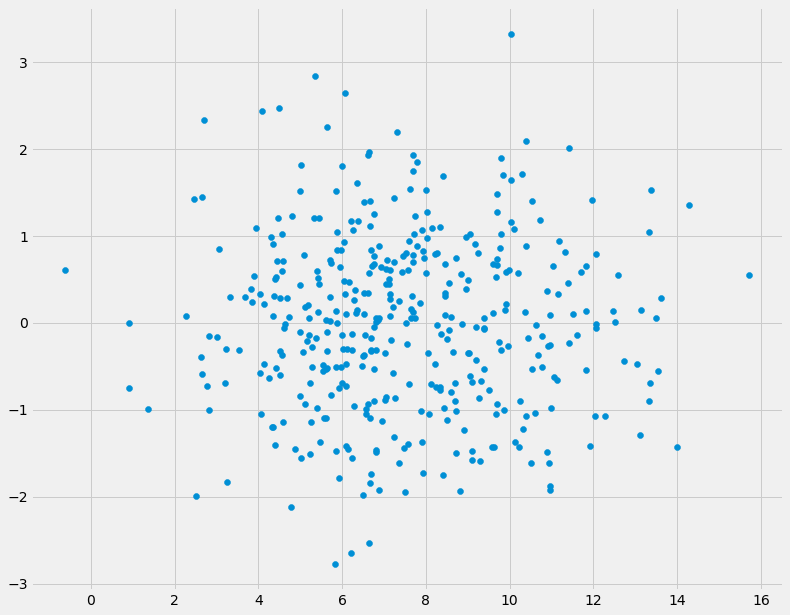

In [74]:
plt.scatter(res.fittedvalues, res.resid)

In [77]:
results_influence = OLSInfluence(res)

Text(0, 0.5, 'influence')

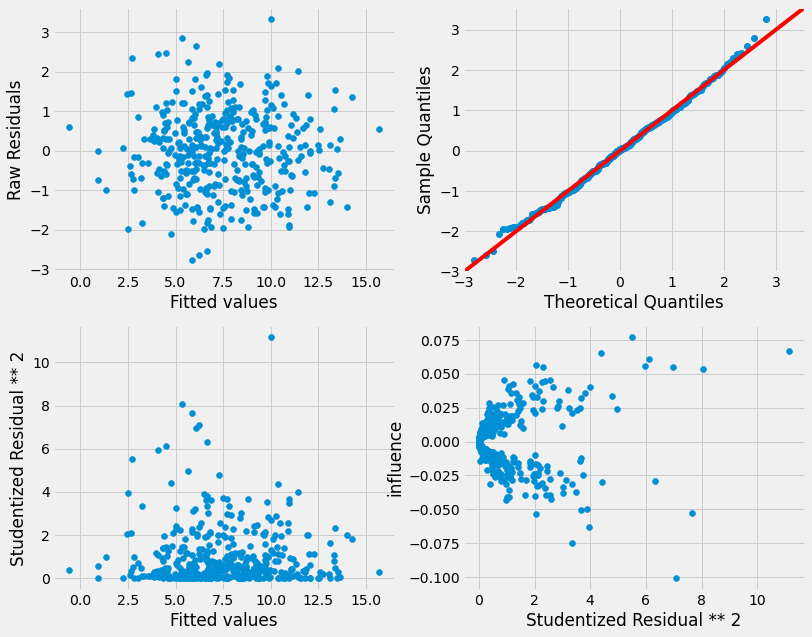

In [87]:
fig, ax = plt.subplots(2, 2, figsize=(12,10))
ax[0, 0].scatter(res.fittedvalues, res.resid)
ax[0, 0].set_xlabel("Fitted values")
ax[0, 0].set_ylabel("Raw Residuals")
ax[1, 0].scatter(res.fittedvalues, results_influence.resid_studentized_external ** 2)
ax[1, 0].set_xlabel("Fitted values")
ax[1, 0].set_ylabel("Studentized Residual ** 2")
sm.graphics.qqplot(res.resid / np.sqrt((res.resid ** 2).sum() / 390), line='45', ax=ax[0, 1])
ax[1, 1].scatter(results_influence.resid_studentized_external ** 2, results_influence.influence)
ax[1, 1].set_xlabel('Studentized Residual ** 2')
ax[1, 1].set_ylabel('influence')

In [140]:
def r_plot(model, target, dataset):
    
    plt.style.use('seaborn')
    from statsmodels.graphics.gofplots import ProbPlot
    
    model_fitted_y = model.fittedvalues
    model_residuals = model.resid
    model_norm_residuals = model.get_influence().resid_studentized_internal
    model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))
    model_abs_resid = np.abs(model_residuals)
    model_leverage = model.get_influence().hat_matrix_diag
    model_cooks = model.get_influence().cooks_distance[0]
    
    
    fig, axes = plt.subplots(2, 2, figsize=(14,12))
    
    
    
    
    sns.residplot(x=model_fitted_y, y='Sales', data=carseats,
                lowess=True,
                scatter_kws={'alpha': 0.5},
                line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8},
                ax = axes[0, 0])

    axes[0, 0].set_title('Residuals vs Fitted')
    axes[0, 0].set_xlabel('Fitted values')
    axes[0, 0].set_ylabel('Residuals')


    # annotations
    abs_resid = model_abs_resid.sort_values(ascending=False)
    abs_resid_top_5 = abs_resid[:5]

    for i in abs_resid_top_5.index:
        axes[0, 0].annotate(i, 
                            xy=(model_fitted_y[i], 
                            model_residuals[i]))
        
        
        
        
        
    QQ = ProbPlot(model_norm_residuals)
    plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, lw=1, ax=axes[0,1])
    
    axes[0,1].set_title('Normal Q-Q')
    axes[0,1].set_xlabel('Theoretical Quantiles')
    axes[0,1].set_ylabel('Standardized Residuals');

    # annotations
    abs_norm_resid = np.flip(np.argsort(np.abs(model_norm_residuals)), 0)
    abs_norm_resid_top_5 = abs_norm_resid[:5]
    
    for r, i in enumerate(abs_norm_resid_top_5):
        axes[0,1].annotate(i, 
                        xy=(np.flip(QQ.theoretical_quantiles, 0)[r],
                        abs(model_norm_residuals[i])))
        
        
        
        
    axes[1,0].scatter(model_fitted_y, model_norm_residuals_abs_sqrt, alpha=0.5)
    sns.regplot(x=model_fitted_y, y=model_norm_residuals_abs_sqrt, 
            scatter=False, 
            ci=False, 
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8},
            ax=axes[1,0])

    axes[1,0].set_title('Scale-Location')
    axes[1,0].set_xlabel('Fitted values')
    axes[1,0].set_ylabel('$\sqrt{|Standardized Residuals|}$');

    # annotations
    abs_sq_norm_resid = np.flip(np.argsort(model_norm_residuals_abs_sqrt), 0)
    abs_sq_norm_resid_top_5 = abs_sq_norm_resid[:5]

    for i in abs_norm_resid_top_5:
        axes[1,0].annotate(i, 
                        xy=(model_fitted_y[i], 
                        model_norm_residuals_abs_sqrt[i]))
        
        
        
        
    axes[1,1].scatter(model_leverage, model_norm_residuals, alpha=0.5)
    sns.regplot(x = model_leverage, y = model_norm_residuals, 
            scatter=False, 
            ci=False, 
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8},
            ax=axes[1,1])

    axes[1,1].set_xlim(0, 0.20)
    axes[1,1].set_ylim(-3, 5)
    axes[1,1].set_title('Residuals vs Leverage')
    axes[1,1].set_xlabel('Leverage')
    axes[1,1].set_ylabel('Standardized Residuals')

    # annotations
    leverage_top_5 = np.flip(np.argsort(model_cooks), 0)[:5]

    for i in leverage_top_5:
        axes[1,1].annotate(i, 
                          xy=(model_leverage[i], 
                          model_norm_residuals[i]))

    # shenanigans for cook's distance contours
    def graph(formula, x_range, label=None):
        x = x_range
        y = formula(x)
        plt.plot(x, y, label=label, lw=1, ls='--', color='red')

    p = len(model.params) # number of model parameters

    graph(lambda x: np.sqrt((0.5 * p * (1 - x)) / x), 
          np.linspace(0.001, 0.200, 50), 
          'Cook\'s distance') # 0.5 line

    graph(lambda x: np.sqrt((1 * p * (1 - x)) / x), 
          np.linspace(0.001, 0.200, 50)) # 1 line

    plt.legend(loc='upper right');

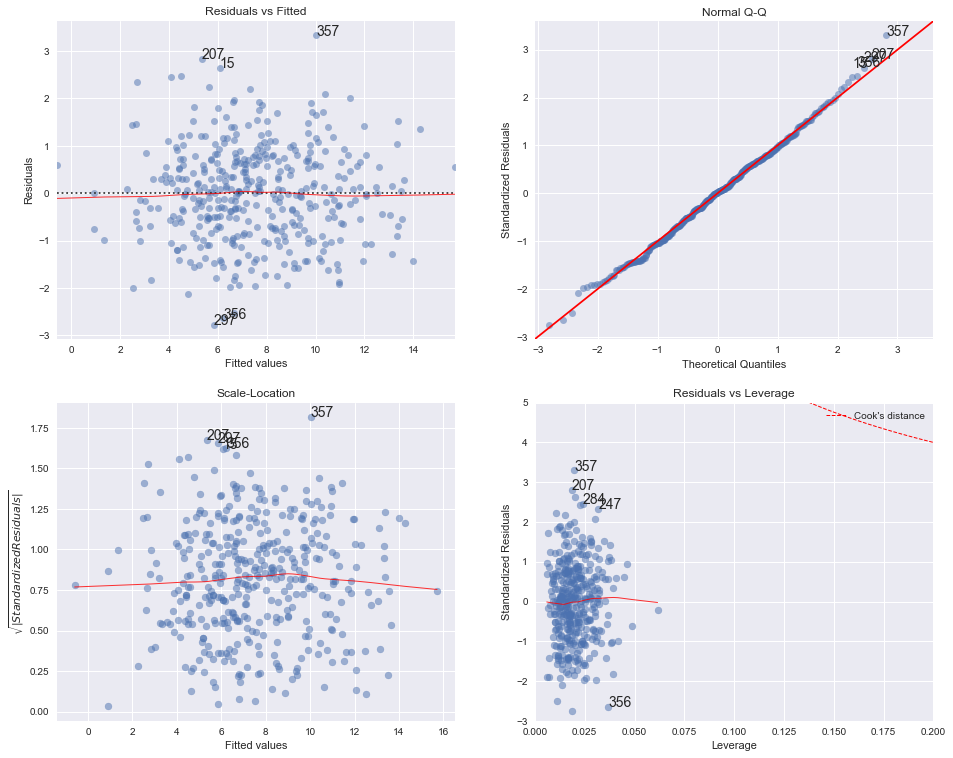

In [141]:
r_plot(res, 'Sales', carseats)

Le graphique de **Residuals Vs Fitted values** n'affiche aucune forme distincte, de sorte que le modèle semble bien s'ajuster aux données.

Il semble y avoir des **outliers**. On peut vérifier comme précédemment en utilisant des résidus studentisés. L'**observation 357** apparaît comme une valeur aberrante.

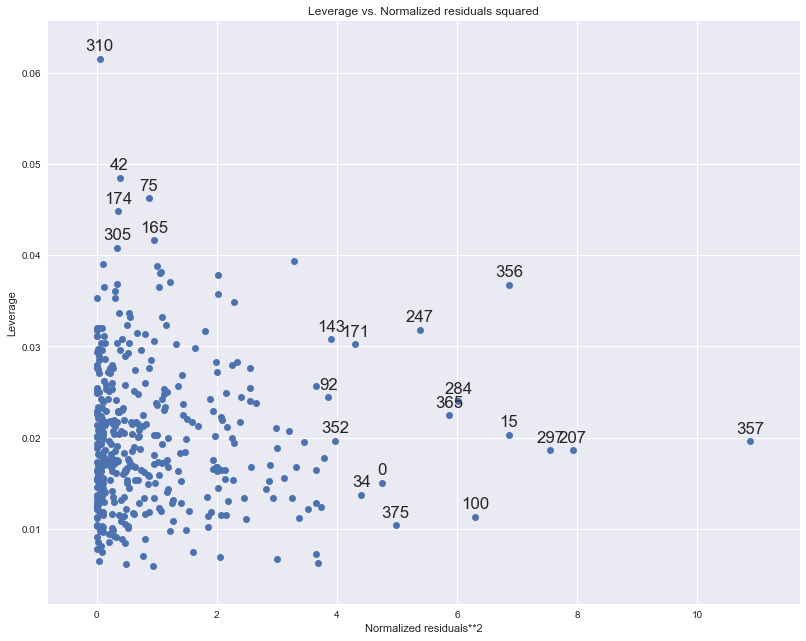

In [154]:
fig, ax = plt.subplots(figsize=(12,10))
fig = plot_leverage_resid2(res, ax = ax)

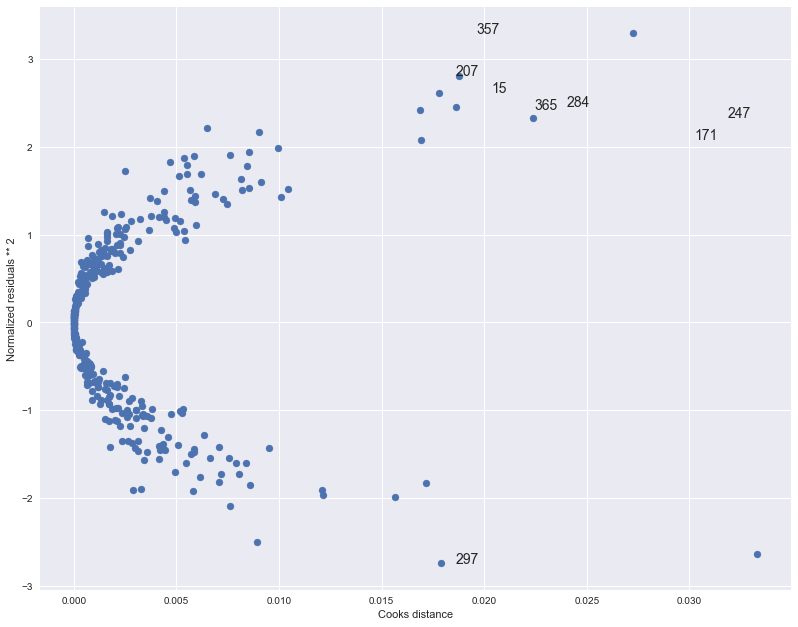

In [161]:
model_norm_residuals = res.get_influence().resid_studentized_internal
model_leverage = res.get_influence().hat_matrix_diag
model_cooks = res.get_influence().cooks_distance[0]

leverage_top_10 = np.flip(np.argsort(model_cooks), 0)[:10]

for i in leverage_top_10:
    plt.annotate(i, xy=(model_leverage[i], model_norm_residuals[i]))

plt.scatter(model_cooks, model_norm_residuals)
plt.xlabel('Cooks distance')
plt.ylabel('Normalized residuals ** 2');

In [115]:
from statsmodels.graphics.gofplots import ProbPlot
model_norm_residuals = res.get_influence().resid_studentized_internal
abs_norm_resid_top_5 = np.flip(np.argsort(np.abs(model_norm_residuals)), 0)[:5]
abs_norm_resid_top_5

array([357, 207, 297, 356,  15], dtype=int64)

297 et 356 sont mal positionnés sur le graph qq-plot

### Exercice 11

**Dans ce problème, nous étudierons la statistique t pour l'hypothèse nulle H0 : β = 0 dans une régression linéaire simple sans ordonnée à l'origine. Pour commencer, nous générons un prédicteur x et une réponse y comme suit.**

In [4]:
np.random.seed(1)
x = np.random.randn(100)
y = 2 * x + np.random.randn(100)

**(a) Effectuez une régression linéaire simple de** $y$ **sur** $x$ **, sans intercept. Indiquez l'estimation du coefficient **$ \hat \beta $ **, l'erreur type de cette estimation du coefficient, ainsi que la statistique t et la valeur p associées à l'hypothèse nulle H0 : β = 0. Commentez ces résultats. (Vous pouvez effectuer une régression sans interception à l'aide de la commande lm(y∼x+0).**

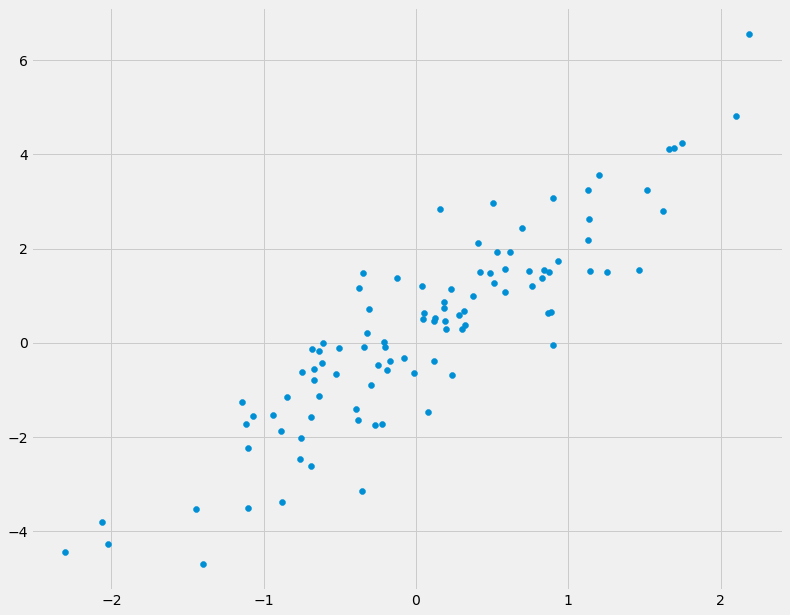

In [8]:
plt.scatter(x, y)

Pas de constante et predicteur hautement significatif : on peut rejeter l'hypothèse nulle

In [9]:
results = sm.OLS(y, x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.798
Model:                            OLS   Adj. R-squared (uncentered):              0.796
Method:                 Least Squares   F-statistic:                              391.7
Date:                Sat, 04 Jun 2022   Prob (F-statistic):                    3.46e-36
Time:                        15:43:56   Log-Likelihood:                         -135.67
No. Observations:                 100   AIC:                                      273.3
Df Residuals:                      99   BIC:                                      275.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             2.1067      0.106     19.792      0.000       1.896       2.318
==============================================================================
Omnibus:                        0.880   Durbin-Watson:                   2.106
Prob(Omnibus):                  0.644   Jarque-Bera (JB):                0.554
Skew:                          -0.172   Prob(JB):                        0.758
Kurtosis:                       3.119   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**(b) Effectuez maintenant une régression linéaire simple de x sur y sans interception, et rapportez l'estimation du coefficient, son erreur standard et la statistique t et les valeurs p correspondantes associées à l'hypothèse nulle H0 : β = 0. Commentez sur ces résultats**

In [10]:
res = sm.OLS(x, y).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.798
Model:                            OLS   Adj. R-squared (uncentered):              0.796
Method:                 Least Squares   F-statistic:                              391.7
Date:                Sat, 04 Jun 2022   Prob (F-statistic):                    3.46e-36
Time:                        15:47:54   Log-Likelihood:                         -49.891
No. Observations:                 100   AIC:                                      101.8
Df Residuals:                      99   BIC:                                      104.4
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.3789      0.019     19.792      0.000       0.341       0.417
==============================================================================
Omnibus:                        0.476   Durbin-Watson:                   2.166
Prob(Omnibus):                  0.788   Jarque-Bera (JB):                0.631
Skew:                           0.115   Prob(JB):                        0.729
Kurtosis:                       2.685   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Estimation du coefficient = 0.39</br>
Std.Error = 0.02</br>
t-statistic = 18.73</br>
p-value < 2e-16</br>
t-statistic et p-values sont exactement les mêmes que pour $y$ sur $x$

**(c) Quelle est la relation entre les résultats obtenus en (a) et (b) ?**

Nous observons la même valeur de t-statistic, et donc les p-values pour la régression de $y$ sur $x$ et de $x$ sur $y$.</br>

La ligne de régression est exactement la même, seuls les axes étant modifiés, donc $y = 2x + e$ peut être exprimé par $x = \frac{y -e}{2}$.

**(d) Pour la régression de** $y$  **sur** $x$ **sans interception, la t-statistic pour** $H_0 : \beta = 0$ **prend la forme**: $$\frac {\hat \beta} {SE(\hat \beta)}$$ **où**:
$$\hat y_i = x_i \hat \beta$$

$$\hat \beta = \left ( \sum_{i=1}^{n}x_i y_i \right ) / \left ( \sum_{i'=1}^{n}x_{i'}^2 \right )$$ **et où** :
$$SE(\hat \beta) = \sqrt {\frac {\sum_{i=1}^{n}(y_i - x_i\hat \beta)^2}{(n-1)\sum_{j=1}^{n}x_{j}^2}}$$ .

**(Ces formules sont légèrement différentes de celles données dans les sections 3.1.1 et 3.1.2, puisque nous effectuons ici une régression sans interception.) Montrez algébriquement, et confirmez numériquement dans R, que la t-statistic peut s'écrire:**

$$\frac {(\sqrt{n - 1})\sum_{i=1}^{n}x_i y_i}{\sqrt{(\sum_{i=1}^{n}x_{i}^2)(\sum_{j=1}^{n}y_{j}^2) - (\sum_{j=1}^{n}x_j y_j)^2}}$$

Solution :
    
$\sum = \sum_{i=1}^{n}$

$$ t = \frac {\hat \beta} {SE(\hat \beta)}$$

$$ t^2 = \frac {\hat \beta^2} {SE(\hat \beta)^2}$$

$$ t^2 = \frac{\hat \beta^2}{\sum (y_i - x_i \hat \beta)^2 \space / \space (n-1)\sum (x_{i}^2)}$$

$$ t^2 = \frac{\hat \beta^2}{\sum (y_i - x_i \hat \beta)^2} (n-1)\sum (x_{i}^2)$$

$$ t^2 = \frac{(n-1)\sum (x_{i}^2) \hat \beta^2}{\sum (y_i - x_i \hat \beta)^2} $$

or:

$$\hat \beta = \left ( \sum_{i=1}^{n}x_i y_i \right ) / \left ( \sum_{i'=1}^{n}x_{i'}^2 \right )$$

$$\hat \beta^2 = \sum_{i=1}^{n}(x_i y_i)^2 / \sum_{i'=1}^{n}(x_{i'}^2)^2$$

donc :

$$ t^2 = \frac{(n-1)\sum (x_{i}^2) \sum (x_i y_i)^2 / \sum (x_{i}^2)^2}{\sum (y_i - x_i \hat \beta)^2} $$

$$ t^2 = \frac{(n-1)\sum (x_{i}^2) \sum (x_i y_i)^2  }{\sum (x_{i}^2)^2 \sum (y_i - x_i \hat \beta)^2} $$

$$ t^2 = \frac{(n-1) \left ( \sum x_i y_i \right )^2  }{ \sum x_{i}^2  \sum (y_i - x_i \hat \beta)^2} $$

$$ t^2 = \frac{(n-1) \left ( \sum x_i y_i \right )^2  }{ \sum x_{i}^2 \sum y_{i}^2 - \sum x_{i}^2 \sum 2(y_i x_i \hat \beta) + \sum x_{i}^2 \sum (x_i \hat \beta)^2} $$

on remplace $\hat \beta$ par sa valeur:

$$ \sum x_{i}^2 \sum 2(y_i x_i \hat \beta) = \sum x_{i}^2 \sum 2 \left ( \frac{\sum x_i y_i}{\sum x_{i}^2} (y_i x_i)\right ) $$

$$ \sum x_{i}^2 \sum 2(y_i x_i \hat \beta) = \frac{\sum x_{i}^2} {\sum x_{i}^2} \sum 2 \left ( \sum (x_i y_i) ( y_i x_i)\right )$$

$$ \sum x_{i}^2 \sum 2(y_i x_i \hat \beta) = 2 \sum (x_i y_i)^2 $$

et:

$$\sum x_{i}^2 \sum (x_i \hat \beta)^2 = \sum x_{i}^2 \sum x_{i}^2 \hat \beta^2 $$

$$\sum x_{i}^2 \sum (x_i \hat \beta)^2 = \sum (x_{i}^2)^2 \left ( \frac{\sum x_i y_i} {\sum x_{i}^2} \right )^2 $$

$$\sum x_{i}^2 \sum (x_i \hat \beta)^2 = \frac {\sum (x_{i}^2)^2} {\sum (x_{i}^2)^2} \sum (x_i y_i)^2 $$

$$\sum x_{i}^2 \sum (x_i \hat \beta)^2 = \sum (x_i y_i)^2 $$

on remplace dans $t^2$ :

$$ t^2 = \frac{(n-1) \left ( \sum x_i y_i \right )^2  }{ \sum x_{i}^2 \sum y_{i}^2 - 2 \sum (x_i y_i)^2 + \sum (x_i y_i)^2} $$

$$ t^2 = \frac{(n-1) \left ( \sum x_i y_i \right )^2  }{ \sum x_{i}^2 \sum y_{i}^2 - \sum (x_i y_i)^2} $$

Finalement, on obtient :

$$ t = \sqrt{\frac{(n-1) \left ( \sum x_i y_i \right )^2  }{ \sum x_{i}^2 \sum y_{i}^2 - \sum (x_i y_i)^2}} $$

$$ t = \frac {(\sqrt{n - 1})\sum_{i=1}^{n}x_i y_i}{\sqrt{(\sum_{i=1}^{n}x_{i}^2)(\sum_{j=1}^{n}y_{j}^2) - (\sum_{j=1}^{n}x_j y_j)^2}}$$

In [27]:
n = len(x)
num = np.sqrt(n - 1) * np.sum(x*y)
denom = np.sqrt((np.sum(x**2) * np.sum(y**2) - np.sum(x*y)**2))
t = num / denom
print(t)
print(res.t_test(res.params).tvalue)

19.791801987091205
[[19.79180199]]


**(e) En utilisant les résultats de (d), soutenez que la t-statistic pour la régression de y sur x est la même que la statistique t pour la régression de x sur y**

Si on remplace $x_i$ par $y_i$ on obtient les mêmes resultats

**(f) Dans R, montrez que lorsque la régression est effectuée avec une interception, la statistique t pour** $H_0 : \beta_1 = 0$ **est la même pour la régression de y sur x que pour la régression de x sur y**

In [30]:
res1 = sm.OLS(x, sm.add_constant(y)).fit()
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     391.4
Date:                Sat, 04 Jun 2022   Prob (F-statistic):           5.39e-36
Time:                        17:52:00   Log-Likelihood:                -49.289
No. Observations:                 100   AIC:                             102.6
Df Residuals:                      98   BIC:                             107.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0440      0.040     -1.090      0.279      -0.124       0.036
x1             0.3817      0.019     19.783      0.000       0.343       0.420
==============================================================================
Omnibus:                        0.456   Durbin-Watson:                   2.192
Prob(Omnibus):                  0.796   Jarque-Bera (JB):                0.611
Skew:                           0.118   Prob(JB):                        0.737
Kurtosis:                       2.698   Cond. No.                         2.12
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
res2 = sm.OLS(y, sm.add_constant(x)).fit()
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     391.4
Date:                Sat, 04 Jun 2022   Prob (F-statistic):           5.39e-36
Time:                        17:56:41   Log-Likelihood:                -134.44
No. Observations:                 100   AIC:                             272.9
Df Residuals:                      98   BIC:                             278.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1470      0.094      1.564      0.121      -0.039       0.334
x1             2.0954      0.106     19.783      0.000       1.885       2.306
==============================================================================
Omnibus:                        0.898   Durbin-Watson:                   2.157
Prob(Omnibus):                  0.638   Jarque-Bera (JB):                0.561
Skew:                          -0.172   Prob(JB):                        0.755
Kurtosis:                       3.127   Cond. No.                         1.15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
print(res1.t_test(np.eye(len(res1.params))))
print(res2.t_test(np.eye(len(res2.params))))

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0            -0.0440      0.040     -1.090      0.279      -0.124       0.036
c1             0.3817      0.019     19.783      0.000       0.343       0.420
                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             0.1470      0.094      1.564      0.121      -0.039       0.334
c1             2.0954      0.106     19.783      0.000       1.885       2.306


on voit bien que peut importe que ca soit x sur y, ou y sur x, t-stat à la même valeur : 19.783

In [52]:
import scipy.stats

t, p = scipy.stats.ttest_ind(x, y, equal_var=False)
t, p

(-0.9414837783113014, 0.3481523920609604)

In [53]:
t, p = scipy.stats.ttest_ind(y, x, equal_var=False)
t, p

(0.9414837783113014, 0.3481523920609604)

In [62]:
mean = (x.mean() + y.mean()) / 2
scipy.stats.ttest_1samp(x, mean)

Ttest_1sampResult(statistic=-1.1992688837825927, pvalue=0.2332859046007783)

In [57]:
difference = x - y

t = (np.mean(difference))/(difference.std(ddof=1)/np.sqrt(len(difference)))
print(t)

s = np.random.standard_t(len(difference), size=100000)
p = np.sum(s<t) / float(len(s))
# using a two-sided test
print("Il y a {} % de chance que les échantillons appariés proviennent de distributions de même moyenne.".format(2 * min(p, 1 - p) * 100))

-1.581725855739515
Il y a 11.434 % de chance que les échantillons appariés proviennent de distributions de même moyenne.


In [58]:
difference = y - x

t = (np.mean(difference))/(difference.std(ddof=1)/np.sqrt(len(difference)))
print(t)

s = np.random.standard_t(len(difference), size=100000)
p = np.sum(s<t) / float(len(s))
# using a two-sided test
print("Il y a {} % de chance que les échantillons appariés proviennent de distributions de même moyenne.".format(2 * min(p, 1 - p) * 100))

1.581725855739515
Il y a 11.861999999999995 % de chance que les échantillons appariés proviennent de distributions de même moyenne.


### Exercice 12

**Ce problème implique une régression linéaire simple sans interception.**

**(a) Rappelons que l'estimation du coefficient** $\hat \beta$ **pour la régression linéaire de Y sur X sans interception est donnée par**:

$$\hat \beta = \left ( \sum_{i=1}^{n}x_i y_i \right ) / \left ( \sum_{i'=1}^{n}x_{i'}^2 \right )$$

**Dans quelles circonstances l'estimation du coefficient pour la régression de X sur Y est-elle la même que l'estimation du coefficient pour la régression de Y sur X ?** 

si $\sum x_{i}^2 = \sum y_{i}^2$ alors $\beta_x = \beta_y$

**(b) Générez un exemple dans R avec n = 100 observations dans lequel l'estimation du coefficient pour la régression de X sur Y est différente de l'estimation du coefficient pour la régression de Y sur X.**

Il est difficile d'obtenir les mêmes coefficients.

On va generer 100 nombres aléatoires qui suivent une distribution normale

In [76]:
# exemple
np.random.randn(2, 4)

array([[-0.52036103, -1.11231429,  0.73114537, -1.06292876],
       [-0.25463307, -1.16896134, -1.8994631 , -2.5399554 ]])

In [77]:
min(np.random.randn(100)), max(np.random.randn(100))

(-2.7914440379218326, 2.2158433358479184)

In [98]:
np.random.seed(0)
x = np.random.randn(100)
y = x + np.random.randn(100) / 100

In [99]:
x.mean(), y.mean()

(0.059808015534485, 0.06062814524196338)

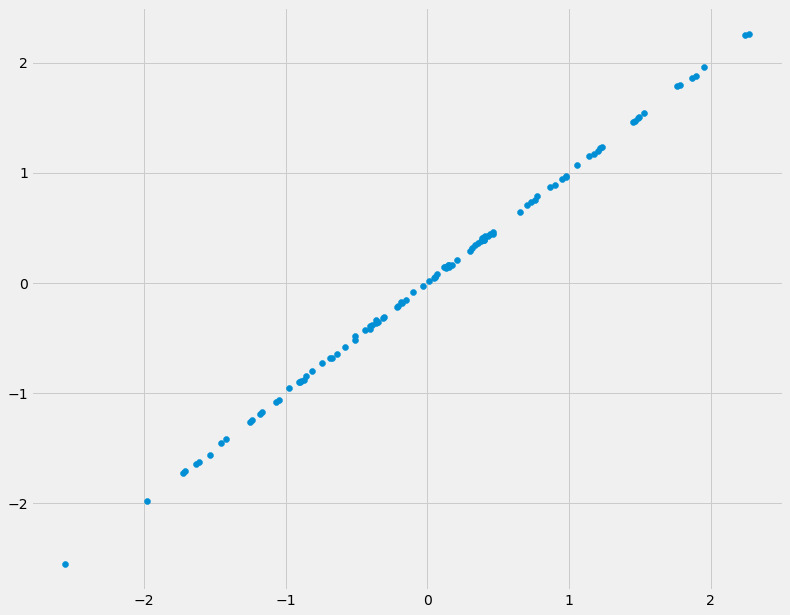

In [100]:
plt.scatter(x, y)

In [101]:
np.corrcoef(x, y)

array([[1.        , 0.99994809],
       [0.99994809, 1.        ]])

In [102]:
results = sm.OLS(y, x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          9.518e+05
Date:                Sat, 04 Jun 2022   Prob (F-statistic):                   5.57e-199
Time:                        18:37:08   Log-Likelihood:                          315.58
No. Observations:                 100   AIC:                                     -629.2
Df Residuals:                      99   BIC:                                     -626.6
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.0012      0.001    975.623      0.000       0.999       1.003
==============================================================================
Omnibus:                        5.116   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.077   Jarque-Bera (JB):                2.979
Skew:                           0.209   Prob(JB):                        0.226
Kurtosis:                       2.265   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [103]:
results = sm.OLS(x, y).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          9.518e+05
Date:                Sat, 04 Jun 2022   Prob (F-statistic):                   5.57e-199
Time:                        18:37:11   Log-Likelihood:                          315.70
No. Observations:                 100   AIC:                                     -629.4
Df Residuals:                      99   BIC:                                     -626.8
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.9987      0.001    975.623      0.000       0.997       1.001
==============================================================================
Omnibus:                        4.957   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.084   Jarque-Bera (JB):                2.927
Skew:                          -0.208   Prob(JB):                        0.231
Kurtosis:                       2.273   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

les coefficients sont presque identiques

**(c) Générez un exemple dans R avec n = 100 observations dans lesquelles l'estimation du coefficient pour la régression de X sur Y est la même que l'estimation du coefficient pour la régression de Y sur X.**

In [113]:
x = np.random.randn(100) * 5
y = x.copy()
np.random.shuffle(y)
x.mean(), y.mean()

(1.0738055309012318, 1.0738055309012318)

In [114]:
np.corrcoef(x, y)

array([[1.        , 0.03852452],
       [0.03852452, 1.        ]])

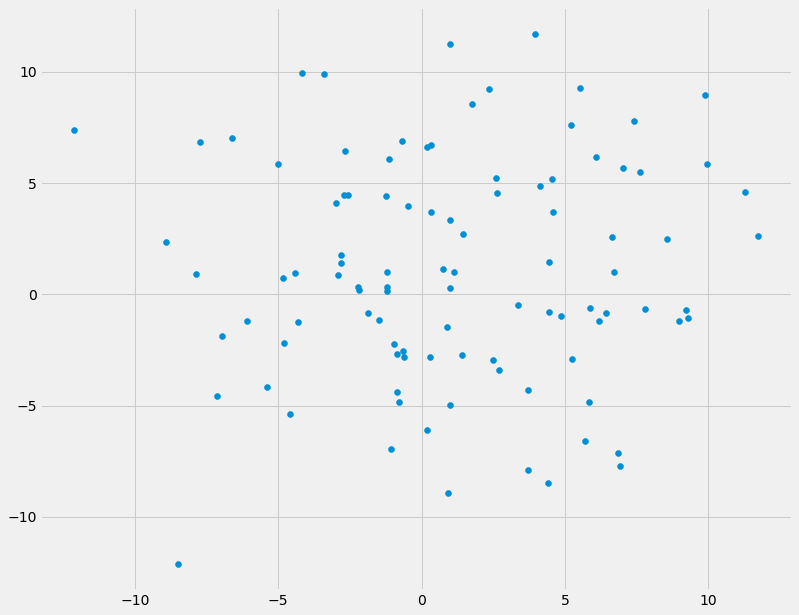

In [115]:
plt.scatter(x, y)

In [116]:
results = sm.OLS(x, y).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.007
Model:                            OLS   Adj. R-squared (uncentered):             -0.003
Method:                 Least Squares   F-statistic:                             0.6539
Date:                Sat, 04 Jun 2022   Prob (F-statistic):                       0.421
Time:                        18:40:41   Log-Likelihood:                         -304.66
No. Observations:                 100   AIC:                                      611.3
Df Residuals:                      99   BIC:                                      613.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0810      0.100      0.809      0.421      -0.118       0.280
==============================================================================
Omnibus:                        1.236   Durbin-Watson:                   1.872
Prob(Omnibus):                  0.539   Jarque-Bera (JB):                1.142
Skew:                          -0.102   Prob(JB):                        0.565
Kurtosis:                       2.518   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [117]:
results = sm.OLS(y, x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.007
Model:                            OLS   Adj. R-squared (uncentered):             -0.003
Method:                 Least Squares   F-statistic:                             0.6539
Date:                Sat, 04 Jun 2022   Prob (F-statistic):                       0.421
Time:                        18:40:51   Log-Likelihood:                         -304.66
No. Observations:                 100   AIC:                                      611.3
Df Residuals:                      99   BIC:                                      613.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0810      0.100      0.809      0.421      -0.118       0.280
==============================================================================
Omnibus:                        1.491   Durbin-Watson:                   1.824
Prob(Omnibus):                  0.475   Jarque-Bera (JB):                1.232
Skew:                          -0.064   Prob(JB):                        0.540
Kurtosis:                       2.471   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Exercice 13

**Dans cet exercice, vous allez créer des données simulées et y ajuster des modèles de régression linéaire simples. Assurez-vous d'utiliser set.seed(1) avant de commencer la partie (a) pour garantir des résultats cohérents.**

**(a) À l'aide de la fonction** `np.random.randn(100)`**, créez un vecteur `x` contenant 100 observations tirées d'une distribution** $N(0, 1)$**. Cela représente une feature, X.**

In [21]:
plt.style.use('seaborn')

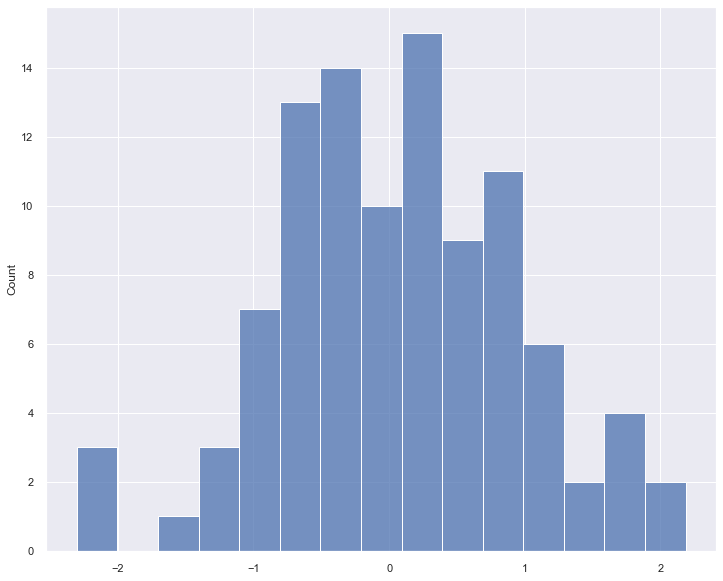

In [83]:
np.random.seed(1)
X = np.random.randn(100)
sns.histplot(X,bins = 15);

**(b) À l'aide de la fonction** `np.random.randn(100)`**, créez un vecteur `eps` contenant 100 observations tirées d'une distribution** $N(0, 0,25)$ **(une distribution normale avec une moyenne de zéro et une variance de 0,25.**

-0.025601229614439603 0.22811624348737097


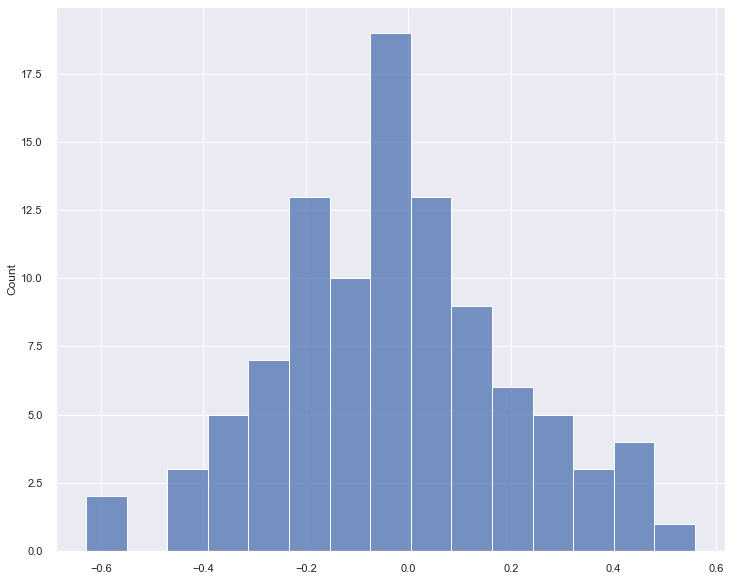

In [82]:
# eps = np.random.normal(0, 0.25, 100) : 100 variables aléatoires suivant une distribution Normale (moyenne = 0, std = 0.25)
eps = np.random.randn(100) * 0.25
print(eps.mean(), eps.std())
sns.histplot(eps,bins = 15);

**(c) En utilisant `x` et `eps`, générez un vecteur `y` selon le modèle**:

$$Y = −1 + 0.5X + ϵ \space\space\space\space\space\space(3.39)$$ 

**Quelle est la longueur du vecteur `y` ? Quelles sont les valeurs de** $\beta_0$ **et $\beta_1$ dans ce modèle linéaire ?**

In [84]:
y = -1 +0.5*X + eps
len(y)

100

$\beta_0 = -1$ et $\beta_1 = 0.5$

**(d) Créez un nuage de points affichant la relation entre `x` et `y`. Commentez ce que vous observez.**

<AxesSubplot:>

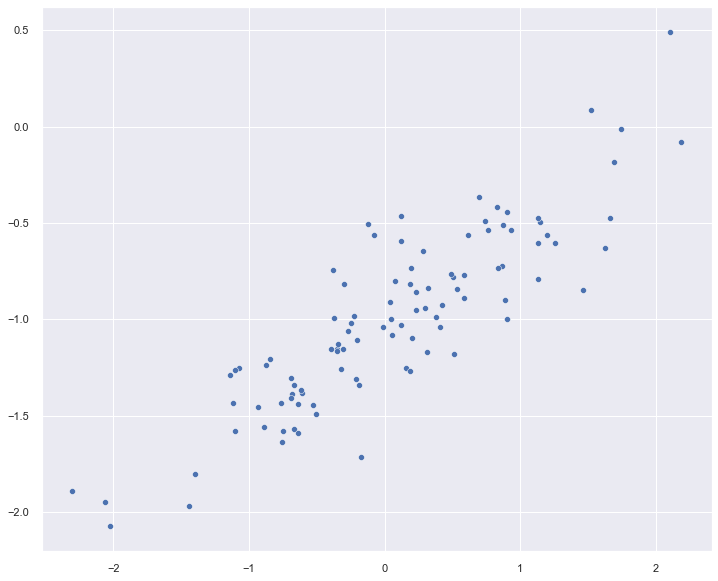

In [85]:
sns.scatterplot(x= X, y=y)

On observe une relation linéaire entre X et y centrée en 0 pour x-axis et -1 pour y-axis, avec une variance supplémentaire introduite par les termes d'erreur.

la slope est bien de 0.5 cad que pour une unité de X qui augmente, y augmente de 0.5 unité

**(e) Ajustez un modèle linéaire des moindres carrés pour prédire `y` en utilisant `x`. Commentez le modèle obtenu. Comment** $\hat \beta_0$ **et** $\hat \beta_1$ **se comparent-ils à** $\beta_0$ **et** $\beta_1$ ?

In [86]:
res = sm.OLS(y, sm.add_constant(X)).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     314.1
Date:                Sun, 05 Jun 2022   Prob (F-statistic):           2.51e-32
Time:                        13:31:12   Log-Likelihood:                 7.5211
No. Observations:                 100   AIC:                            -11.04
Df Residuals:                      98   BIC:                            -5.832
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.0228      0.023    -45.008      0.000      -1.068      -0.978
x1             0.4539      0.026     17.722      0.000       0.403       0.505
==============================================================================
Omnibus:                        1.671   Durbin-Watson:                   2.257
Prob(Omnibus):                  0.434   Jarque-Bera (JB):                1.162
Skew:                           0.234   Prob(JB):                        0.559
Kurtosis:                       3.243   Cond. No.                         1.15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

on voit que les coefficients estimés $\hat \beta_0$ et $\hat \beta_1$ sont très proche des coefficients réels

$\beta_0 = -1$</br>
$\hat \beta_0 = -1.0228$</br>



$\beta_1 = 0.5$</br> 
$\hat \beta_1 = 0.4539$

**(f) Affichez la ligne des moindres carrés sur le nuage de points obtenu en (d). Tracez la ligne de régression de la population sur le graphique, dans une couleur différente. Utilisez la commande `legend()` pour créer une extrémité de jambe appropriée**

<AxesSubplot:>

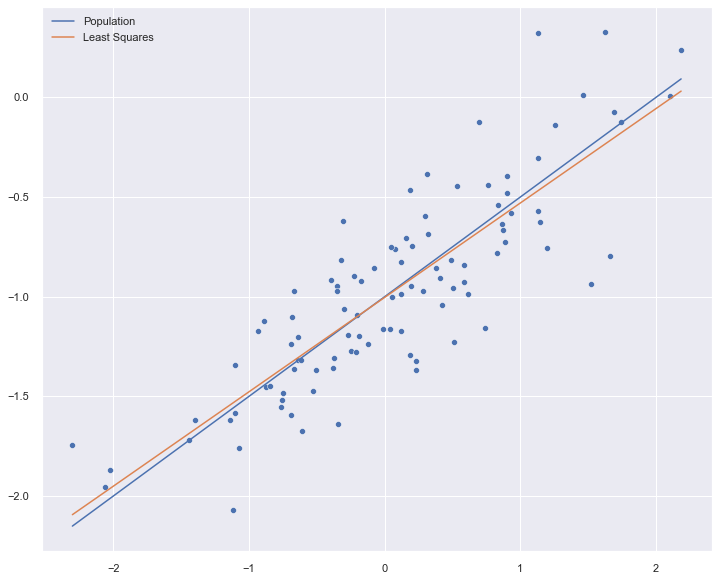

In [43]:
sns.scatterplot(x= X, y = y)
sns.lineplot(x=X, y= -1 + 0.5*X, label='Population')
sns.lineplot(x=X, y= res.params[0] + res.params[1]*X, label='Least Squares')

les droites de régression et de population sont très proches l'une de l'autre. Les **p-values** sont proches de zéro et la **F-stat** est grande, de sorte que l'hypothèse nulle peut être rejetée

**(g) Ajustez maintenant un modèle de régression polynomial qui prédit `y` en utilisant `x` et `x2`. Existe-t-il des preuves que le terme quadratique améliore l'ajustement du modèle ? Expliquez votre réponse**

In [90]:
X2 = np.column_stack((np.ones(100), X, X ** 2))
res_02 = sm.OLS(y, X2).fit()
res_02.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     155.6
Date:                Sun, 05 Jun 2022   Prob (F-statistic):           5.34e-31
Time:                        13:33:52   Log-Likelihood:                 7.5710
No. Observations:                 100   AIC:                            -9.142
Df Residuals:                      97   BIC:                            -1.326
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.0278      0.028    -36.837      0.000      -1.083      -0.972
x1             0.4532      0.026     17.534      0.000       0.402       0.504
x2             0.0064      0.021      0.311      0.756      -0.034       0.047
==============================================================================
Omnibus:                        1.568   Durbin-Watson:                   2.245
Prob(Omnibus):                  0.457   Jarque-Bera (JB):                1.080
Skew:                           0.228   Prob(JB):                        0.583
Kurtosis:                       3.226   Cond. No.                         2.10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Le terme quadratique n'améliore pas l'ajustement du modèle

**F-stat** est réduite et **p-value** du coefficient de  $X^2 > 0.05$ donc n'est pas statistiquement significatif.

**(h) Répétez (a)–(f) après avoir modifié le processus de génération de données de manière à ce qu'il y ait moins de bruit dans les données. Le modèle (3.39) devrait rester le même. Vous pouvez le faire en diminuant la variance de la distribution normale utilisée pour générer le terme d'erreur ϵ dans (b). Décrivez vos résultats.**

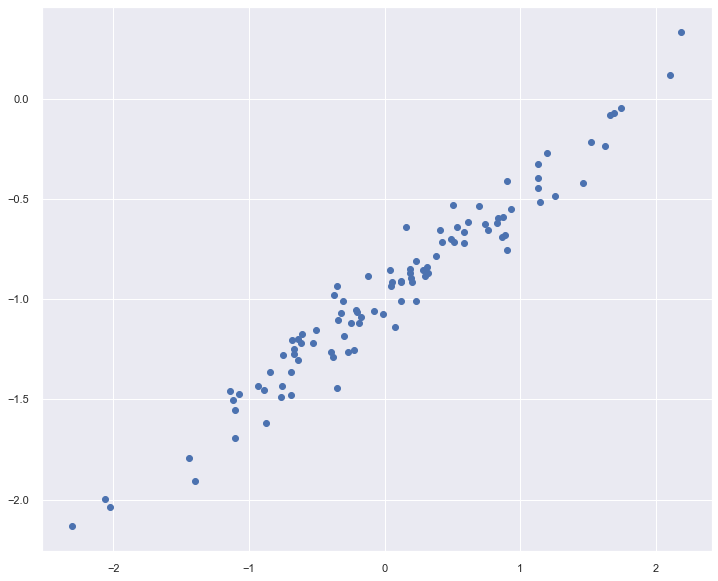

In [92]:
eps = np.random.normal(0, 0.11, 100)
y = -1 +0.5*X + eps
plt.scatter(X, y)

In [93]:
res1 = sm.OLS(y, sm.add_constant(X)).fit()
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     1920.
Date:                Sun, 05 Jun 2022   Prob (F-statistic):           3.54e-66
Time:                        13:34:29   Log-Likelihood:                 86.289
No. Observations:                 100   AIC:                            -168.6
Df Residuals:                      98   BIC:                            -163.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9838      0.010    -95.171      0.000      -1.004      -0.963
x1             0.5105      0.012     43.814      0.000       0.487       0.534
==============================================================================
Omnibus:                        0.898   Durbin-Watson:                   2.157
Prob(Omnibus):                  0.638   Jarque-Bera (JB):                0.561
Skew:                          -0.172   Prob(JB):                        0.755
Kurtosis:                       3.127   Cond. No.                         1.15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [94]:
X2 = np.column_stack((np.ones(100), X, X**2))
res_2_1 = sm.OLS(y, X2).fit()
res_2_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     950.4
Date:                Sun, 05 Jun 2022   Prob (F-statistic):           1.92e-64
Time:                        13:34:53   Log-Likelihood:                 86.306
No. Observations:                 100   AIC:                            -166.6
Df Residuals:                      97   BIC:                            -158.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9852      0.013    -77.592      0.000      -1.010      -0.960
x1             0.5103      0.012     43.390      0.000       0.487       0.534
x2             0.0017      0.009      0.181      0.856      -0.017       0.020
==============================================================================
Omnibus:                        0.893   Durbin-Watson:                   2.152
Prob(Omnibus):                  0.640   Jarque-Bera (JB):                0.552
Skew:                          -0.170   Prob(JB):                        0.759
Kurtosis:                       3.132   Cond. No.                         2.10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:>

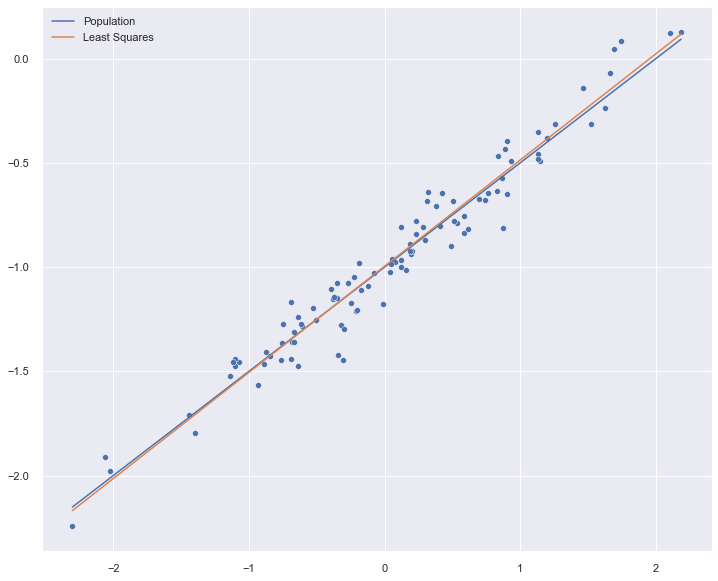

In [66]:
sns.scatterplot(x= X, y = y)
sns.lineplot(x=X, y= -1 + 0.5*X, label='Population')
sns.lineplot(x=X, y= res1.params[0] + res1.params[1]*X, label='Least Squares')

Lorsqu'on réduit le bruit, cad lorsqu'on diminue la variance des estimations par rapport aux valeurs réels des coefficients, on observe une amélioration du modèle par rapport à celui avec plus de bruit.

La relation est de plus en plus linéaire à fur et à mesure qu'on diminue la variance des estimations

Il y a une amélioration de $R^2$, de **F-stat**

<AxesSubplot:>

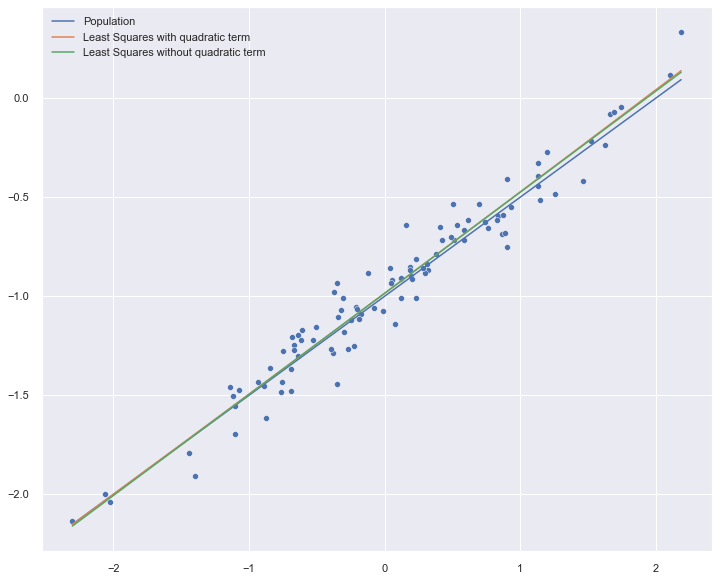

In [95]:
sns.scatterplot(x= X, y = y)
sns.lineplot(x=X, y= -1 + 0.5*X, label='Population')
sns.lineplot(x=X, y= res_2_1.params[0] + res_2_1.params[1]*X + res_2_1.params[2]*X**2, label='Least Squares with quadratic term')
sns.lineplot(x=X, y= res_2_1.params[0] + res_2_1.params[1]*X , label='Least Squares without quadratic term')

En ajoutant le terme quadratique dans l'équation du calcul de la droite de regression, on voit bien qu'il y a plus de variance entre $\hat y$ et $y$

**(i) Répétez (a)–(f) après avoir modifié le processus de génération de données de manière à ce qu'il y ait plus de bruit dans les données. Le modèle (3.39) devrait rester le même. Vous pouvez le faire en augmentant la variance de la distribution normale utilisée pour générer le terme d'erreur ϵ dans (b). Décrivez vos résultats.**

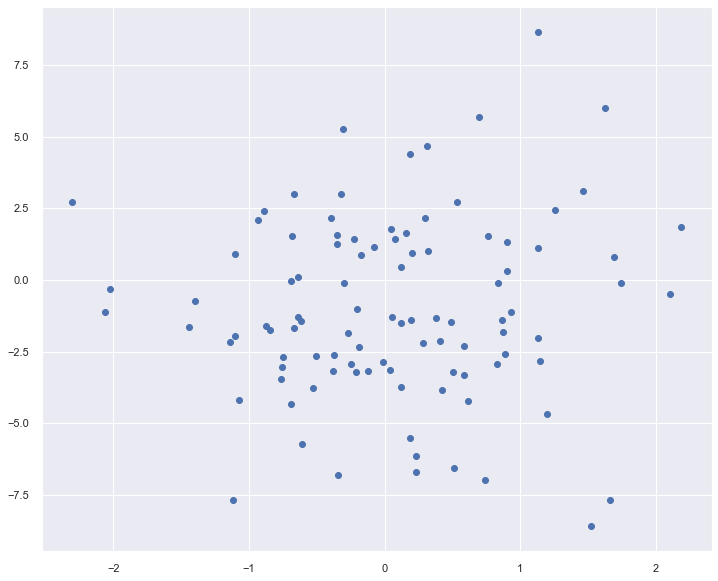

In [99]:
eps = np.random.normal(0, 3, 100)
y = -1 + 0.5*X + eps

plt.scatter(X, y)

In [100]:
res2 = sm.OLS(y, sm.add_constant(X)).fit()
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.008
Method:                 Least Squares   F-statistic:                    0.2543
Date:                Sun, 05 Jun 2022   Prob (F-statistic):              0.615
Time:                        13:36:43   Log-Likelihood:                -257.61
No. Observations:                 100   AIC:                             519.2
Df Residuals:                      98   BIC:                             524.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.0419      0.322     -3.235      0.002      -1.681      -0.403
x1             0.1830      0.363      0.504      0.615      -0.537       0.903
==============================================================================
Omnibus:                        0.673   Durbin-Watson:                   2.042
Prob(Omnibus):                  0.714   Jarque-Bera (JB):                0.286
Skew:                           0.080   Prob(JB):                        0.867
Kurtosis:                       3.207   Cond. No.                         1.15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Rajouter du bruit fait diminuer drastiquement la valeur de $R^2$ et **F-stat** : 

Il n'y a plus que 0.018% de la variation de $y$ qui est expliquée par la variation de $X$

De plus, la faible valeur de **F-stat** montre une forte baisse d'amélioration du modèle : une faible valeur de **F** correspond à ce que les predictions du modèle soient égales à la moyenne de y

In [101]:
X2 = np.column_stack((np.ones(100), X, X**2))
res_2_2 = sm.OLS(y, X2).fit()
res_2_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                 -0.008
Method:                 Least Squares   F-statistic:                    0.5933
Date:                Sun, 05 Jun 2022   Prob (F-statistic):              0.554
Time:                        13:36:59   Log-Likelihood:                -257.13
No. Observations:                 100   AIC:                             520.3
Df Residuals:                      97   BIC:                             528.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.2605      0.394     -3.201      0.002      -2.042      -0.479
x1             0.1502      0.365      0.412      0.681      -0.574       0.874
x2             0.2802      0.290      0.966      0.337      -0.296       0.856
==============================================================================
Omnibus:                        0.993   Durbin-Watson:                   2.062
Prob(Omnibus):                  0.609   Jarque-Bera (JB):                0.510
Skew:                           0.057   Prob(JB):                        0.775
Kurtosis:                       3.331   Cond. No.                         2.10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:>

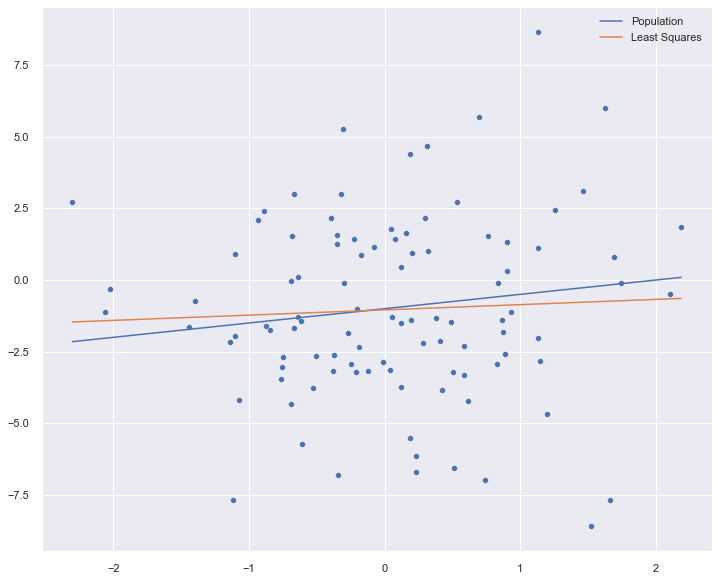

In [102]:
sns.scatterplot(x= X, y = y)
sns.lineplot(x=X, y= -1 + 0.5*X, label='Population')
sns.lineplot(x=X, y= res2.params[0] + res2.params[1]*X, label='Least Squares')

<AxesSubplot:>

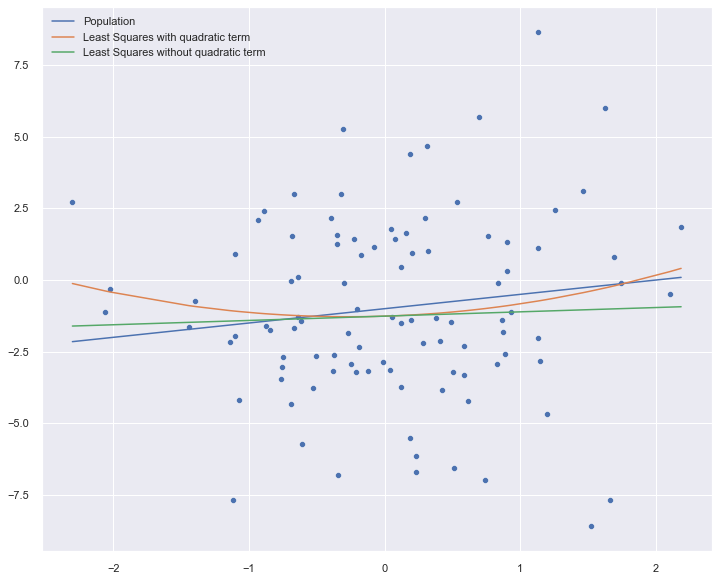

In [103]:
sns.scatterplot(x= X, y = y)
sns.lineplot(x=X, y= -1 + 0.5*X, label='Population')
sns.lineplot(x=X, y= res_2_2.params[0] + res_2_2.params[1]*X + res_2_2.params[2]*X**2, label='Least Squares with quadratic term')
sns.lineplot(x=X, y= res_2_2.params[0] + res_2_2.params[1]*X , label='Least Squares without quadratic term')

In [104]:
print(np.sum((y - (res_2_2.params[0] + res_2_2.params[1]*X + res_2_2.params[2]*X**2))**2))
print(np.sum((y - (res2.params[0] + res2.params[1]*X))**2))

1002.1685023469132
1011.8030477408928


Il y a une légère amélioration des residus dans le modèle quadratique mais ce n'est pas significatif car la valeur est trop faible

**(j) Quels sont les intervalles de confiance pour** $\beta_0$ **et** $\beta_1$ **basés sur l'ensemble de données d'origine, l'ensemble de données le plus bruyant et l'ensemble de données le moins bruyant ? Commentez vos résultats.**

In [91]:
# modele original
res_02.conf_int()

array([[-1.0831768 , -0.97242325],
       [ 0.40187138,  0.50446087],
       [-0.03441178,  0.04720728]])

In [98]:
# modele avec moins de bruit
res_2_1.conf_int()

array([[-1.01035109, -0.9599527 ],
       [ 0.48695649,  0.53363983],
       [-0.01687389,  0.02026686]])

In [105]:
# modele avec plus de bruit
res_2_2.conf_int()

array([[-2.0419431 , -0.47899182],
       [-0.5736688 ,  0.87407153],
       [-0.29569506,  0.85611109]])

pour $\hat \beta_0$ : on voit que plus il y a du bruit, et plus sa valeur s'éloigne de $\beta_0$
    
pareil pour $\hat \beta_1$ et $\hat \beta_2$

Pour les intervalles de confiance, on voit que plus il y a de bruit et plus les intervalles sont grands donc moins ils sont précis

**Conclusion** : Les valeurs d'intervalle de confiance sont les plus étroites pour le modèle de variance la plus faible, les plus larges pour le modèle de variance la plus élevée et entre les deux pour le modèle d'origine.

### Exercice 14

**Ce problème se concentre sur le problème de colinéarité.**

**(a) Exécutez les commandes suivantes dans R :**

- set.seed (1)
- x1 <- runif (100)
- x2 <- 0.5 * x1 + rnorm (100) / 10
- y <- 2 + 2 * x1 + 0.3 * x2 + rnorm (100)

**La dernière ligne correspond à la création d'un modèle linéaire dans lequel y est une fonction de** $x_1$ **et** $x_2$. **Écrivez la forme du modèle linéaire. Quels sont les coefficients de régression ?**

`np.random.rand(100)` <=> `np.rand.uniform(0, 1, 100)`

0.538208785219488 0.298947600425604
0.4794905649064897 0.3083106270683212


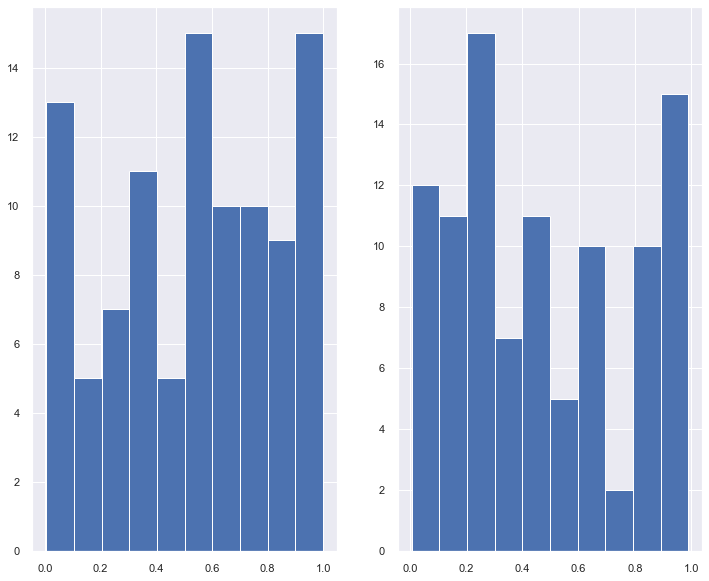

In [110]:
x1, x2 = np.random.rand(100), np.random.uniform(0, 1, 100)

print(x1.mean(), x1.std())
print(x2.mean(), x2.std())

fig, ax = plt.subplots(1, 2)
ax[0].hist(x1)
ax[1].hist(x2);

In [118]:
np.random.seed(1)
X1 = np.random.rand(100)
X2 = 0.5*X1 + np.random.rand(100) / 10
y = 2 + 2*X1 + 0.3*X2 + np.random.rand(100)

$y = \beta_0 + \beta_1 X1 + \beta_2 X2 + \epsilon$ avec $\epsilon$ : variable qui suit $N(0,1)$

$\beta_0 = 2$</br>
$\beta_1 = 2$</br>
$\beta_2 = 0.3$

**(b) Quelle est la corrélation entre** $x_1$ **et** $x_2$ **? Créez un nuage de points affichant la relation entre les variables.**


In [119]:
np.corrcoef(X1, X2)

array([[1.        , 0.97747398],
       [0.97747398, 1.        ]])

il y a une très forte corrélation positive entre $X_1$ et $X_2$ : quand $X_1$ croit, $X_2$ croit aussi

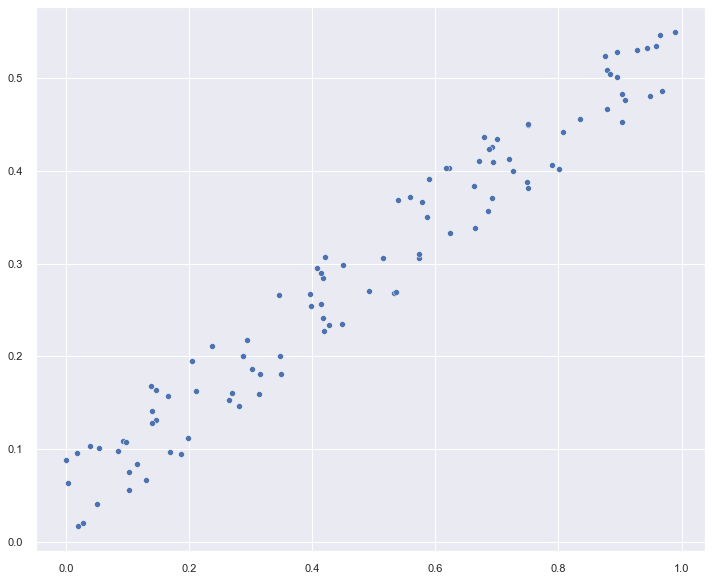

In [120]:
sns.scatterplot(x=X1, y=X2);

**(c) À l'aide de ces données, ajustez une régression des moindres carrés pour prédire y en utilisant** $x_1$ **et** $x_2$. **Décrivez les résultats obtenus. Que sont** $\hat \beta_0$, $\hat \beta_1$ **et** $\hat \beta_2$ **? Comment sont-ils liés aux véritables** $\beta_0$, $\beta_1$ **et** $\beta_2$ **? Pouvez-vous rejeter l'hypothèse nulle** $H_0 : \beta_1 = 0$ **? Qu'en est-il de l'hypothèse nulle** $H_0 : \beta_2 = 0$ **?**

In [121]:
X = np.column_stack((np.ones(100), X1, X2))
res = sm.OLS(y, X).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     246.2
Date:                Sun, 05 Jun 2022   Prob (F-statistic):           9.92e-39
Time:                        15:43:04   Log-Likelihood:                -13.113
No. Observations:                 100   AIC:                             32.23
Df Residuals:                      97   BIC:                             40.04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.5435      0.070     36.457      0.000       2.405       2.682
x1             1.6509      0.451      3.662      0.000       0.756       2.546
x2             0.9206      0.886      1.039      0.301      -0.838       2.679
==============================================================================
Omnibus:                       12.226   Durbin-Watson:                   2.056
Prob(Omnibus):                  0.002   Jarque-Bera (JB):                4.547
Skew:                          -0.215   Prob(JB):                        0.103
Kurtosis:                       2.048   Cond. No.                         41.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

$\hat \beta_0 = 2.5435$   $\space\space\space\space\beta_0 = 2$</br>
$\hat \beta_1 = 1.6509$   $\space\space\space\space\beta_1 = 2$</br> 
$\hat \beta_2 = 0.9206$   $\space\space\space\space\beta_2 = 0.3$

**standard error** est élevée et augmente de $X_1$ à $X_2$, et leurs coefficients de régression respectifs $\hat \beta_1$ et $\hat \beta_2$ sont inexacts par rapport à $\beta_0 = 2$ et $\beta_1 = 2$.</br>
**p-vaue** pour $\hat \beta_1 < 0,05$, on peut donc rejeter $𝐻_0 ∶ \beta_1 = 0$.</br>
**p-vaue** pour $\hat \beta_2 > 0,05$ et nous ne pouvons donc pas rejeter  $𝐻_0 ∶ \beta_2 = 0$.

**(d) Ajustez maintenant une régression des moindres carrés pour prédire y en utilisant uniquement x1. Commentez vos résultats. Pouvez-vous rejeter l'hypothèse nulle** $H_0 : \beta_1 = 0$ **?** 

In [127]:
res = sm.OLS(y, sm.add_constant(X1)).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     490.8
Date:                Sun, 05 Jun 2022   Prob (F-statistic):           6.09e-40
Time:                        17:53:43   Log-Likelihood:                -13.667
No. Observations:                 100   AIC:                             31.33
Df Residuals:                      98   BIC:                             36.54
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.5893      0.054     47.883      0.000       2.482       2.697
x1             2.1088      0.095     22.155      0.000       1.920       2.298
==============================================================================
Omnibus:                       11.499   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.003   Jarque-Bera (JB):                4.481
Skew:                          -0.224   Prob(JB):                        0.106
Kurtosis:                       2.065   Cond. No.                         4.26
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [128]:
np.sqrt(res.scale)

0.2802230033780568

Si on l'on prédit y uniquement par $X_1$, $R^2$ varie très peu, **F-stat** augmente, cad que la capacité prédictive du modèle s'améliore.

la valeur de $\hat \beta_1$ est très proche de celle de $\beta_1$

**p-vaue** pour $\hat \beta_1 < 0,05$, on peut donc rejeter $𝐻_0 ∶ \beta_1 = 0$.</br> 

**(e) Ajustez maintenant une régression des moindres carrés pour prédire y en utilisant uniquement x2. Commentez vos résultats. Pouvez-vous rejeter l'hypothèse nulle** $H_0 : \beta_1 = 0$ **?**

In [123]:
res = sm.OLS(y, sm.add_constant(X2)).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     425.1
Date:                Sun, 05 Jun 2022   Prob (F-statistic):           2.04e-37
Time:                        17:47:33   Log-Likelihood:                -19.588
No. Observations:                 100   AIC:                             43.18
Df Residuals:                      98   BIC:                             48.39
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4213      0.065     37.229      0.000       2.292       2.550
x1             4.0923      0.198     20.617      0.000       3.698       4.486
==============================================================================
Omnibus:                        3.339   Durbin-Watson:                   2.066
Prob(Omnibus):                  0.188   Jarque-Bera (JB):                2.402
Skew:                          -0.215   Prob(JB):                        0.301
Kurtosis:                       2.374   Cond. No.                         7.26
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [126]:
# Residual Standard Error (RSE)
np.sqrt(res.scale)

0.29731791604435676

**(f) Les résultats obtenus en (c) – (e) se contredisent-ils ? Expliquez votre réponse.**

$X_1$ et $X_2$ sont très fortement corrélés l'un à l'autre, ils peuvent donc se substituer : leur $R^2$ est similaire lorsqu'ils appartiennent à des modèles différents et ils ont une relation positive avec $y$   
    
En revanche, dans le modèle avec $X_1$ et $X_2$, il y a une multicolinéarité de par leur ressemblance, et si $X_1$ est positif, alors $X_2$ est négatif..

**Standard errors** pour $X_1$ et $X_2$ augmentent à cause de leur colinéarité, elles sont donc non significatives

**(g) Supposons maintenant que nous obtenions une observation supplémentaire, qui a malheureusement été mal mesurée.** 

- x1 <- c(x1 , 0.1)
- x2 <- c(x2 , 0.8)
- y <- c(y, 6)

**Réajuster les modèles linéaires de (c) à (e) en utilisant ces nouvelles données . Quel effet ce nouveau constat a-t-il sur chacun des modèles ? Dans chaque modèle, cette observation est-elle une valeur aberrante ? Un point à fort effet de levier ? Tous les deux? Expliquez vos réponses**

In [133]:
new_X1 = np.append(X1, 0.1)
new_X2 = np.append(X2, 0.8)
new_y = np.append(y, 6)

In [134]:
X = np.column_stack((new_y, new_X1, new_X2))
df_new = pd.DataFrame(X, columns=['y', 'X1', 'X2'])
results = smf.ols('y ~ X2', data=df_new).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     488.2
Date:                Sun, 05 Jun 2022   Prob (F-statistic):           4.68e-40
Time:                        18:09:44   Log-Likelihood:                -19.761
No. Observations:                 101   AIC:                             43.52
Df Residuals:                      99   BIC:                             48.75
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.4061      0.063     38.137      0.000       2.281       2.531
X2             4.1537      0.188     22.096      0.000       3.781       4.527
==============================================================================
Omnibus:                        3.524   Durbin-Watson:                   2.114
Prob(Omnibus):                  0.172   Jarque-Bera (JB):                2.552
Skew:                          -0.231   Prob(JB):                        0.279
Kurtosis:                       2.374   Cond. No.                         6.93
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [135]:
np.corrcoef(new_X1, new_X2)

array([[1.        , 0.87688161],
       [0.87688161, 1.        ]])

les correlations baissent en rajoutant un point

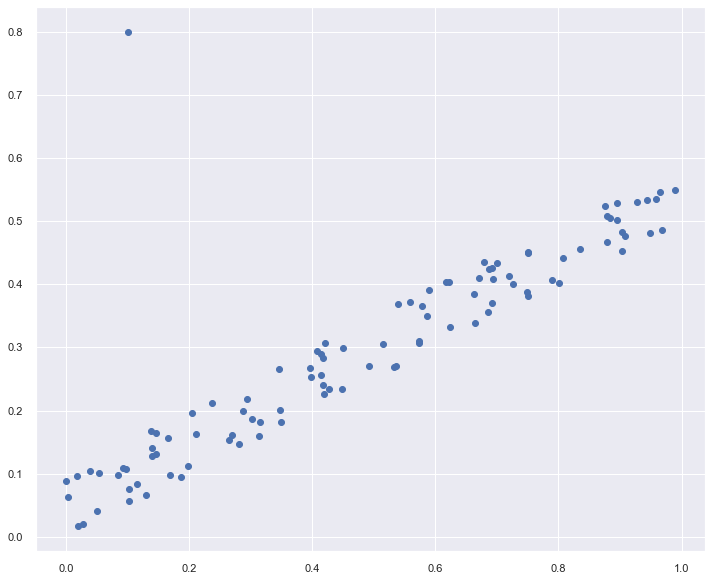

In [136]:
plt.scatter(new_X1, new_X2)

On voit la presence d'un outlier

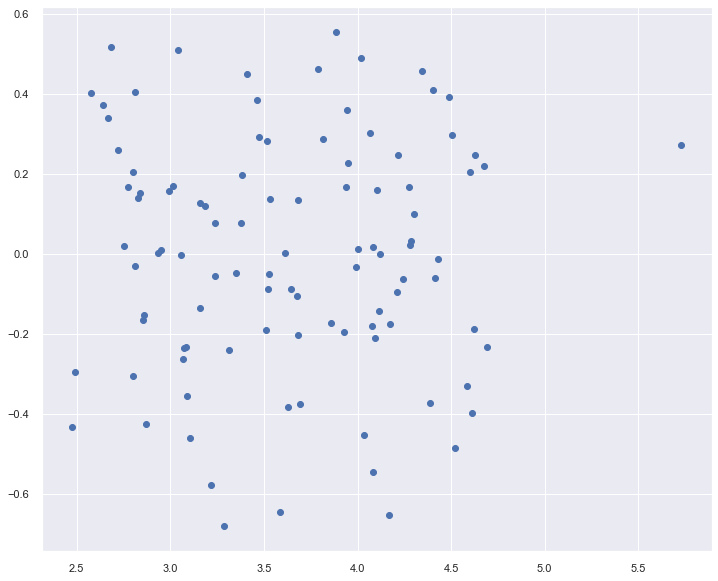

In [138]:
plt.scatter(results.fittedvalues, results.resid);

Ce n'est pas un outlier mais un point influent d'un **leverage effect**

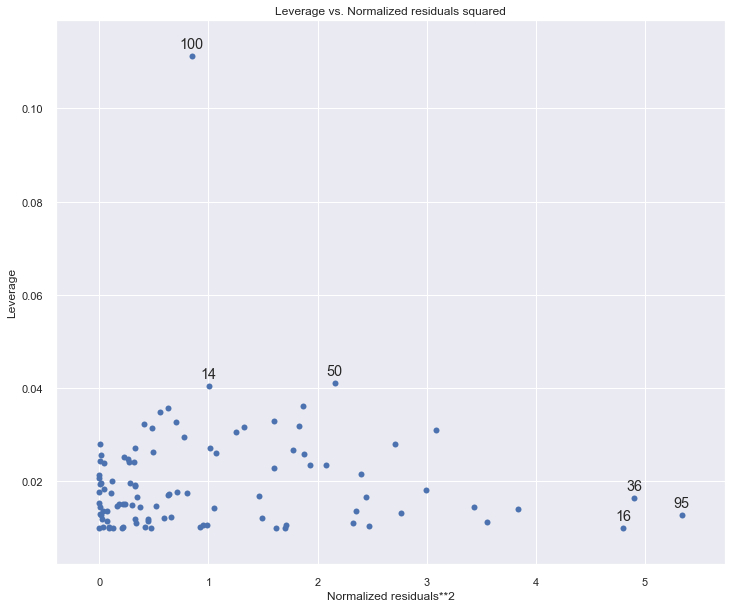

In [140]:
fig, ax = plt.subplots(figsize=(12,10))
fig = plot_leverage_resid2(results, ax = ax)

### Exercice 15

**Nous allons maintenant essayer de prédire le taux de criminalité par habitant en utilisant les autres variables de cet ensemble de données. En d'autres termes, le taux de criminalité par habitant est la réponse, et les autres variables sont les prédicteurs.**

**(a) Pour chaque prédicteur, ajustez un modèle de régression linéaire simple pour prédire la réponse. Décrivez vos résultats. Dans lequel des modèles existe-t-il une association statistiquement significative entre le prédicteur et la réponse ? Créez des graphiques pour étayer vos affirmations.**

In [142]:
boston = pd.read_csv('boston.csv')
boston.head()

crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

    black  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2

Intervalle de confiance pour chaque prédicteur dans une régression linéaire simple

In [160]:
for el in boston.columns[1:]:
    print(smf.ols(f"crim ~ {el}", data=boston).fit().conf_int())

                  0         1
Intercept  3.633993  5.273394
zn        -0.105556 -0.042314
                  0         1
Intercept -3.374634 -0.752851
indus      0.409530  0.610023
                  0         1
Intercept  2.966214  4.522679
chas      -4.851815  1.066261
                   0          1
Intercept -17.058819 -10.380946
nox        25.356076  37.140987
                   0          1
Intercept  13.871682  27.091926
rm         -3.729343  -1.638760
                  0         1
Intercept -5.632536 -1.923277
age        0.082763  0.132809
                  0          1
Intercept  8.064263  10.934260
dis       -1.881617  -1.220187
                  0         1
Intercept -3.158448 -1.415870
rad        0.550460  0.685362
                   0         1
Intercept -10.131175 -6.925563
tax         0.026113  0.033372
                   0          1
Intercept -23.830322 -11.463545
ptratio     0.819218   1.484748
                   0          1
Intercept  13.752084  19.354975
black      -

Comme la plupart des prédicteurs ont des intervalles de confiance à 95 % n'incluant pas 0, ce qui signifie qu'ils rejettent $H_0$

**(b) Ajuster un modèle de régression multiple pour prédire la réponse en utilisant tous les prédicteurs. Décrivez vos résultats. Pour quels prédicteurs peut-on rejeter l'hypothèse nulle** $H_0 : \beta_j = 0$ **?**

In [149]:
res = smf.ols(f"crim ~ {(' + ').join(boston.columns[1:])}", data = boston).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   crim   R-squared:                       0.454
Model:                            OLS   Adj. R-squared:                  0.440
Method:                 Least Squares   F-statistic:                     31.47
Date:                Sun, 05 Jun 2022   Prob (F-statistic):           1.57e-56
Time:                        18:37:31   Log-Likelihood:                -1653.3
No. Observations:                 506   AIC:                             3335.
Df Residuals:                     492   BIC:                             3394.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     17.0332      7.235      2.354      0.019       2.818      31.248
zn             0.0449      0.019      2.394      0.017       0.008       0.082
indus         -0.0639      0.083     -0.766      0.444      -0.228       0.100
chas          -0.7491      1.180     -0.635      0.526      -3.068       1.570
nox          -10.3135      5.276     -1.955      0.051     -20.679       0.052
rm             0.4301      0.613      0.702      0.483      -0.774       1.634
age            0.0015      0.018      0.081      0.935      -0.034       0.037
dis           -0.9872      0.282     -3.503      0.001      -1.541      -0.433
rad            0.5882      0.088      6.680      0.000       0.415       0.761
tax           -0.0038      0.005     -0.733      0.464      -0.014       0.006
ptratio       -0.2711      0.186     -1.454      0.147      -0.637       0.095
black         -0.0075      0.004     -2.052      0.041      -0.015      -0.000
lstat          0.1262      0.076      1.667      0.096      -0.023       0.275
medv          -0.1989      0.061     -3.287      0.001      -0.318      -0.080
==============================================================================
Omnibus:                      666.613   Durbin-Watson:                   1.519
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            84887.625
Skew:                           6.617   Prob(JB):                         0.00
Kurtosis:                      65.058   Cond. No.                     1.58e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.58e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Beaucoup de predicteurs ont des coefficients proche de 0 et ne sont pas significatifs (**p-value** > 0.05)

si votre niveau de signification est de 0,05, la valeur **t-stat** correspondante est de 1,96, donc lorsque le **t-stat rapporté** dans la sortie est supérieur à 1,96, on rejete $H_0$ et $\beta_j$ est significatif à un niveau de signification de 5 %.

Voici les coefficients significatifs, cad qui ont une **t-value** > 1.96

In [155]:
res.tvalues[abs(res.tvalues) > 1.96]

Intercept    2.354313
zn           2.394312
dis         -3.502893
rad          6.680448
black       -2.051959
medv        -3.286517
dtype: float64

**(c) Comment vos résultats de (a) se comparent-ils à vos résultats de (b) ? Créez un graphique affichant les coefficients de régression univariés de (a) sur l'axe des x et les coefficients de régression multiples de (b) sur l'axe des y. Autrement dit, chaque prédicteur est affiché sous la forme d'un point unique dans le tracé. Son coefficient dans un modèle de régression linéaire simple est indiqué sur l'axe des x, et son estimation de coefficient dans le modèle de régression linéaire multiple est indiquée sur l'axe des y**

In [159]:
# tous les parametres des coefficients sauf l'intercept
all_params = res.params[1:]
all_params

zn          0.044855
indus      -0.063855
chas       -0.749134
nox       -10.313535
rm          0.430131
age         0.001452
dis        -0.987176
rad         0.588209
tax        -0.003780
ptratio    -0.271081
black      -0.007538
lstat       0.126211
medv       -0.198887
dtype: float64

In [171]:
s = []
for el in boston.columns[1:]:
    s.append(smf.ols(f"crim ~ {el}", data=boston).fit().params.loc[[el]][0])
    
models = pd.DataFrame({'simple': s, 'multiple':all_params})
models

simple   multiple
zn       -0.073935   0.044855
indus     0.509776  -0.063855
chas     -1.892777  -0.749134
nox      31.248531 -10.313535
rm       -2.684051   0.430131
age       0.107786   0.001452
dis      -1.550902  -0.987176
rad       0.617911   0.588209
tax       0.029742  -0.003780
ptratio   1.151983  -0.271081
black    -0.036280  -0.007538
lstat     0.548805   0.126211
medv     -0.363160  -0.198887

Text(0, 0.5, 'multiple')

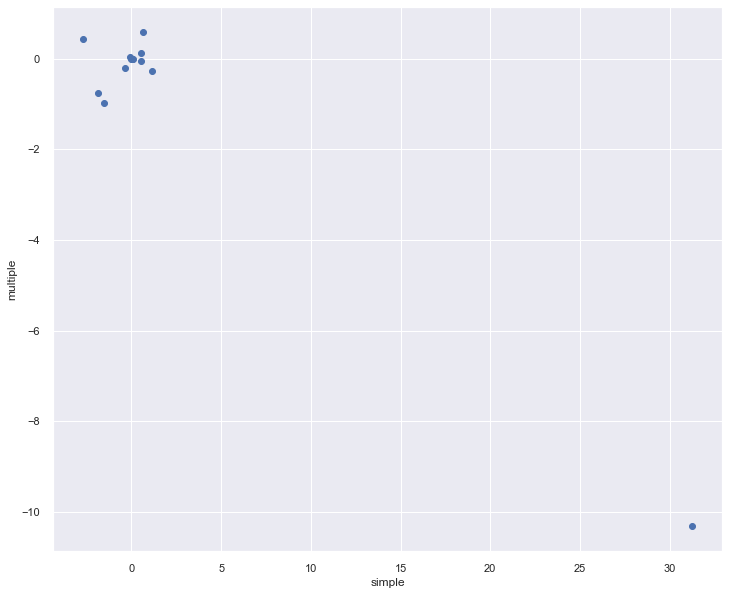

In [173]:
plt.scatter(models.simple, models.multiple)
plt.xlabel('simple')
plt.ylabel('multiple')

le point en bas a droite du graph correspond au predictor `nox`, qui correspond à la concentration en oxyde de nitrate

**(d) Existe-t-il des preuves d'une association non linéaire entre l'un des prédicteurs et la réponse ? Pour répondre à cette question, pour chaque prédicteur X, ajustez un modèle de la forme** $Y = \beta_0 + \beta_1X + \beta_2X_2 + \beta_3X_3 + ϵ$

il y a plusieurs variables élevées à la puissance 2 ou 3 qui montrent une signification mais celles-ci doivent être combinées avec d'autres variables pour évaluer leur importance réelle

In [174]:
for col in boston.columns[1:]:
    results = smf.ols('crim ~ {} + np.power({}, 2) + np.power({}, 3)'.format(col, col, col), data=boston).fit()
    print(results.conf_int())

                        0         1
Intercept        3.995365  5.696735
zn              -0.547929 -0.116448
np.power(zn, 2) -0.001103  0.014068
np.power(zn, 3) -0.000099  0.000024
                           0         1
Intercept           0.570162  6.754975
indus              -2.912179 -1.018247
np.power(indus, 2)  0.174681  0.329194
np.power(indus, 3) -0.008856 -0.005096
                          0         1
Intercept          2.966214  4.522679
chas              -1.617272  0.355420
np.power(chas, 2) -1.617272  0.355420
np.power(chas, 3) -1.617272  0.355420
                            0            1
Intercept          166.987961   299.185220
nox              -1614.151311  -944.591192
np.power(nox, 2)  1698.625715  2798.462391
np.power(nox, 3) -1538.996638  -952.409110
                          0           1
Intercept        -14.132472  239.381664
rm              -100.667850   22.367577
np.power(rm, 2)   -5.291984   14.393775
np.power(rm, 3)   -0.692661    0.343707
                    